# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

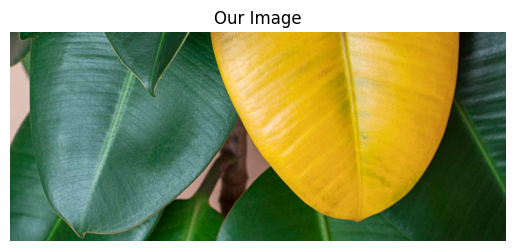

In [59]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [60]:
import base64
with open("pink_flower.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/4QGKRXhpZgAATU0AKgAAAAgABgEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAE7AAIAAABBAAAAZgITAAMAAAABAAEAAIdpAAQAAAABAAAAqAAAAAAAAABIAAAAAQAAAEgAAAABODhlOTUzNjYyYzE2MTIzNjNhOTIxOGY4YWZjYThlYzdlN2Q5ZmY3NDU1ZWYzNjA5MzYzMDc2Yjk0MTIxMmE0ZAAAAAWQAAAHAAAABDAyMzKRAQAHAAAABAECAwCShgAHAAAAlwAAAOqgAAAHAAAABDAxMDCgAQADAAAAAf//AAAAAAAAQVNDSUkAAAB7ImFpZ2NfaW5mbyI6eyJhaWdjX2xhYmVsX3R5cGUiOjAsInNvdXJjZV9pbmZvIjoiZHJlYW1pbmEifSwiZGF0YSI6eyJvcyI6IndlYiIsInByb2R1Y3QiOiJkcmVhbWluYSIsImV4cG9ydFR5cGUiOiJnZW5lcmF0aW9uIiwicGljdHVyZUlkIjoiMCJ9fQD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAQAAkADASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAABAABAgMFBgf/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAGKSSSdAk6BJOCScEkgSToSTgzpDTpAnSEknYnTgzp0M6VCdIaScGToGdIEnQJ0gSTgk6BJIEnYHScEkgTpAknEmdDZOgZ0gSSBJIEkgSSDJTpJSUgUbYhW6dCSQJJwSSG6SEknBJONJIHS

(np.float64(-0.5), np.float64(575.5), np.float64(1023.5), np.float64(-0.5))

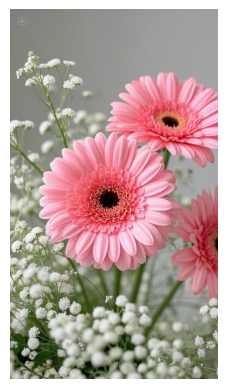

In [61]:
# @title
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np

base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/4QGKRXhpZgAATU0AKgAAAAgABgEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAE7AAIAAABBAAAAZgITAAMAAAABAAEAAIdpAAQAAAABAAAAqAAAAAAAAABIAAAAAQAAAEgAAAABODhlOTUzNjYyYzE2MTIzNjNhOTIxOGY4YWZjYThlYzdlN2Q5ZmY3NDU1ZWYzNjA5MzYzMDc2Yjk0MTIxMmE0ZAAAAAWQAAAHAAAABDAyMzKRAQAHAAAABAECAwCShgAHAAAAlwAAAOqgAAAHAAAABDAxMDCgAQADAAAAAf//AAAAAAAAQVNDSUkAAAB7ImFpZ2NfaW5mbyI6eyJhaWdjX2xhYmVsX3R5cGUiOjAsInNvdXJjZV9pbmZvIjoiZHJlYW1pbmEifSwiZGF0YSI6eyJvcyI6IndlYiIsInByb2R1Y3QiOiJkcmVhbWluYSIsImV4cG9ydFR5cGUiOiJnZW5lcmF0aW9uIiwicGljdHVyZUlkIjoiMCJ9fQD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAQAAkADASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAABAABAgMFBgf/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAGKSSSdAk6BJOCScEkgSToSTgzpDTpAnSEknYnTgzp0M6VCdIaScGToGdIEnQJ0gSTgk6BJIEnYHScEkgTpAknEmdDZOgZ0gSSBJIEkgSSDJTpJSUgUbYhW6dCSQJJwSSG6SEknBJONJIHScSdnB0kDpnpp2QOkkJJAkkxOnBJOCScEkgSTgk6BJODOnBnSBJIEkgTsgSTgydAzs4JnQMk4ZLs6UrKZouqZBF2cEkgTs407OJJIHSQOkhpJwTs4k7ODp0NnZ6E7OCSSEkgSTgnZ2J2cHTOCdnBOzgkkDsnBOzgkkCSQJJMSSQ6SBJIGdIEk4MnQZDpJJJITs4J2cEk4J2caSQkkgdJA6SGnTgknEnZwSTts6SSdk26SBJIE7Ox0kCdnBOzgnZwTs4JJAnTgkkCSQJJA6ZwSSBJIHZ2BJOCSQJJBkuylJJwSdgdJAnZwTpAkkCScEk4JJxs6cSdk27xkhJIHSQJJ2JJAkkDpOxJIE7OCdIE7SBJIHZOCScEkgSSBOyB0kCdIEzoEkgTOgZ0gSSDJSUpOkDpIEkhuk4JJAknBnTiSSBJOCdnBJJt3ZIdJMTpAnSBJOCSQOkgSTgnZ2JJA7s4J2cEk4JJwZJAknBnSBJOCSQJJAkkxJJCTsCSQZKSlOkgdJDSSB3ZwSSBOkDpIEkgTs4k6QJ0m07OCdJCScEkmJ0gTs4JJAknBOzgkkDukxOkDpIEkgSSB0yB0kCdMDpIEkgSSBJIHZ0CZOGQkpTpIHTOO+8+cGA8o0JJMdJAnZwSSB0kDpIE6Qk6cbOzsTpAkkCdIE7OCScEk4JJAnZ2OkgdM4OkgSSBJIEk4JJAk6BnSBJIEkgSTgkkCSQZCTykk40kg29HQxYEAGpVSZ9WnTgz7GwHHrrOaZSnuRSmcHTODuyB0nYkkCSQJ2cHSQJ2cE7OCSQOkgdJMTs4J0gSSBJIEk4JJCdJNpJISSBJIE6QJJAkkGSkpSdkN9nG7oEDbVCxw9nPRn3dTbo+T7CEA1BhucS6DBzpD2tfjShdRVgvLkBdTY6SYpMgdJMdJAkkh0kCdnBOkCSQO7JjpIHSQJJwSSBJ0CSQJJAnTA6SBJIEk4JJAkkCSQZDs8pa5ugPO2OY05CsAcrJCzAtsMQcUyhLqxTilZXbCaEzzpyhGcjpn0HdkCdIHSTHTOhOzgkkCdIHTOCSTE7ODpIE6QOkgSTgzyiNJTCCkwJJCSSBJIE7OCSQJJAkkGQ6eV2AscGWFclCuqYigfR1ApYQ+6QLnb+xbU4VdfzDdEXjClZXIZr3aAc83UiWYanAHSSHSTE7OCdnBJIHSQJ2cEkgTsgkn2HWPLUMNOeWgAQ2nm9EVVn6OfPY59BDkHP0shK1JVwpJMSvSqlOxKSQkkgSSHkpKVOCQ2KF6gCpFYcg9kBMy7Z5zWF0+cVj7O/Kuz5YKdUnuv6yVzvRwpYaNkjjPwNTNHWmek6SBJOCdnBJIE7OCdkDqy0qLnMuwLoMoxu24YpsfG1Q5sToee3HnWHfWtjYTpcUYmzjRqS9dtcNhU9B6VBmiGgNZVD4oJ2ISSEk6DHdKUknHHax0GtlxWSqvqnZfGmvE6UTN1bEGeHpQsZ0pdHu8XYHUV4sG6QC6pE7PaZ0mJ0wO7IHdnBJIE7OCupkPq1XJ9QdBwE9NdlVU7laOVe8pNYKzO0xB5vRmLcw8e4d5U5elmxsxA2g1sSaWnMKwZ86ZzZWkqKDJDeEkfGuQJ0zjJTPCTsgdJAkkFdjQgmkmUn1xwTvRbs0o2Cebxbi8a0TsZ7HMD2wgPqZaBaraAd63Za7OxJIHTFgMunrN8PoQZGpA5FC3AgQJOzvWy02AY2vNsnQCVXk55g9Kh43lVnH50at0GLvOLqb8u8UxfPzpDaC3ShDbqL50DKtXQ0dAy5VOlwJJ2JJJJJAmdBXNmlzCNEhFpJkrKrLDQ7hkNSTBFjstG1lbpRovWZGxToi8lTUmdiSQK+hD6iXL650FDlUT1xeipaXDWVqhXlQqWjlyWhLRg0OaAUr0ZBSvKzNMBm9LXzNLTnllEpFnOkahRZar05YjKybqzbap2OyatcjnUk/Id2dtJIEkgSSQoySLLgLclTeAexX0k6OFMoiklIEkqadnBJKVJJA6Spu7OEuh57ozWyooc6hA9GtXnnQoWhQyebFlLOnUyhUlyRFK0kPFK1ZUOgyuVFLYElW89CzFJA5wZVJO9naN8jiStrOINoM60m6RDmLQqefHuzz5qdkN0kxJIE7OhnSBq7bUA3aGXkujFsrojtaq1edgdZmI5xzrgzl0FbMFixZSdSBlaqdadA2mH0j1lXXTPZOlqls0Hpm2gzTrYBJ1tQ0pq08BVI1oklRgxdKiTGVA6sRVWtn6eiztEQtxfflF6Y6dIb1k+0zPB6nm1Uh+dnYZ2R5LpJDpJidkh0kCSQLbxegA7k+547JdRVRnt7IWQPJ0ceV1KZ2vlbNooFspEBDbRZ5U75JwNqqskTRBpValGrW1VB+fHoVQlTG8o1Vp21MxdgtzLZ1RamJRpTWWAYPr4512VcusOsfhCWu3bC3I0V1sdNxbWffTSqvq15RdPK1Rk35FdYa+EtlVi7Rj1lx21vTXmc1k9sAHLHb1qOcA7MNnIuSMhW2dQzni+kDRm5BWTmhZ1k5BbM9k3vE2Onsw2GONU+a3bsq5hChZJMWIVVc486OrqyNC+yYd7R150dSqdQKzKZoSrQZaAVmhzvOgusaLVNY0WI3Pn53g/UuSfJy6jX08ehs87dn0+sW4m/xdNMLH36iK6pbxYMHUtX6aGppyO48NOSyIWPG3chW8fHlFC5N8OHQ4RSWoNzpTZoqlodF0madQJy9/K862Ij3aigRnYI6/MOTspIl0MadsxC1nRAfSzdxmhMqoePl6WaivaxOkrW2hVnoNoZsE9AUSmbJqoS0nGqK0eoyhAL2hT1X0UlzeqPXK+eNUCpzyua72yubhl2RpA5EXw2qsnXvrfVTVbjrhCBv2Y2jpyj5fU3i4u7sGVAcdv5ufih3U3UXVWUA82emnZM6W/nJgBUS8Ie2SCYt75gevkbchlZubs2prYV0xHZZp5Zcm6HnwG8upD035Uo7IIILhumuG1mVPfePI6NcwXTJWmFs7VOmOfAoWdKQi6Z3Hz9ghVzunMSdEZyvQDLtxTSNKWFoOZGZ0xV6XLmGh9mfo1mtUyzbhiZjyeeu4cKxNjnUqh7gz8PN5m0iiiVN1QSdntp2cE6QJyiwzZmCpBzJqxM8mloNNxdHcDnu2VWFb0FbcJ6ma98XQiUrOEsoqxc4vRmi8zSxWqoy2ltbl6GEZFa/P7QVg6QbrLoKhj2hUGDxuE2kWXzdHZZIWwyi3lj79XPTp0V+O7Wa27rhyGjsmVOOV0JGnNzw3WUPPkb945a8rV2bPLhX7TLmwoZt0eEUOJpBRB2oTs+jTs4Pq5/VhZYTmIGwrwkTHtrSoH0cjI6jSA0tXpgH5unoE2ZlivZzTKayzqlRHXp1U1Cu08zXrOrJOzlRh9DPOzB2sCNCN/nimE1SEAGQWgcECdmNaqdZhsBi3U59QNZ+bn02aGkdWXECd5mj5J+yKVecGdXQWPq83B59u/AWXj0+vx2y89yQ91884QiHHQsll5wJdoWAZAcjZ2RPjQEiYUT6rjthm1zZGNmVEUWCtTXU+pr1Ar6gaDoxZgdsrvMaVGfTolZxd5ZtJ+XGsbxb1oVq4G3eAYRNK02BCA3lbgbOJOhtEkr2MrUyXBO61mnHQ5oIx65503PIs5rM0MPohI4tvq/I/QNNeh5vocjTpjrYOiq0s3WorMHLOjHTmj6SjXCbWEQNrZz1zdBEeevnYTnaMZY9OlnZmYbp4EHYbedubsAUoQOYYuADtYyIxsPbzJ9OOXt1DGXsHQVRPVVeJBaFZ5Y6cTsotWdi6oLgWpUxqfr4mvpmMzOmeNOLgfLNEjSR2XvhTVVr3mcSwmnG2XIieiWMg51m5WmpxMTsOLz87J28DsDDoBaZ770zFAmO0I5rTvZqr8WOsfXyCJowQ6lsCm6CCTMvV087ZGoonHHqsgloZ+oAgDreazszqq8LRp3QjCkkiW59bdVpsLVaKuyUhGWhtVEU7AjKVdKGsVweFU1pyEIqcqN6m6trA26VcoOK+dNtZ5dchc9bugzr6zC6zJ1NOaIU85uJ8ucjSkyOtOqKsjfLz3N9dx+OQPbcv1mnC7pUUUHOOu1KkqL0aAsVVn33NUimE1IVy52tTc8tHM2aYyzs60mVv1Pn08iJiFzh88vnNphzNCqylaPv6czU06BRDRF1DUXDx0M9Vc2RYG4IckYc6o2TUdHLOdIdXhQSLcFtglwERHlUh1aFE1rguXphsCzpvmrqrNnQEGzfVUnzHvlnl0zWgHNbmRkidrNL04iniLOZsBraLEhmiVnGjshNNhoxLRJKskkhao+ZXzjXDsBTVUJngGVWAK12srZo1s3suQP0dcbK4rW6horSgYkedx6CR4up4VpkPVYVXG1lU3UGV2Dlq6Tc+QXFZlzVsQTyiskygnWvoH059OsQ15k5kOjrGF8c6src2WjO1GFaFOkYX3TVFem5mKMRWcIho95znCl02sXWYgdiStJJAkkCSQRlDTwLn1R9DFzdjFguqLSKZkX28/dx9YZQ5Q2nZRVfVHRUlTOloyitKYXDzpVQWypQsrTkLfFNUuHOkisowdlNo7L7gywrLBtDTEvzHG0K49R0WWdkaYdQSHDTleki9EubGrjdrCz1eeWaqyDFnlpK0Y05mlay4J1KVEbqbWWpKxJIEkgSSHl2itgu2y4HU8Myg6JIoqxVXQChzoHnubVUNXfXr1U031LaiFlc7D0E1xsMrqZ0Z50p1VWjRrKL3CzXpFmzoAyaIrvoITEUAtjKrK1Ar6C9y4YjTBw6zB7w+aLry7uRraZlj6J6rIeyI7kkYeQxxWpixzCckwMhbE4hbrGZNJ6HdnYydgTxkNkgloEiR4zmUE4XaQFGK2suyQHFXE6sqhV6dVdCHnrshRVOhLCVqzkBJVcPZVOxId4iUZUqNpBXADrpa1SQGeE+QUULO15evXNMHWX5W/n00XBlz12W2iUVzNBd6m/mae3FM/n9HTkvHtJcgkXYietzwp0ahat+YTYFToHFJoyvndpIK1KKdjtKilqh46dBQi4vztHMm9gU0qOXnhdca3WUboQuZmSIjoy8Mu3GM9t6Z4mgBXcPTdVn01QnCbjbVMuuu51VMWjNoe8dU2dY0jV5txiEEfhbedTBobcVjwYRHccN0OXZuWSPw9PO1MvYqkYHl2tQuvZ0xG08lXgQBs2EcybtVTYWPo55GZKxo5byRiHztaMbSm5b0Aq0UaFLz56bq65TvNq3Zp5hgRPVGjlHBmHIhg9EBJGleSGJWTmSuvcc3fpCoOgdOfVq1zpmQ0xVoEkp3rFPBz1jODS6IXirQcLYCUNXRMyC5vsMbfzuejdTrwJ1aEtjK7XPs005fN6gtLTrS61qqerq5W1vxZHQhD3huNWnz2NCITjFihMHow41wpXtINqZ1q4t2ObAynl20nZF4MdF1VooXyrmE6miPu540zytGfOmCYqcEVhh5MPTDIdqvfyeu10TSH16HqrGne4WmEdEJXKdKxKxo3vjSRF3ZtjgJSSCmwusIoJztGTw4t+xhpycVudMhi6w1mfVMK7PnWNpRujxj467u40ee/nYGmjZ10VZDXggzIbVWDKnHox5st86aZdNSUWVXxnEYim4aGIGOooe6ty1o9pVL1SVkztrnxR9nMMRqU5dlmdnaguZM0RaHelUg7dd4kbF0io8hUIzkNZ8jxysig/Lx7DKaIK7c69RoAi85VOunVSAeeco24VWvMuYLjKJ5nXZmbeVst4utk7hpz3V3i3nqMVfv5+drAabzdknlUDowNOfC6kTPXlFqZc1Nx7jOcbK05yHuBV2RGwxISsiQpjB5ism8xnL9FFhF+GLk9LJLlLepxNXn12tKnXbOiWvgCxfXvyHeXpdRZZe7h0Z87XBTUdFcIkToDUdOdqYmAiEgXROt2Q5Uuo2ityJo35QnJDPQOSMY2dzxidW6+dq1lt8jstpyq3Se8cvWZ3m0ZSJqTUlW011Jtjngwx2YhRW8kmHKYa6D6opq7PuQwzsPRWlCEITtjCtHaWgHPwN0wPIt7OMXhoHq0w2U262ja5mvWzB6vRgnVvDMPz10jj20x1UxWkqHKLneWVRflxtGVOrO2TMu0AI7QiebE7QHyxu3MMGeue55+6vUqcHUr1QE1Bm05SzMTo656LK2edEyM5VDM2KZ1CKwhJvrKeacnVymgiZQs1jKuDLW+q1ysu+3NneGjimF509TBLtKFkiCeQ+z1TAtPnD45tMueMdRKI2aujsmPDnLe5y49cV05+ebt0Aw05m+ODohx0XaMI1jLFjGdBzS6JtZ4u8Xj62i1RhkBlTqxmB0jl8ayhXsEBYdZuSNoR0aTaJG3m5r3GNNcLe8J0XIQ1kIrTLmTkzoRg7YU3nyqskTWOZ0vbAiEZJdFBFQivRFZxtRaMrqypSWtzRpSKUorHptYB9PEtYUqRboHRUGVSzN2uDNs50WdsvpWXHRxq01Ywz30wsatdBgUg1lpTznLjnnSW5Osi9OavFOxpsiwrMV6R7tpz5dtJ87c3qLaT5rVoLEWRXLXjHHOzlpaZXzyXSyUXCFJgnXze2DOwbBETQUbRZRNow65davMOM4Q06a3zqrK47TpQdxlwGunpzqigFoQRK5YwjTlxyei6C7Do80LJ28i2AZklZovl+8Cbxh5Qg35c2VYcIHUq2qsjXWtUdUrR8EJ0YGeHQVm1aelm7OV0lCa/IrEKVGpn1APg9cPSFMA05M7Ty9Wd8ne5zpXnkXVTNDL+d6KuewEypIXB16J3F6HiTFfWU4x1YIC7KnQC6l4c6oSIurLgcQuzi6tRfVJrMKTNhciFzz6dbnumxJ9GqumE66dlVpgNyvW8lfB7l0fC9lrxD8HtUZE9TEjB1tnNmaOBGVdKO5kfoZfPXkUBob2SdrRlIXMS79nmuybuAup09AjbydSsYc8XYtLMErInefY8p1rzLzdLHrnF0gZTuH0vN9G5y5JN812nEak107tHTlzo2ixtzWplHxuMXVUTdAmomgU2ZkAQXN8zVW0vC2m6oqxwUtqK7qs+mROaSbQ5vscBdANGgJOmpWIWZQ5fscZ8XUk3BaeddGm6QwUiOYPZ0LU8EQmmEP1HOQA4ONKNGYehswjNUFGL1nO3mmnNT17LL8XZbqELBNBM8weNSus4/sdOcjE2cBwXib3FTt025h6xIrxqa5c4A/PfePxoaY6GbVQgO+MoorI2eSMejmLc1AkMx89s5PeEKr6k6gpNn3wlay2qrugUELojTsQsmxkR2hOq0MkwWgPbVPN6UbGPT4+Rk7xSUKNLNTXPZ5GSjCY0hdNtIVVXyRN0bsGaOVqNkY2uMPz7psjNyntNfkel26pZmqBXUFWVTNU9RgEOeixiR3NeBpizrf0PKlEbOcgmqCY2zRr1qjC18fZRXGaIlzOwIuTSV41YIyu+iSaDJQmprKunCO9RaBc1VUqICrFW0oaVZY0apzeNo1QTtJFkZ+iYWgJPgH6/Olbm3g6nNtz6iJbAuY63LRzpOqYly0erEHi7GJLJXSGqp7Q2WOkRh7lUqojK6eg8iL69A9KzlctXndOVaVm2XseMcOWJlamLHOXr8p0IEysje8oIUBNTPLJE547Ew5L+pwen1ykPdRb0LItZXFDwG3BXMHhIad743wNxKi2npCY8VXdKt2s+Zo03WGRMvDMzDFp3MsrcfztGyRHYzNTP6BpVSBHTTiF5moRfC0DzvU4iMiHWaUnn9HbcsmFqD6snP7oNouf6J8ofYDwEsHzSRpmmq+MGdc0ZN67LL2ums6BGLn6WTgunP5Xc21gMZSpaLtAFmm0zns7UjOi8uMYs0o1W0JXJkJQiEIzZF0JtPfW9gS3iPdaqJrLZocU4UWG5kZ3zG1RB9j0gI1eEbxdpELR6HHu1c8WfOwF6NIec9pRn6OtV1V0UdHVSCwoJ8+a16gYIzsk4OIGoJBzWs+To0FSD0NHGRBDMbM6jAyVupja2pfXZS3iZGtk806m/mdDtWfToCMgLoZWaySwNVHZ2CR3rMriYIm9PoPB6QHEnn5msQAdTnIZR6EI2aDASb63mrqrl0Z1NgoRkrlVFBUw7Xh+k5mfIv6rlDpd5uDBrRyYlDGj09zXK69+c3RTWNC14ZhjDWiS6AC32ZzN25lRIdRZwuQ1RJwa0aiNmSVlpBuGWDmqdvnNizTBLCsy800HnXWdDzO7vbBEQYJj6mFjIm9idjYQHt5OrzdbH1UjqIV07IxcBADaIHaAORVOjWZsa+bob2EVSWuihpjrpFALGTIssgTVdVaVt05WivKwEKXijN6V+zzdbE6myNSAZcHXny9bEOpl8oXOuJ1LAzWznlXbiAWCAe5zOjED8/t8/malwcmaQsJ0WQja3lkwpiehHi2tY4ZQ2E7m3ja29HRelvKwdTF54P7bkuu2rQwdXDpimCmilOU7IKaAcY/HzAs+RmSv0L5bhRghFaK0djosBuzp6IFVWmRQ0oDrvouWmcOYPh5bdnxnUUbgk8XoqvpvLO4g1suzOZaHVTABN83Gbxd/ndGZYLDJFagBmhUJKpNqa3ScPQqSa4E9uFsK2GVwaxCXdRJjrpMzR8pGzvM1iHdgL0PmBCc3Mzc8mnCel3s7Z6Ly8rWxkiSKXYYgCKLnHHQTgXZ2Cs6LO29iyClo77IOx6LnLzLzKo1FZ08SBrx57JNaIaK3Syl5sYrQkPpyTBj3CFys00fsWZnPdVxzYBVHTZTzY+nlgus570HRwiaLs+S53s+ZxQJXaculRCqEAh2fdKKpggJtHt0dfecLt0PnjqaJ9R4Hv8AdV1OC3m8f2OJmcmRbZlHTH59u1h5ZFEoy1E2VXxVD4xeHiqrR9WTUODt6HZMWwC3GdhCpkE6Z1ohG2Q69MPpTSGPt5wjcqOXGYky6YBbTxwzIWiZTq9VwnX7Vz+J6JmizN7A005cywkBXf8Am/Y6GrVQDbq3OZ7tlFAkE+Wwen5nCKYXj5SRY3a7VyUvTo6nlw/bcrAOybEfvPMtqzuIcRtaV39Vw24NzHTY2biS3UueFB7vHRgWCsi6pwpVIMis1QeYtXMkXQpxkRZSDRkRhwLHAa2F8hOvo32csYTgyywdvNlik8r1sRLalbq7RSMqjnueJxuVbnpnlfqGpXn3h3WaTLfQDz/R8pK54XuNZLk8/wBC5anjemeXbSOnFxojyszr83KcSrrs9Avq3AeidBIWsWqhRdUgAPqbkeLa/e4WM4vScH6szRzd2rofNY/V8zm7uq4I1LbA0uZbrd6hVZFwWKn0Odsahwty0ebfWpNO0e+x0zMaDuiBwc0dXTjoebuYO8g+UKrOLtp7DCbqhx7q7MM5hLHjeFzRZ6D5qRb9Dz+UD0fWdV5p3FsEfrS5IWwhY9NcZcgDcyjH7DmeulNk6eUnl58gpL+m4joWiI21BFdC1BxFdlsfA2cVHK+ncb2LRAURRxxdYCTC6fP6cUs3SGs5XE7Dh8QQsXchWWTq1ZBIZIRrJah7qraFB6gleNfI9BAssk8TQYFTPMRvZ2XUGl1GJp0llHVp0ZVoEGaOq8pYTeyBQ1sU1o7q+M9A0roaIUbOqgUDE3aZ6FEKtOnQzS4zAbF6LIzMLP0sTBW+i8R32pONB2jmOSLTBiLk5mjzk2kwer50SZ7bWDO0YYpggxd7l6BdcHi1SyuVMFlHbFem1F9VtHz1GiDIVsw2reMLu5Q8xioAMmZSng4EXZ6HaHeEhoDnwgN3BIo6EgAGmVzmnn5KnuMzrtCrlun5ejjBtMHCDdfntofaaYmp0ULXqVszNXPIAvMMxE20eYvk2MGRqQNnSXs5fTjycrpt7zrq29wCpqeZmbQeanoBmVQ2eSEjqnzIVNo1ME5DzUvEx9LHzhalWu3I4NUdHVnWW0GVULX2OQOb1cZs5PTjnUgZAS4VkXSVZFdjHELDAS2nqpXASnlZLVjmMT04+RTVeg9R533nRVPH73nkqiM5RNu/yWuP1HT4nf1rbCcWmK8IwaFLWNAZmzlyQ6DA6ENOtxaebyvTRhc3f1bAF0IujYIIaEAIhnOQ6+ZWPEdNrYFQ+52adrZ5mR0wweaidRzvOtg4O+6mCRnI0icO8WxCu+nU07GDytqSQt6FXKQaZ7ak6MaqOTC0gWijtNXlOw2PKqvQI5nmD9TzOcRoJoD0PrgiOnSHObgUvyEnZz8opsiQ0Rv8/oFdzlvl093foJ1KwDwE8fPMz8zS0gs4XV1c5pU7TRj0Wu4rL3xswOjF5CSW/wA9LBklkF3RByAi36tocR0e9aAlXPS5Y0NbOeg1SIWA4XTMPiy+xgziqug52C7oxes0MLG6nCDGkpw6YkRS6yMW2ebyPYc1kVkdARS5Xows/NaeDmCBv8qbnxN9hPZWFanOS002sTO5ZE3H0Mcx5qKIEBX2ztjB1w9As5Ho+hosmaebjb2KnDHZQm6rJ6hgcrRxrLfDRLnY8wLpsbS7FLk5d0weYaOrmys2FtIreo5j1C3DE74Cq8/19bn4XftgaVGgyxh6EufNG2PoVhLocaxo3DWYnInKsxR8RZUtOGVtthg6Qg9UvmTKXS8Ho54bfG+g8ilgitSp9g0cmO1W8WdtS87jfUuFSx7xmxzMYVIthVfb7LquM67SxKycJv0GOITY2bIKGFctlKvWzxW9iA+pSx8Ht89HluZ3/O5rZ6zA6WmzSHHk850RYs23qK2uR6IeofRA2Bshy+3zeYX6FxHbWmxDclPKLCzIOiIwjae1fHQ0XKY3dYcHLnAzgIcaDL+14fs6RfM7GM6z50ylPF0HQ5V2APMwOjw1LoI/V7vaebmo3eSJpxzg8ppQlq7dXxdepmAdr4cktc4H0bSs/TMo0Ofxehhmx9FxQfOGz5O92ea6DckK4KBxZRzcb6cRGtn86Al1HXcJ0FLqRRc5unFH5uF6K3EMjpS+X6wCZb+Lo4uFvo5wa+uBIKEruDsEzoZueLJMF+mFS46vRDyLNHFdmmMIglMesRTjEB1nE+geeUwXzbs5E9G5rTt6pBOVdczjE2Y5iHkPTL6LnSC8bINpIU1pJdX1+No70ssXBzeuVxeyjouftxkuVoup1PR+q8p6gfVZuDlp9JDn8/NdfnjdEwTL6PlmX9ItxoAfRgr4zn+/5kjkuvK9Cs4A7qctG4KLmji9HSAIH0eTRxRRBGCNx9em3l9HiGjMErEArOWbKk+kBKto1c3R1wIHRYaDoB1HB95mWclt7HPSavPmdGjipdJykIrosTZphikcvJrGma1AXO98JT8t9T4/0a4tEPAusbB6LZyOHq7xg8jC6/z9oq19WJzrNnIGPmdnEfO2atqRvSgF6UFy/fVIu1ud1mSplXFVcz1eTa2dnl5Na/OIfMz7NpkS6vld6w/PnRZn6QB8hOYZjBLPWjBgX2jBPTxOgDc5ro8zU40hx+dFV0zpz1sPdpax2JuaO3mupywwejCLl4WMZqyYS7fOaxOdfWg6eAYNOnU5/Sg0tPJztTqBByWh+qy9IEPKxnP8X6lhh46Vt5yWi+V1Ga5XpejOp8wVsjIW3m9Do7KSQ6OfwN7mMjoOixuosroOHowuT7vmoMjreM7HI2QjqdDErKEg0KJZ1OJNNULQGJai6WGKneDcUkJuc4e1uvmU3QgQVmS0raSqVRocUf/EADMQAAICAgIBAwQCAgEEAgIDAAECAAMEERIhExAiMQUUIzIgQTAzQhUkQGBDUAY0JXCQ/9oACAEBAAEFAv8A+kwJo/8Aow+ey3E8h/6Kv7KdOHEX/wBG3Nib/wD8iaE8lhx2Rv8A0bD2q5FvvPuf/wBFwUuZXxa2uy/DXK6A4/8ARMPrHynBd7tizQ/gBuY2C1grw6UNuPU7XrwuUEx6nSfP/wBzg4nnjumMl/kdCv5U1X6cG2K23j49dMMdpbaAmc27vp1nfkGvZp6qeOTTw/8At8d6lVE85dlrsTVqGl7bcRFRLLuEV9MuSoSy2WZ7zmzsTswWe3KuCFMkhbLC/wD9p8yvAtesYVaNVXVSVyPJbnv3Te1ePTb4D9zYJ9w6g22OEscWMSx1ylXx62/7P/tcbD3jqfDbbrz05I+1uU8mNZpHz8o/Vx/1TXq3Teiftvk3/n8T6hSYRr/wsQ+TFodK67G9/OWHTQjcIXxeE2ZBGl0Wayl629PmL6b4piY/ml1Br/8AK0f4Y9ewyjRHaqGnAKLx/wCF9JJZ8ok3egEprNtl2Kqg0BLbQtGZk0JZkJUlSt+2RRWyW1+Mxumj/OHyVKi1wbDV5bhjTKy/+Io2UxxxWocvGsur16D5QaSPMZZbLv1B7/gtZMZdf4+Ta9KKjc9FC0S6iu6X+ZIHXIx7OdmLhflf+ns4M9hmWPZNbFXvNVNljGhqnQcV+IeoSCjji3/gCsmGsysasB6/5N1H7D9FP3/4CW/tV0Lo3aN0w9Au5XTsnoOu440f8n0unq9wIcriy3pYLQnKxrVr+iP+H9ZfahttsNtlz79cAburBUGsO14SfdKovz6QwuXT9n/MqM08LiD9ZqA9A9t+oMvWVftv2j5f9k+L4P1t/ZD0JSu58D+geVl/7cZr/Hj5nBTk8rLfeKek+ZW/A1WnHyXt+5NNYjJGHpvQ+k1/jZuuXZT2/UD5GZFMp/EP81S8nVQgPcb59FM32h2r9E9q3tdH2qn3GVy+J8X/ACnxT7mQcVHcvbQoGlsf3K243wf8q/HpYOSY1nvxj+J2jen7NTa1L/cZHN8/8tlnlb2+b/wFPFqX5qY3cbr0+CexQ/d0UzIEpab7lXxkRPi/5X9cNfQ9Bzyd/ZTvbVCWnS1AvBRGr1/jPR9U9trN4zzm4T0OgPkxmPiBifr6VVbn28evUI1D/i0ZTZ42DcgY4h9FOjvTb5Iei3an2vvv+qT1kRJf8p8UDiiy5uqBt899JSNlBPFziIFDsFnbxyAeB1/kqXldcPy6gnyYojen/wAXoPmkiPaAHuG2bf8Ahx6/I4rVQwjVqZUOHoY49Gh+KXlkQy8dg9D9aT1kRJd80DZnwL2lA0uW/O7HSImvSx9QDmbrOApQuXOh/hMHrX7LYfmL8/0/zO/P6hiI7sYPmD/BU/jau0WAxh6cpvcPUcem58FW5A9Nb2qnqs9Uy+L8W/tiiL82Hoe6y9vHVSvN6k0I76ijkbX4BUNjM61q13M/4jAfS8T+h16J8k+ijbL2f4a9Nf4lYqaskN6MIRNze5vUYetb6a4zl1r3J1A+i1my50D+1HwkuaUjUyn8tmNVxAjtoAczY3Aa5Gy4KAllzU4mv8hESxTDRsI239Ej+nwoGh/kQcmrx1UcFjIsalDHx4rPXBYGhjCf3uGOJ8qss+PkN+qttB1C3a9r8Mtnt8ul3uZF3FMSqIOmM/cseIMdy5ow4AFBP+V13K7G4N7b/QfDfMb4/wAqni1N3lWGbm4ZqctTe4/xz7J2qNPisL07ys9u/tpbs9nXan23HS0Nscopn/Ombn7E+0NNNe1VK1gmEwn/ADGXruqs8lxqgK7K+EoxnviYNaqMKvndSUb04mcfUfzwQeUMMMPoYDos0cbiHiW6L/qbNK57rs0dyj9kO3sb3qe8jtaR7Vr9g6sqTbs/F2si9B20EVr2VQgJhmiZ7UH+VE5HXAYgPO2w8SHMQdH4d4T7r6/yVUwUxqpYvoJqcJw9aU529KDO4S05GFtwmb9H6MftuHeQerNeJu5UDth3XVOPGLV+Th7+PJm/blpdaauyaLW1dtbbpq6zaw9oPpxl+UtYstsuP+XFSX08qufjz+AJYhWbKCLdlspWwNjOQsJ21IE1LTLROEVYiQJGrjpCPSvKhM5QtOU5bnUInxN7n9oO3Pv7ZnQlU+V2zBZ+q7HIMCw7ipGQK1fxc3dftFSwfuP2x22ofvUssSoW5T2mrEZjXQqf5R845nL2/VaZjZHPGuuUnmdWbNjKxPPlXRXE6Flse7Z+ZxmokBjmOY0pxzZFpRIYx70DCIZubm/Q9xjEHkCTNUJXUu111kWBK8jOJJy3LU5moM5WlbDjrZ12QFNY9/8AxHtlqs1iniOQ52Zm4mO9prpVJr0ox3th+ngi7AltD1zwvqvDZlfDZQ9bIfVULH7ZpWhWNZoX285Q7Vld+X+0G11K/wB6fixtC+6VnZrM5QmctTyaDXTybiaL+RIbUhsWMVMOpyM3uGETWpz1A2i3xS/GzTeZvyNf7bimjnVFw3R3A0R+MxMjV1LeSa91gEp2zb4lW8luVYFGyEqra5qMdUAHobROLNEQIG6jHSudxnQLW3W5bxaXJxaU18zj0aDIBH1Lz3ru32O37P8A67Nhn6m+0u6tt2HiRWnKcSYUjiNAPSrFLRakWcNniJwYw1NDS08TThFSMsdRABoKAd+2pvyXITk2+9nHMfVaBj45VgJWrPF2D9KY8G6JEq9oO7BWfGj8g7IXfGTS/ENk4kyzLpqluZbZGaW3cVvzlJ+8Yq91jGmwik5SxbvI9/7TBq9o6F7y/J9zNuCXJyrxRzRvda/y5366mpqLKU7SuMnVohHpiU6VjC4EFgJBUBmjGEzZnMznG909wjorCu0gl+LM2jW20xX2Gf8ADdjJfXmYnLET6Za6fTKGlP06w5GNQKg/xb3H6q5Cumr2Iy82orQJVYTHZFj54Ese66Ch4Md4d8cy6VgagEus5KFJKDj6D5w/1tOhmX6jNsodibhbxWVvN7irucIBr01Cs+Djxfi0y54zem2MNZnCcYVncLTkP4DpSWjEwuI1gM1WyUHiKeIAb389ytveG6prWo/2D2unJKiMvkNzjh77geNSfdypb7IuEkWisThNTUtywA/b1fEH6iD+GHb7cqzS2e8+Oa1FPpkrtMMc1x13Amo0JnKcpuf3SdQP1bbBVbfDiWBfiJc6DzvKa7LQUMZNRjqbabMexhKXy2Ko+ipA1uMktr3LMHQdbaQt+4h/EbeLb5RDxZTOSmO2m8m3sPGnZZiw4tWDYcjZrwTZExEQV6WA/wACZRc/iuJLL00b9W+B/CuwpHuLD01OMU9sdjCPjyOfDIY7Fhm/4LFMayY6fcXt0lh1MmvkJh0eVrm0qn22lg9Vb2O9BrjiU4W5wCgxhDqM+obiIMkTyq0sx6HjVOqWs6ksvjF/G0XcylmnLcobV5ZGUFH3HddjR6LrJhogiuk5TJfgtNtjDdkJ1DZQIcnGWYjixsmra/Dj5aH9v8Gpro1aip3kDhfSea1W9MdzXoq7njlOKqpZVXq/HIH0xdU2/D9oh6trPkRRXXkN0Pjw+ZkVUWxvy46K1hjSwttg5hQwpCsKTxzgYVdWqavJT7RAGxScmqmqkfga00JvJZqriLLomPcsXIuWJ9yZUmQkN+UsbIyTPEzEYzGfZvDi2LNampcsouFqZS6tX5/v+aVFoKI1evXlqZhDJiH267qSGj21YylfAogT3N8bhPAo+g52sbpqB7nPVp3D+tK+NNy4+6qzgaCbFsaXn2cdwgQ6jkyqljPFDQFWyuOvA1Zjxr6SNkN98qLRl84v22TamLWktRleuncRQPV6w0RF5KqziJqPWCHxVmPcryweF8n3Ef4MencSrpl0Lvgnswy1d14J7Re8ZNWND8rZB+0u6J7lbcWZvaplkp/1XHp/igbdzD8W/NXZsfiFOzcfYhYDfpWhnEKKU6uMtbtqy0WvsU9pjBktxeD24fX2Z0KbAGx7Qac7Irlf1aV/UMd4tqPC4Est3ah5L8Dl6GMNyvIjEhm7H8qhtsdej0LrNS6311P6rPjykMpPveP6B5uWjox5W3JVOmPYl5jSkarcx/0sPdMus21f63nt7tHGRsgJUlYOt8uYtPFbrO0rlrbjXLVZ45UsyKtirW604WNjK0NPFrMNbA2MayaZ4Yr2JEyWEpzKoltbwrDOXoyc52IhjeiqT/Cn9qW6teZNs3/CnESpLMel4cdZpkIO1sHrUfZ8i4ab+lOjb8Unb/3d8n5PQY7svOq3+V6VTyf4Vzu+nEVooCqe54jAmnt52TxqkyM2tTZa7JXvn9KyuUXosNi72WXn8dLbV05D9GdA44aL1QpyBTR16Y9nXleNc+pygIl3Rrs5eiNwBrNh8Lw1toHuq7Qut2H7mvWv/Y8M3N7iHUb4f0qMQy8dD5eVnkuKfy/3bK+7Xi92ZXwfl+qcQbZvir3Ms1yOggusg/1Kb+OVS1imhtivVfj4h9+T6Zm/cqDM0duf+0xeqwZcgdVbRyF2tT8g6Rk5DUI1AdFTyHprcCajJuW1tS1T8xRj8pXUFDr3cntYab11/BH8lZhjQNA8cbhiNo77b4s6b+qzpqf/ANmWTH/3NKezlHtfnIPtxB7Mk6rw12wGz8Cx5+7Xnx1s8ZtwITGU8bf1J7wFiXbF+7FY6lN/CI4YBplLA260OijbhGmuGjrqUH0oxzZBRwlvQ3OPkrINFn065bEllgVrLAY/7a/hi43nn2VAj4aTEDVoYY0cQPNx+5uI21U9XiCN0az+aW/ON+7nrH+Mg+6r5s91tY0Ms7bETSjoO25c+5jLMq3nbKk7WZR41ZP7H9sRdJ6WmIfdUSItssf2ctLqVmfsv7ovw0pPumKo45b8Y7cvROqmG5W74ttOYLVusDMzCb3CfWjGsunEJW05Tc5EQnc+YY4itGMboo2mB0X+D0zyo+4Sz5xvlz7aukugPFcddv8AAqHmyUGha0sPFUHNsmzw0ytIg0B1L7PJZmH8lI5W1jS+jjcWuKNerr61tPh2SMZR28xsj2ZNm5o+iKTWUYRhyDK1RqfcHx8euOge/wDUNGhh6nKbm9Tew0MVvVW2oPVo74ez9YO48x/1b9V/02RzuYq9ZNnCv6dTwrdtT5ljcmoTguTb5raq5XXBXHUaelKznJ43wF23rr+TL6fEY+9fh61aV1iv0XGCi9NWaHHryUovFqpkDViJzW6o1NTaGX5mvSt/HZ8gxo3oepubm5vYaGb2PkIdGuXEbsbkB2lR4o53E9sPYc+1zEGyntVh5sgdBuzc+hRXyP1G/Qx6DK69QJGYKC/Nsh+V31MzATSQD/Cy7jchK0J/jc/GXVbXuIgE+KLbSQ6bPDxiw8468TjPuN8en0+7nWe4Y0aGGbm5y1PmGD5PRaUH22/sTxHxLon7Ofejds2hw50UAKbrOAwF0rtofqAC73uMamiklq650od47ly34aviX1C2ypwii1Z/TPqeSA79LG1Ft7Rt/wCHJImTd7EMboC78Ww1hvljFjCNggocFWynGLQs8NUFaIec5bjQxofk+m5uN8J+0VfbceM3svNxuImxzIBgIDcu1b8dJJPBYz+Ng3I2HZQLTXWGybaquILR31CTYUQVrdb5LG2YKmnhMKMJX+j/ACPmswS0TgeVX+FnJiK97AFCzbllRrVREWWCanGMvX0c8LT6bm/VoYY3qp7c+5Rti8Y+27sUns6Ck+4nkR+7Ntrf9i18pYCtWJ0tR7y20/MyrSrtsy2tQoZpZZqaLsqCsZWR5mgggEI63xP9lZXB8PBqD/DYvFPpraa6gWGnGSZtelKcIrajfKpueOcJh1qtLQwj03OUJjepHov+tu5+qtG/18trvT2N7kM59ry5IdObO0f8dPuPHg1XKW/lyqtAZe7MjHUBWaWPErLH20rk5BuMA3FSBdQ9R2hbbp2xET0MEH+HJfc+m8PCZzn1JvwIOUFc4RRqf0xmDaGVofQwiGbnKH147iiH5f8AWsBgx3GOmJj71QOgFLPZYh5exgrTiQuO3s8m7RZ+CsOWTYBbyZCHijNuV1bltqUJfe1xVGaJjNFo1PHDVuXo1cY79McdMPTcHoP8LNuY9xpcXh6sux5czWLij8fQnITcseO+5QLS1ZZkKwiEehhEPpuaj9Dei0/qtu2Opa68/a7U7ac7PAXQ13XDZs4h9aTgtX6N7SiIFqoAR8i4Vvijsfrg6NeRmqh8VlzVY4EWuCucZ0I9gEZ+QNSsLaNRdcY01Fmpr/HjOOPtMt0tVHVTcmLXe5HJjKTMPDXjDDCIVhWEGdwzrW5rqyfMPUQ++7x1oz8pa3Jk5+a525I1HhCZGNLasatja32i3fiQ7t4M1yp4m5gqG5L7bGGklmQCKvLctGMFC1ATU3DZC8JJi1EzIuWITFG5UdN6amv8J+OXu9FYiLaSLDuYtyCUPphTuyuucIelJhaF4XnOc5znOb3Gf0/+MmGV9va+yp/Jx5WWhqWt3i49D2E21lFbJ812fWlQw66/t8Tli3m6u42JZUrjz13bSnnwxsc7e+xnfFr6rGoln5+UNkLbgUmLVHNdS5GU10SuJVMqziKk7/gf4WNxCPuNFMb4/u2rgfRfnUTp7z3jHcqHWpyjiMDDD6H1EZZxi/q3orac/tc3tcNW1tbmNaqS6tk+nP7zuZGQ97rYZkfUvJk3FriVyMZ7bF8t+vFkoXrxl4qtRreqJKn539mCsmBAI7pWt2fucXtaumABRdl7iDtZv/BfPib2lZ7b4l45N45YmvSruCrbX9zHlR6J6uaY7WuXXUMMOpqcZqINRnO/cZpo0dOI0CWXSBPJZk2c2r8i49zKtGVZ7Sx16iUW+bExXua3jaTm7WnHr8tWEe7uIrofct87jFrCDyIgfPqEbLueeIuUpAh4oLvqKJPO903Em5yi9zXofS39VciWNyhgOoh01n6wdnh1cJVQXKUcSF413CJ1KrJ5OqavO/Sh2EdpyhM2J1NzfREP6wfvc3Jx1Ly4GG6eVwTdeluOKfEjXlTb6j0+l5S4o29kYq8HOulw1bYaMlhtNlxGkp+M5OqcRDBjqIKQJ4RGo2LcEkvjWJOIgXUWa6/uoQLCsfqC0S3tIZvqf2x/HKl9zDpq9mqviGlrdcecNMYcZuY3WO0OoYZozg08Z2QsXW2+SYFYx9hLPdEfQu29qJq+1VFL/HDz02oarT/ATAxrL7bNcrqvDS1bPjpzMbKDPTUgH++KOKFLrXqGl/ldQlktpNZ4zc/5VRYxl59k5lfT+gfT+t+3+qx2YB2f1ueN2tQ0CZc0Zp9PcHEOoZw3OAEJnct3rjNdsOmhc6FgIK9WVdXuUfIPHKrNe77UFVdZrq/6dYbGHfoo1FG5hZFoax61ubc+nOXvyd2GukWixzyxU0FnLV1OQPLznKcpubm4WlpBWahEV9QWx7oz7Ef4X0fpvQmH4X4nKM3t48246HLUstjHcb5rd6Wx8rzNwAhMMJELxzuF2ERiY3ULpCyT2wsiyz5RQ8yW8r7CYz0+a7kbMrFR3pvxjQ646viVUPbPptFXlTASrH5bbXNuFtmVaGXCrpufFDXhKKTqrjOcyBYl2PVAnXAziZxM0Ydwho1Zhcb3CZvs7h3N9+i/Mti/E372ld8a/o39+TkqdK50LbNRre6z04lFRueqtaUJhaMYzwvArPPDqNpQ/c1OBMUALaJsOrKqHXuoeuw2GuqweS5uDWis8xr/APjXAVErQWNyrxKeN9PmP3FuRYuXmY5Nv0liUTgMbEHWQg4U31MM88zjode4Q2kQ5VYn3dMOXSI2fTLPqBMtsstmpqaijuETj36H91+Lf1X9Z/8AJ/fkIi2bjmU+2tbZbZ1a0/tGnPYwqvHSzRnjWQkmLWWIpVYzTsw1Eq3FTsRtKA55Oks4x6tTFx3a67QgP3LNVbjSyp5XxNnjcSytbo2lRCqWOy/ajKNduBRZ52ynfJW0JiVc6zjWaDW8hTR7GCiVJxT0ZVaWYymPQyxqwYRo7E6nXqPQwfMs+VMf9V+Nz/kJZQ3LwskVNvc2otkJ2LBuBZxnxPIODPucGMFUWrcJFY0Xgq1CQI1kscENyM7gvVDtWKeNWfJEN9xJx9LhpUtVr8Yt71vkqbRe1iLcSuL5EUXPWclOd8xMXnbc4xJSnJlVeAxuVWO3aTULhcjc3N+p7llQaWVxl7+D/caA+v8AbR5QdlvhTC0MDQoGWz8YT3S0+6CGD51GWUZdlAT6lQZ/1CjVOV57HPEKnI9LHePbCxM47hXUKs04ani0PDLEAiVlWW2rIl1Y1itxSzHAs/B5qcZzRkeIz6dam8h66K/Pb9njtj115rg3YjpMbbWiXryy6xZx5Xyukl9em5ucpuGP7hcJ/QBghjRW9Gg9y2dGk6tczfu/sjc/rmrPkv7cZfxvhq8+1QjKQK/oPRlhEQFnoqGPSi8izallsY7nGbVYbCZSvsZpWmpY+o1sr3pmcojeF0sIay7ljtfdx40Xre3ltx6TxxbfAln5bhS1leRUqL4N1Y1MNGx4S6Jj8StMHRKQtqKyvNQrO4TCY7Sz9QZV62CbiPuPKG7yB0G1YzQn3juFpuUnQUhyqe3Y1brd3BWf9v4ET6TR+S0co76DkmHUaye5oqbIrEWrYNLLG5Bfyb3qOzNPExFdI3ZVttcHapjPt/dRj6hRkeumeFjXXQQvh/P7a6cZNKFmOfyFYDGAcdoT3Law0e2+iJnoYMmlpyrMbxyx6hHfkVXkVHCPF9GUGMOJDclLcLCeaW1sIh7P+xIT32YW6wE8lnMFPzJZdZWa3u8lqUy1eL0fT7HH2FYS7FYNMP24392Vx1M4CMVE9zlE4BEjtqW26jsXnBma1QoqVQ1zxE4rYeBxaz5bFip7tpU2t5Ar7FzV5hvVZjqWutr2uP8A6Pu6zMPkciEQGHTjuttxu5k0+M+upqLGY+gOvV1j+02tsYh5Lkf61briebE8uOyDK8ex5h1mjKdqqksRGyM4eNuOibPbgVHn/bfpZMr/AHfTt+G6FIKtm0ampSvFUTQss1LbdzW5XVLONY8j2FlZzx9+TkDmKlQNYKKqxyZR7sg+a8dh7FVavddefLZVqZFvswvbXfSFsRQPVhAdRwHXZRo/YsTxt/H+tQrN8SDuNNBi6LqleIyX9tQ3LDK/gdk6WZFhCrYb7ckqpp0lZYvG+cfB5qq8ZZbwh+qaj3M8c7n05vwfsTNBFsnya17ut1LHLFa9xKpdeKx7rbFpCrVSBL9ENSCXDpVVU1ljUkV2tbMdCjZbivGoLKnWvp1XVSQqIw1F96VHX8GGopmXXzSuzYMtHIA69F904zhGGh6N3D1FYtODCOeuWhc23HwTxRTyK9QjtmZzUzVV22eRVHQEwqATGPV5Io8Xvw8MGW/TwYuM1StkIhxjzF1k7c9KBZurgzlKNR3SsPYzh5i1cFrWMdC1pUOTZfxiVaj/AB8sK+SYuPzgxuINWmxV0fhpYJW3Fso+OKeQ9XGop3MlfFerdNLv2EU6imfMefPqYg0plrd3j2tWAGHtCcgEAh+NgShZe+4ncQ9YlXlargFJ1HtAj5F1xDby6wAu5yKy5Wvs5eOrtyTOJM2tIP1A7pttvjDtpjVc7dbIGhe0J5NSvFUbzXUj22elX6YH7v8AFvyh0GEX4aP0V99eHf8AbW+rdw+0/UBypVpuWdqOp/S8gBYeVe2K16lyQ+lZ2pEygVaiwWJmfA7Zfn5m9S6/tm0MTA8yJSiV5GMOLA41X0+48szK8TZdzvXh0KFzDxyqcqu0c/fl2EU126nVjPagn3VANj5DTIW1Ssrr8dIHtaYycKUEtOhc3dCbP1C7xU4tfGpfi70q/TA/2N8XRO0xrPLQvRMtEoPf1RNX4eSUVHVwYTHMvb/tRN9f1AOMf5pUGwdelvxYDtF2G3UUYOuSnJMfYsvbkqdisddS39XPeFULMknUsOhk5IoD3eSlE2OCouRjVuEJx2NFrThZVMXIdkydotVuq3tseeDySrGRJYOK/VAFp+n1eTItlvU1yYifAyLIi82YrUljG7JQT+roPhOq/pvyfi6UfH06zhe0EcT9X+qLuik9tyWU5xK/dVGWXVEZFnNZuH5Wf01e4N1vWdjcY9XWd0NMnuvFS4W2HpejkDTUto19w/N7cUtPu+lkG5zCfd9RdbMlE4JgFeVzdu+qsfvIZotlfit0hsPIg7lX71ju5mRrrlFWVkm8/Sk1X/8AIx2cVfy/8rm0GPNkXxrlXeQ4g3k/8v6uifF54UfTup/V3xRLfbl0WC2r4LfFvzle7BX5TtT7LfmEahE138eiVEzWgOy6bCnjN7jDp17X2znNdXL1si28grRAeIB5RlmUun+n2+LJcxMUtbj0V2zl4Zz4muzyHLtlIYt5kNA+Fx18OLUGLDg440ri5XKu3J7yMm5yBs4Q44jN7dTG/wBo6GQ/Jqk4jJu5yyYH/wC1/wAj8ZEqE+otqrCn/G/4x5d/+zhW+Nj2JdLT/wBjKTMoe2pp/UMCLsAD0/pejyjjpWKwsT6ERpQ/TCXVcLbaOZf8Yr28XQh7GVXyWG+w1I/Bkb3fsCmjrtDwPOze/dWWrsR9qW45drcmSz2M9UqyNMUSycfG9bf9mOz/AGPxgvyVFVJfYXJ6B7mF1kn5PxkTHHefZvLx+gvxf8Y/673ZXKLeM3uWmZLccfUT5ccq1+VPoTF+AJxmpqOeIJ36a9DDGlN/KZScq8ZtjMXUx260JvrW5lqq26O4kEHyMdTLaaUgsavLJWbG2ss0dhR2dCUsJ0RZi1vGovQ49vBR0F4iW7dljfBjnc1EPBzP6u/ZPx1OS74x5VVnq+O3jxB8pK/hyyBMlrEf3HUA7SIzJZWdwg+lff8AAmE7gE1/AiMJYNTzsldabgYkAROTFh0BLKUeeJJk4qTHpNgxcfxpkitT5FNbZQ5bBC6gUEAaLFi0/pPmqKJxmdjh0Rmx7kv2tB5j+rDqOeUI0JrcxX50b9h91v1B/ZqYlnB16lvZzm61K5WZd+mOdGEeiSscrUXQaIIo/gRDB6ampqGWOolf5bMlZjMNPVoqfHZ5gIlnJt6I7LN277la6qqIVcgotqNq2pOdhGqFlX+y4asiypdnw6iHURpyljdZqblFmjj2Gtq76mXgugNsw9Asoco/kBi+yP3NdwZPiRcgEN2dRIvzkn8Vfz/QYGGX3ikYq6H9NK/TfoI3xqGbM5GcjC5jbhEx11XYu2vXQXkVavT3AAVDofOTk6LZdgNV3NUvBXl7LLfyYWKXOgoZDMhUWyZC8iVKtEPCxm6c9rbqefqy2N7pcvB6X6OzMJ/w/Bs+TpB5udqfqx6p/wBeuiJqZbbfDfvW/QT+8w+xfn/gf2sybS1I5PjiOZ/aehM3FPow0fTUM1NbnCV/69RxzZB01fKMnZPGyt9zxJYvEC3nEMtv6dWZ8avhQU3LE5KmPXSvj8jJTxetajfwp5OdsHhO/QmFpWZk18lxt8qV5Ra4QdOzCE9v8plJxFtZKZCB/iPLG4LqN0cO8XJ6b7tPMjos2q7rPY0xVlfw0X9l+GMPovpbFijcYTU4zUczHBC2HcVOmGj5tW5C7Vl0yESizxi9QL8XGa4vjIBw3KaQvoxj2dueQrp0NanVb33lrlXcdeLEQ+lmEyVcCGyK1rTxs9uGepYZaYT2TuMIZXKcgqGu2G2xYSycmRsfPDg3ros02VIueFiZbP7xknwGMq+d+mpqAejiAQfBmoeoxmoi6ThskaBHVy+9dzJTtU2K15Syq2YqeHGexVTCfygRjLX0Mi7Uw2LwdAmPL6tnHwkAdE5XYdTrk0Gl6qLHG2YWCZVquPp2USiZX567VdLXjGNNQiOIhixZxjiXRpjiVjpvkiARhqWyleVmNV1Ykt6lZ9B6ahM3CfQfAG4eox36Iu2b4US2f0Rssuo68lUcGxq/tPqDAAXWgL9T5NdhBlPLq20CW28jdMIzfRhi/snwepY5Mc7dnAlpUrkKyQz4NjKLVbc83e5qcZx3LK5rRrMX4Ef4yIZjL0iRlmoqy2WfOCPdj/FvxkSoRVmvRo5nPtZrodxm1GO5qKm5WPc/yBLP2f4T9bB7E/W5OvqNPmqTJW7GzCHrswONVLCysmWgtGdgU9z1W8Wqv2NjVjgSl+Tc+rX1LL9gWfk8wDeZTMli9zQyxZS0/oApKiGXUUSxerh3UZWfRz1kQzEHSDqwen9XGPMPqUtoWvHOzSPXcYywzfdTTn0r7GoNbSqWnQo7h7sbpf7uPtq/Rviv4YbG+S5T6uq09oPtrPgyXslj6AAL1PpvExC7DK/suLROQbznRdgKl+4ruTx0LS4S5CqLP6Alq9D2tXBCp5VWCwb0Gbq891Husxo7S4z+8UdJ8WQiNLzD84ywDQsg/ar0Zpv0sh+UMd5Y8qBY4yAT+rOzQNKn73Hoyzs1/oYvzNtj0MPJfQD5De8stDob9ixvNMal2K4o2KeMyKN2Whq2scmCz3FgLKn1Ppp413nZPZ0NtUhWyorE7Pi2uXXwaowNFMddkW8gzR58NUZvqyWz/ljNFbpuyRqWmXGVjdmMnXHq8Rf2rM3DAIYwnGHqWNFGzUupjwwiINLXLO2cwDZK8RF/aW/uyeKcjy3zmKhe6uqpHya1sbGr0D1CYxgO7G/2ZtAeL3EHuw/3A3fWvtm+sg/ip+UPtzl2Kj3uK05SzZKnkpEsEpaKerfi2D9qTEPQj/F5lh7wl2+Msf4yIoij04zU4xljjQtafs1Nc4yjr0PoOg5h7Na92+ghj3K1S5KWo3UpqfIbFxfALvauO1tmQOlYx7Iz9NbqV3K4D9ZHHzu2mw7Py4h3UDsbAFzcV5+xW0UtmTZsf8l+NzcE/RjLJWe0Mt+LIn71CLAenPV7RzMISk9PZ1c2yvzFH8D8XvHMx64ida7Tqb9GbRseMdxRA03uf1PkE7UHQ1zH01AmKzTksrywcnntT3LB3rapq+lnYW05Dscmp5X5BOfEeciuux9LYK7sq0F+btHSzXOE7jCVn1BnyAY8X9q/i34slA3aiMDNy1paZ8tip0o0LY5lc3Oc3OU5Syzq1+615NSk+PQetmxOzFSMIq9/0Dv0Q9VclFq+4ctfTH/7W06GXft6dC6lm5G/8j3iJfpjaK7h71/Vm1ZU6+5Ok5iU1PZUMZvELI9zQmAQCWrEPYh9AY3c3sVYlb/T/tqAfqSV1sVLv9P+mLVDSpl9S6tHFrjLTKRuzG+P6un/ACBjTcEMZtSx4ezj1xRoQQTc3NzqOZuBoDsLCpEPRr+Iy98ytq2i6vxAxsakzw+Oti1d1WFYwTGWiZdPiPYa5eq7SgZyZ/w+m49X2iJ0yK4+o0itTPgr6WfHwynombi+nAtYqDCxrrt32739MTnnAda1HmYAy2/LmYo92P8ADN1c032k1uBYBH+LmjmUps0pNeiiampqamo01NQfGNjK1RUcMqpFqf6coli3VOLF5ChXsuqUXrd39z+bIs1Xgp5MpuhceKZvQTbuMX8ZwrBCjF8TibqkCK54TnxmZcBjfTKvPf8AUMLzBsS9JyjND8qZv0EBh+cvOrNTPzLGfQgPITHMtbQas2LdgvpsS6Y6ESnoOZd81jZVYOpub1LbJY24OzT1EMJ9BOU5TnOc5eupUoNnxCZkOihuzlcWXlFHBVF/K92Ku/MciVxQVfycRm5bGHTH6airW2xMxd0DIBFTIuSpDK59vE6uDsuDi+DHfqe0p9SqUCNBBNRaX14bIylSZWemPWNktj3UZwdPuVYvbtqlHBxLFHGxOJq+DQ7C3FshU1kGc5zjOZY8+SoMQxD6amv4Ezn2DEDNK8UkZNfjYZaEZOZxW/I512sUPmVmXGZ49FtMxqWvW3Df7i1PFa3xQzbWuy2fbIuL/wBPp41ucZrL/GMnIcvYwdn2kxsxbhaTvLyFrq+l3tdk/wDC0nyInKfUCTjiNP7p7bF+nqSuKoBx11nYwI8c1xe1GUS/20Yp1KqjyQ+xm7sfq2Yah20AtjTJQMrfM+JY0YymvcFXRSKYp2B6anGcYyzhKa/JZUnjQbmaAVFAutqwKQrfTPdVeMkvjoEpF1S1cLlI6sOjdTzte1fNTXzyqxLnChj7cqpWXGxfKmRjVuL/AKej1WhhXVa22d8ifUsdqLfpd3iyuY475TfCfUL+ZB9fp9fkvx10jHULy33CvCUmz6VUWux9Y1iMrZv6oy4iYdpsPZWytuVu1DvuYlqo3kBW6zt7On/YS1pY0rXZoWcenWN1KzF/gfTUwlHn5CO/WfkcnxP9fw3Qg6OLb5lA6rGoT3c3t+ojyXzFs4ty9tg3AOht7qhoZN+kqudD/wBP1a+BS9teJWl31tXttxsa12W67Gi/UVieTNh+kCZH0/xphUcKMrFCL9G6YH2u03HOoMntffDUJdiqZk1iteZe3Er2BG1LlBF6KDtRKLGssfF2lnOt47aljT9jSkToBo/YaJE/mtjJKbdliUYp+TFu8gPy5GqqlMFb41ysr18+JdnafcCuxn/Kb3nkEwrgcMHcOUDMa4nOstKTIdbbMOhzkIOpyjDcrqVWyFBa3DRnxq1RGMyI9vA2vzlL+JhmDi+T2MnkPITFO7KB0Y8y15LjU7z8caRo7ajNuZA3OOp9OoArl6BxZWVFrRjKa4iwmJ6MsAi/w36MPRBuKstHVLBGe1GGbkDhWfzpWCLauJW7yLZdtchSC6AqR6JYQvwL9mxHat8TPXIFVAJ4AQRz6coXPFrItmmT9GMyT1YOcPtZ+zj4PNbsLguPh6YY/Xh0yHUJlrS5usTXkRva9k+S0JiDbr7QSJv3ZGpkH3oNmleviEROoGm9zUH8VjGE91TcueN0WjttMOnk3wrnq6tuSlHTJh9p6ZnWD5qcq/j9+Pkil/ptfKfAYxrNTywnc0dqmwaF5JSFZexanV258S35x/dkYy6VwDETuPGfRF25db1kXwZLVvTne1bixVva8aBvHYl4YNYNG3Yvfqw8noripFq6NUddelI5HwdeGOupr03OU3v0U6nklh3CZ1Pk4LrwZ9AGWEgHdcynBEH7Gmw1W18GbqeUvE1zwfx44eOZfuANuvWq1mtRjNwCP8WMJdLGn0pduvS791fpZLpsiPztP2WxbhFZXW724mNpTX069cZkVnkHYTy+1r+rbeqhtquhXFEeWQjvDTqPLvRx18+m5ubm/SyEzBu8VmJkNUfuecrYzyy2yN8yj6dTWlnS5OBWmDYOkbgR8VZ7110Wiwa3PFuNSJw01fw0taeT3JZL7Om2zCjkfsxKq/DBeNLduytvaWljSx452MVBrUsUEU1BXQ6BMsM3HO4w6tPGWNsqNmpYPikxX6d40aYbdcunaXN7gdR26Uwn0PoITGjSj5+oA12YxDQniLnm/bb2fpNddiE6FtgFWUGyrcuv7PIdJjk7xK/yUV9KPRozdq8Y9XmNvktpjW91JErnGZA1LbdPTbxam/rybJXcNcevqo6EsM82mruBV7pz36ASwgDIMPzSkSua6rOirzfqLOEGT1bdGYkljOcVu/mampqD0sMrHO7PpUHMflfVaag2bcYmUd8uiZ9Gbpj7bivgv+osteRc19tdnCa7xbQbMZulhPTmOe1aBpYu4a/a3sPHvHHQjGZPYup5xcXYFb1jCUwL0yx13GGpdfwFuUNZGTyNeWUxxeJj++CmGmZVRAyeQKdmnqc9Rj0W7Rp5IG633xmvX5hXvj7Vg2zctQvDZGtjPuYlVTY/ViMNw/PoLGCG0h/o+Vq9uRFr2VizJdH5U2RqWUeRkfFsXdGT1TfynOO0c7ihoG7lh6I8kqDUtSfSwx/lK9laxGqlSam+mMYyw9ZREyh1PCWoXbZWGul/oxxsZ9e4g1KvjwsY6OFbYLXalQYxT6M0/rWoxg9CeuXf0+g8snHWyZONdSuzOJnGYFy0r0Gxa7GpyamUn59LP2//AB6sfabm+/qeOjUkaZHKQ2o5rq7V+c+mOTZa3EPkTGJeBPb4pd7ZfbK7tEncqsnkjvPk1j0J65zy6jXCF9x2mU3St5BYvFgfZV3l4v67m5bZoZVkr99mPiicAJZUCMnG2KcJp4GEbazy6la+U143TU6l6aMMK7n+sUE+G2ZKearWnn29plY4zEuDU0kcHNTXfU/GbeBmiJYJiLwolhBFncyQj2tQNjG2fD7V8omNlKt/mSwqnO7GQatfhPL1YOcupMx6WGQaE5M9yhcjcTbQLEHo5lj6lmRLcvhEygwN/KZNh2jaN6bN57qtKtRmiVXBhZaALr4bOcwK/wAlY9renDcVRp0Evrli6P0yvQAGrZfOgfmb3P7V1NLmOypMmwW34fBsVzqxvDzSzbK0D8vqH1JEX0BInM6+kXh8R30OlXJyfFSXLE2NFc7c6Ffx5GEpu7oOrcY+23sInYSWJLxxmNbtMi6sTEXk1SdEQRmltktul2SAzjyJq1TiVWby6W03SUNzrtP5BFOjgG6yfbbW7Egr4TCb3ofbv0Lanm7d+neXzEf2pb1e/VjzXfEkHUbQn3JA8+3yuUB21yGseKtTtZZ/sbLeV2lHsta5nOj9Kp+5zB9MofJtofDbHzq7xkfUKkmRlNca2AY8dcJZ8L16U1PazUZFbY+X1VYHCCGOZkdw1J5M/wAdK4I9q/BEMtaW2TJs1GOz9O5PKsWJjal1Gxl4olFfAXL79ERQSfp9WlI6dRLqBr/VbXk9UEtG6F7kQHvfRj07lVeg7all/TW7hfyFRocu2sYQ3s0pxlsoNFurkatrL3sn3hmRd5TqPQkya+Fm+MJ5N9PxkxqWbjLresb6VZeLvpuOVuxbqX4anOeVoX3PZCgM+jl/EqjWQqWLgHUQ9OenMf4aryQYvWOOMD9coRLK+siiZlLQY8wKRqtNDUImUIKTZYmFHwFIfECzE6DfDS09ZRn01fI9SALaZf8AHL3JZC24rdIdx6uS2UEG8NE+VM32Yg3ZxUTrWbWNgfwaZ9Puv2GR+L4WdVemRk6lF/3OR5kxnAHHPyub7m5uH4+YF1PpF4EB2bj71s4ZNWRHtj2Sx+quyvwTqNb3T3AvRTq2vrJp5RsZt4YKhfgmM8tfZx65rQMyD1jWdtZ07y1+sg8j9LXhA/tteO25adQ2HdFvEGzcxV9scTJr6ZSpV5Y0Dcpxld33FIs/HmHrc3676yfcM2v2ym96S99jt9FvrpsyEqss+qP9qfX5mtQ2QGU2Mg/6jdxrzHL0VWZL0Y7LGWZfUTnZFpKz9Ra/QPuxx0Pgx/h4a9xRxPl0DkS3IlT7bH/UmWNqZNkryONiZOw+R0+RsYqbRgyxcvt7trwZq+aTivK9F0hmKfbuMZcRx+xa6V4Qpa4flrUTh3TaKkS/qx2ca9NzcIYDKyOJ/ZbqyhmNjW5JyMK/GGNl310XsbLteuDT9w1mEFGZQqCVT5n0/H8zY1IRY5l45HiFm+smzibL59yOeJZsKemMdozwPHbq26XXkMzWfc1H3U3ETzdXWGZVsS78n3GolzM0wjtUqHHIxds44pQ6+FjxsNfIEso+BiPtLLIzyoc2HQtPeehLa6LTnOYnOcpsxfS6vQzal8nxOmF2Po/S6TjYrV3eVksAzj47fSjH+4r+n7xnsyK3qzT+KJ8/39NQAf1YdR7I9vanYBGs9wUttY2Bu/p2RtEu9rWy22F4LJ5Nw1lmfFSZaK+TSrM9NPXjj1zKp6tw+KVhrGxPphluDxmAna/q5mSNyrHeyDEq1kVy4cGow3MV1RLnLOhMo6SyzU8mze+xeVJPtPjVp9tatWvQyuATL+M9ve5LDHrs42UW1rh55rXn1lX8Za3ksx6TdblYal6Tbj11XtztDOfFfYfD3+MHEx/unxsfwR30Mm/o3R8oeanIJBvNkyx4zcg8nGYNpSDI0rZXT5gleT5Ftyij4beU0p3kHSluV2HX1rQJnzMhJc/A/Q8QcRWFFiAz9GOQOL39q3O3HTojUvXt0AapXafa7L4h2yGtqmlsVtS2zrTM12JYqvRxl99j1CGNKzK/e2QdzNX8lePuYtKrL8umXrW8x8h6DnXC04eEth8PjTjxljqIvNmpxrLmX6fSJ9VxfGa12303HWqrXdo3L6hx+0dz/wBIQj7ayiuw2Y5tv8l2uws1qV28Wyw3Pi0w20+as+lJqg9TLf2IjLkYZ6MablvYyawZ9PQKheO8ybZ5SZSGLYo99Xw5lkKbNKdOOi2jcdm7c8h2NSwIV+n46acdZdAI7Uq7TnPxGCtJgV6yH7j08iadLn8lGE3VVVbTLxKrJbQyTFyRWPPa4tqtK5Fswk6K+PIMuQWJj4XDKpGl3Lm4xd2P4wABGUa+sU8k+CroZUiEZFYtopwjDUpH266OLpmo5zHHFeJc/bS3FifiiWbDGanj3LsfZosKB8sba6ePyGnDCiyrQx/ZEs657jtOXdbx36uMUFjw6v8AaYRMH2qzji/a3KOXYHOa3NT6ZXtkPKIkZesyovMShuXDx15V3EVWGxrMZrJ+fFKZVdhro55uMmhm2qK/vbd4mUbhb+tN34nYzJvHjwLOU+RqNMqjmMnAEdChx17rfjMhmCo9rGhD4kWKkUblFfXGOJlifccGxrDZETrhGrl1PWYnE1b3ipOPVixoHO1aWtOfaWzybjmY+pc+pc/I8yhRi70+1eUMy29ysZ0ZoCGY13CY7SsxviyVO/ltbrJ2Wx8VQOIWZKc0u5myvHvqP3pqmUUvLVKpwVapPyxkya5hs3hGNuVU8JvU3uARl6ya+vqFMr6FtkxMdrK6/p40uKNPTo/Ex+zV6WGZMtXbYNfSDpoxjncyhKn/AC4lmxvp5ZFHuJ6c+7hucG3XVLQs5lY9pMUdlFZWHA/dqAL11flDi9vJkaJAsPzoz//EAC0RAAICAQMCBgICAgMBAAAAAAABAhEDEiExEEEEICIwQFETMlBhFEIjUnGA/9oACAEDAQE/Af8A6CplMqvnRjqPwsljaMURQTNKsy47Ww9tumh8/JUWyPh4tEcOklyab2Fi0sR/sUZMXq2HiSEticXexVeyvdREgLcyR2I8FWUL9hDXc5Y1So0GbHa2PxSGq2fw0LDZGDiREcmmhdK9QjIQVsS1SJy0luQlRPEpP4e/JjyEWJFCHE0mk0biiZRbIXojY/UzjZEYmRKvhYiKPxpkcZVEY6kaCPFMrYXBSEtx413HDczXdHBFVuyebtEq+fbrz4o2KIkIS+xRrjrdI1o1oTRk/onbQ4I0V6mSlqFsQxSlz7afnxxkjHuUaRIiVW5OVMlIcqNZGdCyWN7Ce5k3Q8TfB6MXO7J5pS+CjHbItRFlRaFIjRew1ZJGWO1mtox5Psiy/SVsRgkjPmb2iV9kMUnx8HFG3uRSHBSI4hQFEWWtiPqRVDjyPDZPwybFgFCj/wBNOw4ua2JxjF7sWWEOEf5T+BHHY04MxuUiMBTS2JZFFbiy3wL1EIyXAp5Y/sfkjLkaT4HiHi+hwe1Esf2Oqsnmm3sSxuS1Gk0P3NLNDMcLHg7ojEyxTiYYmSWlbGNdzKndsxsjKiORDzIjljMlCUX6RXLk01wPNXJ+b/sT8T2SI5o90S8Slwj/ACWLxCftx5MaHjIbMq0KJl+jEh+pmNEo2xLclKWoxRd2xt8GP0n5tK3J+I2tEPEWrH4mPc/LjlyS8PCW6P8AG/syY66V9e1jjY8KZFaWLclGiPTKtxbRIkOOiKSE2+BOmZM0o9iWWUuTHlvZmLZkt0Rk1sQnRrNVmWOpbGuUfYoWJkLRFmmyJKJHbpND/UX6keCXBJ6Yn7CWhGONKzJvsZcWncQs7ia23ZHKnyRdosvpmVS86IoijQaBdEOPRoa9I1sJEt3RmlqelGOAo65E5JDlZ4jeO3lhkcWRmpdFnp7mWep7edECAuldEPgqhjXY09JbKxR7j2WlGpYo0OTmKOkyY7jSHikvLGTjwPM2q9hEcaFAiiPTkoX0VuPYqxxKUeRcNo03KiS0kno3fIoubtm0CEP9pDGZcXf3Y8kBCQkUULkW25EaRwMdEYuxR3bZGNyscdUjVXpiY8NeqY5pDyI5Mz292MSOxFiExMTtiRJ1sUN0axZC9RH+hplaFpHidGqGLglmlI9TNNc9MyteaiENXmx0RijSKJpI0RW5TrYS2JSJSrklna4F4nchk1PYgyD23Lue5ndk8f2WkLVPgWNR3ZOSRky3svLDGnE0+kweaH9GOxdVtwf2RutzfSZNkeIl2HI1GCdMT+hv00OGuexln3JJTWqTE8cT867DerhmTDMprnqotmKKrcjGjSYo15sYpULKRyN9IDTNqoT7DR4iN7oYomGNsrc4lpFX6xM2zokpTVIoooi2SipGTHp6YODT3IjEvNCxbkYiilyal2IxHsRjW5W9klq2HDah+Fti8NRHHGIk+xrahqRLJSsk9W5r/wCMtnq+hX9CT6SWrklhXYwpxdMQuR+fHASSHk7RNX2Kb7ENzTsJ0huTWxLZDX0clIdWiX/VcmSCUdLJ5FkVIctOyJt9IyaFk6MRQkQQ1TKNPmUmiM2xbbIhj+xITo1kWxO9iMdBpfI46tokse1CxpL1EIKL1mdoxVB3Y8qbJT1C6JdJypEJC9RRHZk47jRXngqMdEUN6R5G+CLfc1djXTpCyDzaXRLxH0PxFDyTMmT/AFJylN7GT0SP7RHcT+zQjT0lFy2I49InQtyUdtRF6kPcuvMyB+TsiMthtyZFUX9F6eR5rdI44MtIhGvUyOL8m5kpKyWRarJS31Ie4tiu6FuhPo5o/IrEyrODdqhKkdhy88ZNGOPd9HkUCD17l6UZMhij3ZdslLVIlKkTzyTpGWbcRkd1QoWv/OkSPPXLyXRjz9mRd8HcqlYtybG658yZZHK0flkxptkNlRll2IrUxvsiXoiR/YycGb9h/qSWl0R2ZF6Z2ZMSe6NLQkMZJ79Y5JR4MeZydMxv0lbEzNt7CLMe8hGTkh6UQj3Zne5i5JbtIzcn+pkhqjfVl9Mk9JLNfHRJsj4eTI+Gj3PwqO6MUux/RJGWF+1idMeRIW/qIlmXkxEN5WZNxcUN9hwvgSGSyaT8iMs9XTkxY1HdliZFmje0VuSRKPt2Y8m1MiyyW4kR2RL7I/ZfRsbM0r8i5E9uiIoUqZ/fSa92GWlQ8/0Y8v2fkQpWeIydkYcm1Ms1EpdzLkvjzRzVyY8ikLYTO4pFklt8HWzkuhZWWxyb9jDHSul0X0UjXtXur2l5lyRaoeRIWRyfRHcvf2qK8y6roxedNiMXPRbF37zF7K9iJifTLkpUY3cej91fChPSx5xuzD+pd+VD9tF/B/JSpEZNP3X5K638Fe0utfM1F/wi+E/nIfwWzUX8FyF8ChoX8FY9xLo/er4TXkZZfRfwD6KJx7z9leZ+VLo/Nf8ADX/BP4S8v//EACkRAAICAgICAgICAwEBAQAAAAABAhEQITFBEiADUTBhEyIyQHFQYHD/2gAIAQIBAT8B/wDlV/8AlTkkJ/8AhypbISt53/4EmV2sWiU0hOxv6F8l/wC3wRlY7YtRHxZ427HGyP1iK7/25ChRYxcCWGtjLV1/ut4i9jx0R2VR5IW/w2XhiyxPQvwyj2Lgbp2KV4ZdFiVi/C8J47LOsLHdlifvwyUbEqFpC+zkemLHksL8lj4IjesRWV610LRPmxf2xFdjVvNb/Beb9H9ETk5Zx+Gh/R8fBIXAvv0X4OPSy8eTE9EcMUfv8FHEjyvN5Xvfp0eR5IuyNCoTZdiWHL8HyfZaJOXRG+8WXixPD9q0SYo+R/EynEhMWFyKS7P8hRyn1lYkrEWIrDKZXpTKZXpOFnxOtFEo2NeL0fHYuSyEfvDkiUqQrYk1sTkxHRKexcE1WxbFovCOBPFljkWWV36qVHkzw8nZFeKP+GkJ2VJn8ZJWRwsdHijgm00Q+8V6eNZZT5Ks8fs1jXRWLWNCeFFF1os8hPoXHvKBD/IWKKFmXAlYyI+CihRY4tFrs0uCzxsUWL4xx+hQZ4DgMgyPPo2cjQ1TEMTxZZEYuCRHgb0KiiiWyiMNj+M/j+ipI/kZ/IRlmSs/wZF2Xl4WykVlD5LI4volyfo/QljoYz45DEfsaKxF7OTopS5F/QVYvFHjR1ixiHiPB3hiFjkb3RR8h8Q+BPeHz6JjxVj/AKEXeFmy/RGyJ2djER4GzhCWPkR8S/qMSxSKrHjYkcie9jY9juIpCw/ZY/ZfeVzWOz/I0sPYnWhvYnY2KRSKzd8FYsasjD+xr26xejrFl4vsuyrODbG1xmhaORL1j+jXJ2KOFV/iWdnRfQ3oWJS+hJlYR3hesVQzy2eRyKHeKy177ymXZ5FeR40a9PEr1vDOxPdYvRbLZZYx+iQoHgONc56PjE8a7LfHu3vEjYiUSlhIde36zBZmsdl6I2bWj+x4lPKxobLEPN3lcFHiUsM1wb5KxB5my8f9IH79HWbL9fI8jqzzOSKeLLNjfrZ/IP5NDbYhLYo2LWiv7elr8PR3jxFmvsr6KQ/XvGxcEV9kbZFNc4VZcfxMjHs1irNoi7w2XijRS5zVF4f0QRLehISzeX7rei6PI8kLCWh3mkOiitFHjZ4fZ/GeKFHsSoWX+i/sseO/fSPLY/0Q+Psc1Hk87FsoZwN3wf8ATbEqNkbG70N0LYkV6tfis54JfR8aHolUxRRwXiz/AIciQ31hYUOxLeby/Tk8c958bIR7JV2avRJNi+ixvYmbK/tiK7G9YWzoQuDs6w+BS1ssvLX0R0h8Grx3n4xcE7aIumeXZ5aLchCHKiG2MjwPZIhwPEXrCe8o79vI7LHmL8WcaHeGqP0KVF2UUz49YWYj4GLHZZeHhFIdelZRIs0PSP8AIrZQ40J2s3TIvKwy69OvRfjaldkbGrFGitjQ1ZF1/U2eQ97I7OjyFIvEiEus8InL6ILR3le1Zi7OELePPdYY/jscRRKojSLw0LkQ0cMixjuiO2I7xWOx5r0X9SUmyPBOYubFixvDeE9CGMjwPgfJEZLSIYRwWN7L/B8myMqFJD/sL42bRZd4/R4srQtGhjPjfRI7FibPjxEvDHJ8EV7+SOZEYURRexs0ykhbw+BMlzmtC0x8HZEZLbI8YWZMirZXr3hx7Pj52N0RmWhsvZJaEKy3hojwcYUbY00iMbZWiWkdiGIQ3RJ+RCOs6KXotcj3wX9mkRV7JrQlZtHxL7xONvR4eIxPEWJ0J2QWJK+CMWnlI0TkQQs6zrEpLjDjrQz4xwZwqJSPjkWRL6JHZGHkfxIlD6OCM6FOzQxRKxJ0LZ44or0f6GpC2RWJs+LCXZJrgj8ZKOiOkP8AQ4vk8Oz49Iss8SUKIR3ZRK1wRk+B2XoeyKpGvXWFziMezsk8Qn4nmR2fxbtjdCY+BDwmzdij94ZEsZGhk+CC7HxoTFlsWfMWsMorHxMZLYkViSReyIsNnJbToSxZ5j2RfWO/XWeRPobHshEkkVQucUsMs/yPAlogzY08WXrMhIXJeLxZeFZYl2eTLYiJKz/p+xO/RkcclfWWci2JFDW8PQmWf89KG+sR4HBD5oiIf0WeSFKmeVs6H+imcF58i7G90IiWhyP8jg0zxHEihnQleJYvxY5D2L4+8tFCieJ1l2JYciP9hKit2S4KIjRVHOExitDZbZ/boXkV9lokya0Rj2PQmSY7xsTdCe94vFiVjiiq4FxirKoWJEeBl0eQlaHE4LI8DKR4jPjl0VhvFDLIq8PKGMsuyLG8WRd5kixPRdnicHkXeLZI8e0Rn1LOi8LYtEp+lnJ+hL7xWas8aLErGjxHYixuyqEPDVjXiV5DtCopij9lEUMcVzih6NC+Q8t2cnjjvLZRF5ZzhcktnBpkUIexaOTxotj4INl5SwzxPE8SKwxLEiIysW8XhFnJ44//xABBEAABAwIEBAQEBAUEAQEJAAABAAIRITEQEkFRAyAiYTAycYETQEKRI1KhsQQzUGLBYHLR8PGCFDRDU3CQkqLh/9oACAEBAAY/Av8A6KWP+iIlH/QoUpukI+n+hqhWVKf/AGiQzUrrER+v+h25TFa90WvEIx/oYAfypX4rySW0E2WQMDQNRdPGf8QG3+heCIu2Vna4h7TlKrdNyTBAPJSqDndLD915c3qpLYj8qe0WVAUczSI/rWZ8hv7oMFKdIQcxrM13MiqPDe2D31C4nDcJOk4eV0+ib0kZrKgk7oYG8q0EBFlJuCnTdQ6EPw29lmEZSbf1fh8LhuafRD4wo1xidUR1V7ojiOENdDSd1xbDiMrCDR6k7oN/NZZazdOzutqjHU4DNARLcsbFDiE9Sk1OAnzixTXXchn6uIdtFX+q5qNmwK4Y4jgdwDcpxY2J1RIHS1EH2UCJfM9kHCsrI0wG0CDwailV1Pyg3hGHeqkkzuoP3UbcgGw/qzeI134x6gdAnO4maXalZuAREH1TX8WsiqPw6M7G6Ae00pPdEL3T071HKHb0OITnbn+rZACylFxLu4jblwRioQBGVmhP+V0mgwkXCBFllbXpTgbyFAvsspFe2MHVVuMHH2CMGA0Kbt3+ek/L8ZxlxMVT4y5TjRZBfYpoaQ0ocJx/CfY/4XAc3ynpXDYKFxl3oEA0WXZEBoBFJAstxgDvTAN2qnvFrQumg1KrT0X4ZqNCuoR80PmAJMDHKEdSdV1UcLOFwuo/FaNRdZJn9wnh/wDM4Zmd07j9so/yqXXXqj3VdMI3Q3VGmSddE0SCT9kB9lVH0UZbqPkxzDw6qnj5zrhVGqBs7cI1D2kXiqeKUKqmA0n9l5mim6gYucNIMIzqZQoDG+i8zp7JvDdIfb1G6Lc5dA0Ej0QPDFIufkKD+iwV2TkMO2yPw6B6LX0Gw1XEj855JKe8n8Qm2yqqIE/ZMVQnRr44Cp8vPyncVCa5epJ5Ozf3WZv6rzgtmapvQ5rRfMm9RB1m0JxJkNp8iD8pPg18SRyFu9llGlMaXPI8e6naq7/I2Xbmj5CVGNVTGB43D7FGK4VspNzy9/L8jZWwjTnjwhyxy1VFmPjubhl2vzFugrzV8KR81PJVUUm2HbxmvGiEXPME525+RkKHX8GvgU5ZKyjlopNsOy6vFyvRr0pw25nHxgFW6srKyoq1HgTyTyVwpjDbrMb8lFJWXhqeJUqnjd1lU6HmYN6+MCF38KuFUVOJUKPEkqlGKnyMrMNECnF1zgSIAXV1FZiNIhOp0+MT9PhU5IxKJwpzSUEBhJVfIqclfHPBcKGxTuHqFkiqCGnbEGJVNfEa0qG0Cur4W5aLMFRCVATTrgJxopK7YBoUBSVTCqgKX22VMaruu3jyPMLJr7B1CphQuoSOybk8p3F1nBl0weyEuk9kIr4lFHE+4VPBpiUcthjW6qgq4ypKgLupKJTnPwjCqjh2Uv8Akc7U13ZHfDpNloBdNij9Roq+JJo1UGNOeW3UorLqUMqsqaKbFDKplQUGtQrh2UqSqYCbYVKy8IT3WbiFUGNKBC6Hw11CispKourkpyZdE5iqvRSda+MM1pXmC8wV1dUW/PIsuxQTQVlbQIIzMI8jS80UjGuFLBUui5y7cnTUrqNNkIwldVuSvIOUPQcF60TQLePL+kKgwoML415KLqU4McLaqmi7JjW6qSDBwholQV2UrMpRhQKuUvq5DM6RsqKq6BK6z7KB1HYLp6B2wJNggA5RGALlfnjEot1CA0ah43xHX0xjRdMK6vzVEhdJgrK+++67KmD8G/Eui0Nlwsi60aLikeYUQ+JrVQ1VwjA8R1yi9xwIaFPFeo4LPcrqJ9AvKV5Tg5gdfkyjkGJ5SRqp3Q8bpsqlact+QRrhuqhQatQpfZEFGKSi1eicvVPcNcCuwwG2AijVeTusreoq+QdlLqnuqNVsTLXxayJgifCoq8xGqg3HhywdO5X0k7DCGmmGYnKzdEzQLzK+PREr6Xey6oB7K/J5x9lWre2AQcp3Xqq0UIbKG6rpULKEM56RosvDEr8ZxPZdPLdVcsnEbVVR8eFBU6Hwsp8oqVRSs7b/AL4ZneQfqj2RQqYXQJVanthm4ltlACoquwphWQvpPovJHoo4PV2KjiAj1QjRCbKEQUOyGPSxzis76f2qquqSu50VmheZo9l1cYD7Lq40/wDqW/sjmo5SL+PI+ylByKg8wc8Sdl5BHZZmdTf1TnbnGEA3WiDRYYgDRQ2wwPbDdeVaBVcr8lJQdmMhGgnVp0XTKyZuk1XWZK/D4eZ2pVyEWHRD4YkL+S4rL8PKvKPdfygfdf8Au4+6g9Pspc4rzFX+68sqtMBxGeYfrgPkJ5eo12CohhC7LseTNtgcO+BWZZnUCgLurrVeVUH6LM6+ygY5hQjVEcRubuFXN9lmLZZOqhjTKrRVLS61V5UMnFInRdZnljkqJXRTssrqO2WdvlN0w+DXnKIwjGqGE4QeRuAU7YHCDvyVccar0WY64ybYwQrLMMPM6OxWYElR5vVficI+y8+U/wBwhdL2n0KqmlumNcdnCxWTi3UfSFT5D1wHKMZUFFp5AvXA4e+LQjGhUtoNyqCu5wjvhS6l2Dc32CkYwVl+y7qqtB3UHCio4rqaCuqWro4jT78tVDvuspxp4nUA5+5XVwmH2XRIVUOT05Q8JuBwjZDm9ApfbbdACgFgMKqQbKlB3U3O6jNmOzVLaIlf+zv8w8vcbcjOJ+VDDK72KgrKVTCDjEkK6o1pw0VQqclAreCz1HLHglqbgU3Aocs7nDti9x0C6nAey/mSe+JXTcahZOLTjD/9sAo3QxyuuFIvhIXdd+euE6Kl0J8Rr/zDwZ8AYHFowKHZdsO2DW40BKqCPbEOsV10O+60uo0Ci42Usr2wzDRHkzcvbkqpFkI8EknK0ar6j7rpLh+qLHEEaHxmnE+iOBwjZBNb7qd8OyhSjFhTkO5R56XXVQ7haFOG/JHhVWZlsL83QKblBosPCnnb64v5JxdsKYQMYF7cvYIoeDTkhEjwBGysqrptzMabEqBbxO3KCSp0vieSNlKJVbnCThJVLBd8YNlFfutw6qnxW4VVOeTZUwkWVeRrvymVTwKc5WWBhC6vRUUG6CKkoYNZo3qOMC6rZfDbcqq7quEBOi1lwx6nxbSgXU5YUqFVZwmjScJdhRV5Mh8zf28W+FbIqBiMHdl3Kd+ik3U6Ivd5nVwrhP27lfE4vnK2wquyn63UGGYk0ooj9V/z8lTEjRBxsF0hVxkLLZouV5Z9V/LZ9lmaxoPbxIwzOQGyHdVw6kC1SVZVRUC6AIlBu+EBFz18Rw/2jZdVTj2Wd+in9FRaK4wr8iQ3RdVDgSdefiMP1VHt4xU6Cqqh6YFdVSaoHRErLgI1Ql1U6DmWbfDh+6ELO6gG624Lf15K/ZZnKnlHNHyLt1JVl2nnDo6jr4oi+HrgF6II4EJrtEZuqr1wyA2VRRdmqiDJ6bqlsKLupctmc8/I/wB2HfAcxZqPFjAfZHNYLXETciyLii8uHoupfE9oQhzWdkc2mq7pzu6e47KgwJHoqqiqqqtBsqBdXJJqN12wJ+QkWUi6BZoi5xTeYO4QcSNQvxG5XKhwutOSirgMYRG+AoCBuvh5QO4Tp/Lruumjd1AGvmQEAt7ogtr3TC2zllfJlFs9JEgoEUI/VAPr2VEdl2VVJWThdb+1gs3FdVeXmdsrDAZbfJuCaumvJ8Tiidgcb81UaYSeRsG6qM7z+i0RO6bl86lmb4bKeiDPiQ6xzAo5csG5QZnbuXGv2RHxWzPlmsJvW1/9mVNayYdSqLRYCEC8+ndZtApKh1UMoosrbalQZbw9gqDnqsnDtvvhXy6qN/kaY/iVC4kmmicTiBt4XbAdsKIAqVJ8u6vGiIde6HF4fFaTxP0VD0O6Dt6riPJYSx8QUBxMsEwSmEPBikApz+NIDvKdCi/idLAIrqiWkMdOZvTH3Q42aZq6NECIDhuuFw8vWfMnb2UNusjaNbT1wqsmkTy1UuNFlZ0s/fH4TL6qvyxxg428EtxCyoALJxBU1XBkt4gdt+y+huT6HNkzsEOIx2V01AMSF8XimM22Ac+4ACZJJDdDZM4nDZAaLHdM8o4uXymt7po8wOjKhNkfTMbrhcUeYUlfFGlxKmknVQ/Fzha3JLiAFHBHuVLyThVZeD/+XhjwoRPNDRLe+ngThTCt0Mxvsv1WZx81h2WSkHdMbRzh0kohrmjijS5/8pzHdXFzVOiZw+HxXu4cTlOhUacsniZi36Q2rVlAcG8SuY0U8ZmZ3Cv3XAyeR1f+EeG4wDsshqgXXYb4QwAN3mqqqkBdMu9F0DIP1UuJce+EugBfhDO77BTxDPbT5yvkCgUA5LcghVVFZCbIyidLIZppRTxD2AKyMuTAUi7XecIv/iZpTLCeeGIYTQY0x4mfP1RQQgA4B5/EYZsEfhcWTxAazNV/DjiXmAmu4dSZFSuu6dWmYlM4mtsGukgzFFMT646KhI9FPxDPdVGb0r8mfCZGonlsvLhuqBUwkJqrdZTeZCMZifRZXtr33XB44P4o6id1xXnr4e1p7rg8PyueSZTmGJaYpzTw2BwbBMmEzicVjRlOmxomv4QDTmqOyY3JPEbUJ7+Iat+nZdO0SszbBN0Y39V01Qc+I22Q56iu4Vbb4V5ThGniRzM1ih545arK5f5VSPdB/BdGZNHEMixTvjjpJMHZHgs/LC4vD4nDa8hkt1ugMzQyAS82HLAXB4HF4fVwzA3FE3O11TFe64jDER0jsnFzj0p3wzIz3Q6oITuDw4yik74x2lOaPLp4EH5Uu5s3DMFBp4Rzbtsq4VxvVXGFThdDUFSXDt2VVkHnKIDR66qDwyQHU7JruDU3jdSzhnhz9JouJwnUD6V0Nk9jzUBO4gf+I01ZGm6hgmmY9guJw/4pjviD7BcTK5xLqz+yDnNAdaUbZ2G8I/Co3cozo6Kap2SDF4NVWGg6hbq9VDalEPJLXVoh4EuhoCMW8E/Ihrfc7LKz3O/NRdRVOQA1PZf4UG4U58p9UXcGSBcSi0sqbtJQ+Fn4cahM4jJI+3/bJzC9sP1C/iBxmScmWfRD8PKaAgJ73Ma10QI2U5vx3Muo8z2DRBxoJT+HFTUIjgXiCuHYdExpKeCIaiB2jDOGgkfqF+U7FMyQQKk4aFdXDd7Ksj/0ledeZUzH2XQz7rrdON/kRPOPzGp5uqpVMaqjVWpQgK6uF3UiQBdUcM2qyZWhw1JU8N0AVvRfF/hetmw0UcZrm8RcXh8R4aCZBuoHEJGWLrhMa+oIHqnfEdNLbLOKBxlO+H+I92v+E9zyPsp4vTFIC4g4cl79dllyqrSoawqHItaJfsgMaqi3WxVVf5GyNEFHNVS0iDWVTkgYVVMO6qq1VAVSSpdounh/qoDyJ0aho5ZpHxNeyMcT4h/Kar8IZZ0Nk3+J4PEaKVWbhszbPv7oO4vELeIRaExvBPxHOqTt3TixrncPtqs/F4eT+GAsi5hyDTdAZy511JuSnMHmUG6LT5hQ4sG45+6h33VbqD4h5BuupFw8ANgPYNCurhvafuvq+yy8Phu9SoCkqmFMfNRVoFRRrqq4TFdkWGjxrCoJRzcJruG36kHM4VBW/wDhHPwSylDdfz8vCFRlus8O/iHCji4xC4hbw3Bob5R1L4f8LJL65+3ZZOM05YqZqQg5kTpKEVNyVVOdpg97N9F0u+6u37LM4z4M+yqvTx6WUoKVFhsukQLc4a25phmcqKmFcKKXXVFmcqKgT3G6yj7olozaIu4x9gFl4fDyzRS4iLQBdZm8QAhZWv6Gi4TssidVl4keY+VOeG5WodWZiDaZ16VwEUcNl53Qe+FFW6p+iqPsuk85wPPGA5iTZBUsqYBsSUdOZ3FP00HqgoGFVTCNcbtCiVuvJVQzpUT6qlhgGNrNaoufpYYFQ0kKEYjUFUJHonhOLtBjxGe/JDvvhOu4V87e66mkelV515m/deZv3Xmn0Ww8GcJ5Dh2VbAJ7WVcNAmlwykeZOz3aJBCGWlFLioXX0eqPU4ofD6sOHGtVXC4C832VBKjfRZRhTEZiYXqsz7WWViARJvoEXuqSg3c4BrqZrI4cUXYTZWMmwRc7XBrmiaWVA6fROedeSqh1t8czfL8gcJVMWaB9iizi2cKd04+cZqi6zXa5uWZQa0ANIxzcZtRacPQpsdk6BCE7qmFFAwzalVwpjJVAEKqSmsbuMxROql1/3Qfuijls2ia7UKSUXHUygGfR+6BNEW8OpNKIAr4uho5U5YKyOx7eLZFHGSqWXdBrakGaaIFzDkb+SqB4dQ791xN4iEJ0wDuNLRsFunSD0iVXhzBovO4OnPTRVJPqh7/vhA1UYUQ2bhTGGVK3cVlClVwmaAIZ+orpMItn3QJsUfzGgRb9KMVKI5IKLDdv7c0t8wxhVwPyVTdXhS7zzfEcVwnbF9W+6LH19NUJHudUMrsqb8Iyfq7otccsaL4mlhydN8Kr/AWw2wzHzHlZw9z+mJwdr1HH15RxR9N/RSOYxY1xnmpyUxkION0IVeSSoRwJNhosrZppg4l0RdZIFyQAuHxcprQjuqUTl3WgDaINGgUmgXThmLoVGj1KcXUYNBuowrYV5nv08oxOHF/3nEHblqjwOIekGAduYP25T6YUxpzRqEEF2wKphne4t2TWxOURVfgt6pRM1Kyu9QiBw3PbqRosvS1pOcblZ563D7dkYQrlf+VeUgJxDmh8xJQBAAUgrrJb7IBuZzj2RDOFlOxup4oPrgxpvc+qLvYYd3VU4ysrfM6iYOXi/wC44kbpruSEHfmUOq39lLTPI4ctfAlS1FFFUVcCiuuoFYw9U1sTnkSmsuTX0UJsUhOfrGiGoih/5WYwS6t18QEtI6SquOYGqgcU0gkG+qBKygQCo4pzRXZUCze6bFK0bp9k2bDqKO5WXZAbqBySbBCdUOV3rycXgm2Yxyh2xwzcMwey62z6KtPZUcg1swOftzksozB3rzWTqVAvhSrm1T3Nc6RTK79U30TpvoEBQLYndP2Fvdey6jO6HF4flXrbBq3TIgt+rcIjeiy/SDM7riP36VXSuA5aeUJmJwd2ajycQi4cg4cjvTHscO3Lty0VcaqmMaqoxrgJ16Z2V6FcbiniFkPoZ6vdP+M52dfDeZZ9LlRS91QhKe8QW2jVGhJ/KLlR9RosrgJIglPDvO2mDX5S4kT6LNxLyfZf+U8DpYTeKkKVw+9Uf7jh7YQFmcsrfL+6hN98Sgsu/IVxf9yr5TyPxDtuWVQAeHlN8M2ikYV5Rw8xyDRA7GVKqun7FR5TsVVOPCmZmiLiIzz5USz/AKMHH8wVJKyudTaVTiFjt2o/GJcD9SnhlpUaaLhEflXphncVRS6pUabYs5Q3QCEMCinHc4QbKRgGauOJ+RooddFZTcYzj0MLQfpVjy1E+qHDAbJRFMgFUZbGylqpH3TM111Kww0VBlO4VHZx3XweJSstn9sN0Z5O2DTsZ5C46IuOtUMCnHXkJaYotEZ5C0Wn5KHVWZODzZdPJ8Q3B1VkSE+KZVWMxU5BmvITi18xsjkZLtyqjqFjgRApVZtNkZqDzlVtgexwryjcUx+G33wg+U4t4Q0vyO9OZx7/ACPYYZXI8vVgVGhWV1wsztaKeHKDB9SedSYwaiMCCo54Km+4XmAjeizebWUeQkW2Ry6ouNSiTfHr6hZZmfqpN+R/pj32w/uNh4dPB7q6GHSqhdK3QdYo5zVS2+xXW61/RZ+n4UqGtDQnOFGmqjh+42waRqoNxgDzziOGaEfsnYS+iizdBgUfXky6N/dZD7csb4mbBGOI8CbSpPy9V0qquraKmFP+lUbJTW5cu/rhGioNblQITSCCQjMF1R7p5IHou2ngVxvjRdfSqcRqFRBoYxnXTCRQhf3C4xCkYkDX5Q7KMKKtlLcKoTrVU1CzGjN10SIw78kaqTfDMGV1O6JEtpBwh1OTM6J22Qinqsk5zvCPwmudF4CrQ9/BAdUKjVXHMww4aqOI2Hbiy6ao1NVQkLQ+q6j81CBw8pJDqBMcW30TWvuE53EdCm1eQqTyUFU1z6uug4tBKp0krduhUtaSOyOeZNwcMwd6DVP4X13BTukxruszSCPlh8iOUoYQjwn+V46TgK0CeAemjaboh2NExjRJdU+DW2EOQzfUJxzMmtwszTlfuNfVfiUO+h/o48Cn8xtWoTQ6qYsUX8NxLhWE3iCOrCkr0TnDeB6DlKuqyQg0GNVqjcBUILjojLg7aObp6m7f8KW1Hhj5ShCqVRVwPKOTNLU/4VJNQuHLC7yyO4F1VFn/AMN9W+qphMRWYQ2/ZUQGJRadETwXO9FnDo9k45iSBdQ95PoITWlxcBv4Gbh0dtoVsRcHTwh8rUnlPIOSG/iQUC8RGy+HmykVaU5vFFRqFl1FkCAfZdX22XYaqVRAtwb0m82UrMNcOI3Z64bNzJ9sLAqIgdkSJLN8Z5A5hjiDXfstiLjbwAhzD5gcvEe1uZxFjor9WhUlBrqhdDQHbrKb7xXmEXReyjhfvhBuuMO4K4p/LDUEVX7I/wDYxPLmb5h+qp/Sn3rZCXQ6K4QwGPqKMnM60rM1uZEv4Za23L37LpMo6qm1QqXC4htICc8/W4uQIROycT5piyk6eDP0m/r/AEEcpxCOSo1hA0//AKqgtPdN7mTgc+tUGNM35DF0Nx+6faW6rL+6P9xk1uq1CzNvZBrDaiPUQmutw3iYGmyB4ZoR/lWJ9FOWngVsVldca7jmACqD88cSFDYAImVElxO6o45gqk3+yvCj6E64NfZQCC2Lot2Wqos7fI+h9U7cnCcK4OeGDpp3QflbF4kqkD2V/C7ixw4T2cLMTd1jdUaZH9yAZ5tUGtuUHuq7mHzJwqCEUNe+E6rNw+n/ACh9JAqFXRdLYnZfhvc2Flkk6ELqloJmNV0Vne6vLT+iEeYLOFAxY4sac46iRM4ZCKHRNycMySSSNowr4Qy3NPVBjuKSB/2iDmyKQjmMlDYf0AoF1ysptChl7lD4ZPDPZZXAOOmk+iA4k8P/AHJkEZSsrHEatcsrxHF2Ovom0IAo5uyMX0TXfl6lr7LOTGUpt/iVF7iSgBJJosuu8o5i1sLLHVsmfEGZtoQa0QBpjxSdoTA9vQLlS2PibryZhuPCy8LMf9ymw2nB5N55Sj0qvzLQaArYYHNaL4ZXVCyvqNynfCa3qTZLabr8VgjRzVDwcws9QfWUHsaT7SIXUVEyxwuLQp/VO4h82lF01RAPXomN448usVQPGGZszZA1C7KgCjhsD3GlbJjaZgKlXXos7BFeaysq4RgHCcuyBNjuoBQHgV+TENJU8Q+wXY2XWcpQLYcg3MxzYBIvVOLbflP+FudlOYQeykdTeyz2adSmtqQddE9smBYrtqFDXubHeiIz9BHoUeFAy7LL1U7r4XFqHUBndAVzFUMyF1+5TMtwmg0ftKouo9V1FGiJjdBWJT9AOUDdShTkCBIMGxw4QTkx4JMn7IcnpifkgyYlNbsqwupANMNGpEyq9VdUcj6d1B6X7brKGoUPEZtqFSowchxXTk2/7oqeS0rhtmJutl2XSYQvK4Z45LstQoe2aIfCdDosUQacRlFs5fw7eG8t4k3Qz8X4hP3TSbGkq9FQwjVBgNByDshyZnfZGrk7hHqARaQVwoQzDM83Ca4sy89Pk7WGBsD3TeGx1YnpP6IS3KQiu6Baq+cX/wCcPVURcWl3YCVnAc4R9sOGXfQ4H2XTXuiHIjRNaLNVU/IJLVv/AJQ4s3OZwQ4jmAlZmtFLIZGTGqPQ6iLOMDl0TpaRsukZeGdVchdJsnyBmdvshCM7804WQMVbZS7dA8tFlqqUcsr/AJLpMSjNDuvzO1QLqd4sqjqwMOjdR+i+IwFzdY2QcwhzTqMOy4mYmGj7FFwp6KsO9QvIPaiZFABFSszXdAE+qn+XWL3XFOY5YgAheVxaukFs37ppigrXlL9Ssp8uybkGWtkMfXCVfkHLWw580VOBpX5abmK+iE8Vv3R+GXZjqE3KaFVWf+Hhr9Ro71RpBsWnRdN1n1sum37Ywat2QyvPw5ze6IrdNyTf7pgDYJE0KzOA5qIzcKum/JdQVRdZJXSpPNVTzBp5Cj8pINV6oDVZsficPzC4/MFmZUHCi2O2PrSN8HO+FmfYToviu8zq+BMLNCpyeibHgHCiE8odgcD8wMaL4jbHzt/ypGAmPdB7mENNjgHBA7aIymzfxTgSfA6VWpVFkF+emM/LElmaaXWTiSCKYnMulRgZbmzCuZf5UE9bZP8A32XZdlS4qmNFWqlvErjXwif6Dw3PdL3CqHK/OGudNiJhURJsFknIIJzEelkeGetpAOypUGxWXXRf4Q8G3PX5qnjMaKElfFYIP1KlgIUrzfouu2+PEb7rZPzVbFk13wwS2idxH3KiJYbhNeDLN0K+nhdkDdvNVUVb89FmPLRV+SAaJPMGljZYbx+qIIld9FXHL7orXqopAkIxwc4UZQOxqv8A5TvuFN27ioUt+26zM0u3ZCvgkINJlh+Q4eyazapQ55VcKXXV4UBDimyZHRugfMLkjTkOaSScvooCaQ1x0sqtIKjXkzZak3xf0iyqpaSD2X4ra/mZQrNwH5v0KgU4g+nf0VbYzy3A9VX7+MQoXpVBw9EOUDfk6VJ5KKvN0X3TJuRXD+4VhRgOh1bJ0qRIy6oACya10Zrrp8wVK+iqCEExosBjWwT5m6833Cq9q6YJ9V1sLo3H+VmPSdUYqoVOWttjqnfBzNMfSaKX1Q8CSVdHAJpQhAoVviVCB8GTc8vbdf2qqbFolASqkD1Rc3/ymvLQC3X/ACnyQBSCUXyXGK5RRGPtamE7LNPUdMKEhVg+qaPqbTAm5RKJnqK8xXUvVeZwKvm9VER6ITzUTs10erM4qRbwYAKl2qnAdkcKL+1VnxKKuOYzH7rqygaBVcFVy6ctEII7brrYL7oBrGyeyBfxXHTYKYDu5qoIn1Ri2kK6zIZkQmtdOUVRcW020Xxf4VvTqxGDB1BRh2Y7BV8uy6rKFQRyRwG5nBDI0O1gFBU5Ch8Vzg022KazhNA9EPAg8rlRVwHJPiVkD0XpuurL65ZVCPYBUcV1wfZS6KihARbxHuIGtws7YLAaOCg2MT3hVbTsVSRHfCMoRAth6poaOrU74Er4r3/DDzPssjGZTFwspbPcLqvsrBafZVA/VeV3s5dL/Zy4rMkChkKkKHi1b81XGNlVxd43ZVCsh2Q5a8hwoq8leUClTrRAN8mkKiDm+425pwa7Yyug+2yNUeB9JuQhwS4luh2WYV2WVlhrzddO2qcyGtzWqhBGXRCNd08DfxqGEJ8WirfkphVU5KYQhjSGuVP1QGvMVS4wnhmCsznmVxDxXZSRQlMkmV8L+H4jurzDblk/ounpHbDMyjmmVAyj0CGfqcDIR4nlBKE4UQhD5M8gdupYFBoqKUQRXdVsmFoLW2qZlU5ZzQF1N+JtKcwjKoNCrowIduvY/dDNFNubLqupdsD8Fswpe3p3C+GGzUGTonvNyZxmFU9A0WZtx+qDmWODhgHHlpgMBVDwIQa71QjkKKoqnADbGNkJTmhocz0V0Wg0VSgRbma4LqEHwSpKMqq6bKGcOpqXOojmgsdporcNOa2J1IwqYCLrM0RGUuHZOyOBomNGmIKEcvbAQaomSgUDz0XCMCW37rPsF02VcTRHK4lwrCDW1Kl9cPfGi6zlGwupaCHbyrW2RWZ2WPylBtEctlXkhCVWy6D7FfEc3p8CqkW2QL2ocPiVaLHZZm2Kl05QnOOqDW+52RHCdUadlliQulhBQLss9l+Mco/uXU8eyF1lbLRicACukS1UgBAZplGMIxuqKFOgwd6KOfMblU5QAq4SpucOpdDqKHBRyDdVr6IVDjGiyAGIVeQNFzjVqkiANFlEuPZTwuk7FRduyblNIsh8UmNgo4QDR2VfNuqr8JqcH8TLl0CqC4/3FDiMEDtgKDHutgpdJKy8Ko7rrJui7fGtFR3SdF0zBVkRug5Cda4EboFDmEclF1WCnwApHJm1wlXK8xVWtKqHN9F08T7puau0clPKrIuyNVBlduMBImF+HwI7uKJe8egWVl90Ex+jug/4wIKrYGmMrtyGMKmCqn0WUBS5VwzNuoPJbnqr+PUSqYDAoqi6lTAvmg5ICyFsEaqAqIyuhqABzN2Kh3S7YrtfA8M1J/RVdZOnRS2+FK4CeUxdQVNsOlaoTM4x4RUi6APj9VJWXXkphX9VaFSoUCROnJS6HRRWKDd0FCIUROia5uWSLFR/EcEtO4WdnFb6Gi6iIP5TKd0OJJVGAepRLXiNoXVUlSfBohmVvBrbnPbwq8lVF1OtuScen7FflOH/xAAqEAEAAgICAQMEAgMBAQEAAAABABEhMUFRYXGBkRChwfCx0SAw4fFAUP/aAAgBAQABPyH61D/Cv9x9T/cf/ATmV9K+lf8AxEP9fP0PqQlf58/Tn/Hj/HiMP9J/8aOhn/kRE2f6T/I+nr/u5+p/rIfTiV9Of8T/AGiwRaR3QTFqzm47A6q5xCH+o/zP8ePof5n+Xn/Ih/8AKT7iAy4uvWWUmwoz/oh/oP8AE/8AjP8AKvof/Bz/AJ1eR71P0scKFP8Acf5E4nP+Z/sP8T/5T/XX1P8AWf48f5n+k/x5/wAz/Tz/AKz6H+ypx9CV/wDGfQ/yMP8Aq5+tf6T6n1P9df4n+nj6cf6T6cf6yc/4V/p4/wAq/wAD/cfU/wBZ/mQ/+mpx/ifU/wAD/GpX+g/z4h9T/E/xPpX1P93P14nP0r/4ah/oIf4Er/Uf6Ofrx/8Aaf76/wA6/wAD/af6z/Tz/hX+B/if6D/Ih9D/AOQlw/8Anv8A0UxeSkzmuf33I+GHIz7Jpz/gf4n/AMhK/wACE5+nP0P9XP8AoIf6gtxvzibZ29c20W9b92LkbCO48TtWjrf+fP0Pqf4n+Ff5E5/0EPof7a/xP9uxFmrp/mMRE6Dll/iCyslFY7z6PLxDzlARVnae/wDtPofQ+p/kb/yP95/8J/gRF+w6em33l/QiKfjxzMn6w4v0gdrIj3UPqiaq3RnET2hdH4ed+kvDYaXd+E1HuKO1X+3D1A4DPmr94q3EzRn92R/txS/v7w2rR1x/kf7D/Sf6D/Ln/A/0c/4UlAtUfLP7mY6BQeXx7pAigBFbPbfrAoSi1SsGn1nngPKt4+9w1mJoamK4fpE2iYJEtutwVzACsr7R0Awyta2cPMarGtGVMaz2nuyiEgFjdic48wBVdhtZjKUzT8fywo8y6oPx7XBWYOFmfPvL61kAxR6f4n+w+h/jf+ivpx/8hl/LKUKcrfV92WBFKjB/f2pjnooKQf32xGBNhq5NX7h6R4rvKlzj7BcpFR1K8D7kxYpVLdvmLTaCzd1iNOGjs4fEAEaAMXWch7MP4ZmV75PmcGShMUeI7LZlXNzVVs5MVL+SZOb7hg0YHuv+sPEMvgHz98Sj4F/Q/wB/H1P8CH+JOf8ASS/of6TIDK4o5YUysrBji4xgpOdODqrj7lm2vHWeJ6kY9V13hiNccsjNU2TNKDXs+zFxrgl1fI/JG7bopV+q/pM6dlMzPUrz5mm2uf6m+osvTft5nX8ZU10MqHY3l3d38zBvaSnr6uZ68cIQnEP8z6c/41/+FzBSii1eTr03K2IiqDRTWX+5ayihxatD6j7NRuTAApto492Kw0zSfZ8Yg5CAnIU55468xUnZT8gfj7yla8rmI5wx+yle7Krej7vUKXW3f1FJr2j9OYbu1v2mSdEPqf8A1hbjc2WSq39AMGIu3/w6mMnghppdltxjFQWD4y42mf4ldS9Wu/f8wtj7tdae1XMTfQWNjFtL8H4iA7OuyAbzplats7fD/wBjm6oI+sAhtYB+IZW0vZx+3LxjX0oLqwv98xKekfX6YDt+aLWO43e/6YEjq4U+T8xKq/XP+Z/8BDxPFOfoyk5MywohlooVzEAgAVOMf/ANImymyVw1kze+feBDsDjhyV5258z0+2JcR1fTL8ftTDENcH2mIEC+zzOd+9bzCM7kvN/o+0yyCxv/ANGoYO8s5+/pCJrbD+/u5WhDCUu8SszZeUr94+i6HJ+H8TiaLWT1ZZE5Fz5+/wB4LDS5+fSAN8MDhOGwrZb6/uorn4W8+j/kfW/8+P8ACjDmCFweeiYNQbVEpgsO6lHUXceWUGfWKqmc1IY/4anU581v/VUTiAa6/onp9DOA5YSAsbemv5+ZSo2MH0GY9GBrJ5I2FxmzCencXBIj7vi/eNc0keufu/iOFhblimaYFcEK0HmX/MRN8oc/vm/o2FrC/wAwuAuiHd6+YrLAFCCO30mppSsDGbJQoHNOv1i3XYNGcxZeMr7uImKypz4wS0DYc/8Awcwi3BBaYlzEsEJeEF/cG3UPp3FoRZYMK5gi8EVn0OQSpWniBAVRcL3Nt/oP8al5VeJo9y5FiIxnaVFZJc9J7xNGgpQGsxULQGubrj4l3bW79CLnRWJv0Ht94kUZag4Ol7le+za7+/rKlTN1cAXlsv7M4+JTXt9vvLKZkIHSrPOYlpzrD0ViNCFVnBZy+Lzvw3CSjZcPR+/5isAcB+PeNtduP93Ed4u4qFIWl7g4zEKPJmY8x4bihpmBSKyO42h2oLH0FiK1MV9BkksF6i4jcSks9KIbNS1Zij/Wxa9XLXOWMwUXZzA/xoOV/eON26MNzMosvN/+nvNEinJ8vepYroAx6/8AsMMGPEp1EiG1HHmEW6kh04K93PiU2dBseo4M6eTmVl5taZx5ZTjBa0U9f19oCb/ioamYUzx+195dufof6uPoTmodBqYoaVxB1HG5vjUd/T8+Z0KSfRqI2IsMc2QSqm9HEoIbW6mMJYLcG/epbxASstfU/wA6nXiLY9xX5S42eksK77z1KXacQcnD98/8gxjqOXG44K/u7QhTbisr/WBnUeWi9BXn+qqXgpENmsmgPOr5l8bW7LwOj4gpJoGsurD5+Y5V7zXX0P8AG4Q/zUHZmCabmLjUFMbmZrcWzO5dV6ioTZKKOocWStpltpKWmHyxcH0FmP6N5S8t6xbQIp1ZHZLsvrKA+gLNGHmYoPWJTjX1v/M9BzNn0MUmziGp1kfxDB9Lev7cW3fMzMxgHLB6O4QA1qGxNYkLd885334hXfUBQvbL67+m6mHfPEB7QViXPqv6H+ILo+I8yjnfsYIppmOtS4UmMWzMvFqGtrcKFTPnu5gTVFszAizNWPKCx5lJN1ZUpZKYztxKSU1W4tHDqHgQTzFXOoQ2QUPf+lIYadfQgOd3XCyDyO4dpTLqyviCpi4OjqBNsVTnOnEMMdn+X/PpcVC9SsajyPWfaFpFtx9OYa/xxLozMY05YGbwl3ZFVG/KLjMx9GX2nMWnM4MdhleUNlk3jK7HzLz3Hc4n0LDN8zLUMAEPdljiX6+sxDRxHo7hAvcCoJe49msCnaaykDzH14/zFkWafoNJUyHTkgdTMDWXk9fQ3FBh8xZV9Ft9rbz9GM1rGMMKr+U9IcSswP8AHiKPxdyyjnqCdHxFT1h3iRFbxOQ1LzmFLvTB16m53B6UOqVM6l9IquaRZx3HLMhKVBV1BWO75bldAozKj3Fu0h07Qh8r6aVK/wCv8D/Jgv17mancqquUOxg+ktG8DwdsNAPW3nz9MBUrIt3e5UOFlORZt+PrUrEbQPoCEr/C5T0x8y3Oeu5UYPKWJjUslXpMdRojyanRqXsYNKeqbTUwlQtnthRXrcGxqVtcyrOI4EZjuY5TSYmpWfUinrOpS9wUEtI1rqDTtFLMyD4OZeqfB1DN7df6n6Wa33DEqTmZkNMkGprQ+pqL7/S6XYUesqA4o/xr6cf4H0UnbiGqX2YgYhWzLSsp2faVZ6iEeZnrUs1FTymWHcVBepgs4ieYQXTzMc5dFblqdJWhuO1u5twF20Qv4gPZLp3DGsD0BiYNq7lAlI3qA+Mh17TO9O4PC+MQBO5zKwKIIf5n+W2aczYsdeYqjj+WGpupjKv0fQVyVc8f+v8Ajz9TJD6H1fcjMLwMJHUtbeow9o8N6jVxv+YNZnRBlWyWIO9b8S/EUWtsczY6llDuZnUwBqW0ajxty670SmhK/uKsyHolgBuNAHLHkHU08Rus1EUG4qHX5hQes7hIEEIj6Sj1/wAT/Qw019yLSbXcqTxA/EqL4I5M2PUMWFq3PWK94b9dmt9ZmzIZTjuVdswmfoFw6IrklZnH0c/5NKYYt78S4dzz3DZiH5jbviK7nKSnP2hXd+oiXpmCmtxoa13Mins5gOY4WjpWo6ppi4RWRisjV3nmFpuXAdEs+KCTuZA3EY9wGXEFOPTuFQFEt1FW9zg6jlP/AHOYal9kK0ogyQYXXcz4UceJwQkyO/WBaGTecSi6wGK/fWDcu1T3K1x4GAltXmY9StZXdbidTOCXG4N3FESt/QmFDl9JQyoxRLsNNTxE94nvDxBHmVauOeZZLeBxLBPdIEnVgkNTmZ3FHQsWONxf3jM47jZvTAgwVjW17qG9jUdHEQScfZMT4oTcNg8Zgsd4hFCWtqAAfZFe451AGYTA+glS0uD8v+k/wJhO2W4cq8wI5oLw/pA4j1i5TJZLFyq/EtTgu+x16H3gO+MTFvJ3r5mAlF3oY5/eIeAFDerjAxEBALliw3lK+Jel/R2SpZRLRFUmbOJfR51/cS4tY7I0/wCT5pcNzsD1i0zAdbmViIGsxsXBxUqu+sr2wyjjRtniIXLhXRxAesBVPctvaLKhlxKch3mPrYMRVa13CG731LNysyWmWnfDUO0pvZA03GqgrQaIgdQXsIWPEtKCMDTS5lVmFaz9eP8AVomuBgS8aI4hgJdLJQz7Y0M+0LDBQR7u8SkZOVNZzx+7lRnMgfcf1K/LdzCeoINMuKYa3C0wuLJDouHxLr/EWWHHq3fpKmuzlzCU3CFjHcbFs9Sm4HiNHMYzgLdetw8Km47jvkhsXUrd9le0oSBVUS29lsLgoOUt3Bi9S3GTiWznqiYA+bYADN1jqZ4FeIEF+GXa8IyW2Ij2SXmbOIcRn/qzAMiXA3UYZXXQhG079PaElCw9koIao8jz6RQEdkqbHzeYPa+RBQmLnMNpS5o4l4XszEHv/hVjvmHuRNHZzFAdysrwgkcOagat7Q7ay9oibm5fvUx9YKFxlLhvUyNO4o3CqULrcz+sLMx9RMTmKhg7MnxEwqjWJ5J6ziGOaS5yz4lZkR5lFjD04nlCqK0ghnXmHaaYOGqYLwekcAabvxKa1tGMAcGiIhcvEHqiWV/LNFkurjHZL+PnqJcuvpzKxWiXFKO4Kr2cS4cKxUafzFwfJAe3Eiyqd11LMraCMQSLXpLlH0p0/ohAcGJbbUpuT3KpWB9BTiDrVMbmeIBeTLutfS26g4WYFmA2zNrRGyhotGGDnBmGG2eyPAWlTAXMA8ykXuWsF7mH0CydwYdMfEbPUCr1KrgfMCM5xzAcd97mYt15hnzvmcICddLzmI6l04MEW9eYGaLi3JT3qWN8Rwj3iihEmbe4QTwXUFZw7iqO2FlNqK7hgDQwilpbiRu1UpgMKLeI83mFStw3rW5/IkL287gugmg4JiZeP5gFSXTKpbhF9pu4+mCA20RvBfKfmUBjMGpwuVc0RstQ0zOHHjERml7xADRuWGY72+lAXbmCVQxStxqKfWC0mGblyegxUfB8yivI39VVuIusxv5qNNRSwLMBPfSkZmZUABtZLxMmZumAbUtsyVFxHSp1Mc+YjzF81UHDD4iQK1J8Uq3XDhFuO0yyxAa5YHdsQVGV+IcbgDxKQsAn4lAL4W2sxzgwYFFrZ3mJ9TlWM2YgxB84lgtS8sfoFICFbo6hJT5iFCGLcQOl6QhU+wRRsHRRG1VU5MneuDtiuWNrmdrPc5hqXpiDgrFxZb7koYi3vcN3aalKQUzmY4cxbeWVl7hjUMG9aqJqHXuKCd7R0pTjWXolnmFTMvMQwdzUjKSkeoFtzZUN51AJg0KSIyy9ajTRD6PaURTecdOZ2nuS3VfDiIpjXZEeY3xBa2yuXMMp5PdLqV17wJXyckWiMNwDCwyL1CpiUoQYba7gXTvKLca3MxdqBHvb6waKu8S65xqiBNwRv2gI4Z6hwLi/tMYaOWcA0WjwXXicXTjJ+YZtX5ymlbgDQJWuPpQqVbWRl6cJaYs74fpgYqtfWYnn6jSJvcdF1fiOvKBVWWANzMVxO36Wqb3LZ0zLb1k0fvBU2RpuE0xWol4zElOUOnMAfWih9IuRFyU+2IFm9mKeIFqjiKuX+Z+eAe0ODdqzj7RSduCInO+rlzliN3qDtPIqSlFft+8aK9DKYYO6Zm3nzEtxjuUsGe5oEX0SvkHmCDbTLcmXNzNkR5ORyS6NkYsUcLMQ6MwkvhKLk/hGKrb1A9Y5z1B2t4jhTokEVXGNQkeWo0THuoyzWJYYJnglPcRgDg96mMiFb99feI004KhoHr9FQmADmDB9SaTUrzrt+lWQhKXplNHcFDlftL3U2SoHoxCBOYxqZuY5lYhZqW5lSSsiB2Gdfv5lCAAYomKdENtPOOE3LfpU7dQSGAVRiYp5bzBb0spCDvqENwM1bUK7NOcTqux/eAwwODEvwCb/AICV3mJsm2BJr+o2EDl9GVfaZ3K84XL3YYsz7MItT0QfTBZCa8hzBracXOeV1DVtcIxq3i5QT0jfF8XN70ViZ99JlDYuACgzuESxcajSHflNyz+Nb8z+lj6Ammz8JgyPA4l5pRPdLmQjupl6IH1IfWoRmh0x2aYRB4bqUxpziZE5NMRW4+guOoGMxYzPMuz+baD0hLeowSLF5K4e07Kpvxj8rFOVMp8RW5fy7mnN335/mZByzB+0G8q1r4/ahM66JytZjk6zCYEXV+BmDQM8tRrNE2PggXlTrl8Kmsxy/MYhxs7Lbhkptnf+IvNQ5q7r0gSzQd1Lefc/1MelNF0S/rxhmyXIe5lSBq41b7wlObThJvir2lkqXOCTUAd5RfB6aTPi9rNR8r/cW7vuhWvoi3RV04gI94OTHCDl3pHuHW1nUEJy4hlb5h9ScQOplmUgytLpixvs31BXI4lzrcXRJZS7ZYUPxLu9vBK+bfmYZ0uyLKtTG1rzHxuWYWPZeJlIOziZ8tv0Mfv7uUO/oA1NtFEAB23HaZYiNwMP2lZLNeYIkLCmBmH/ACw42r0xFw+U7W+LQAttgXEcwsvMymG28fzFtXKBj4ZSw7wLFbQ9MZVpYcmo4k2KSggBuLy1BaJGxJXUiveVYPJTN2zBcEPOpR/7AmwgU9+YHGLnREyjCOmOtydtQyirD09JXvxA/mKg1BV3Nj9D6kJaEZhgohpGC8S5R4itx9GWN2Mvy04mQaBRZjvUaPjnEto3i+aLlIKeBGBHUVIZHTLQr0mdPUws2lygxeosp1qazHGYqbrEWcIWhAkAyW66lOXLX795Teh1iKdrN65l5pS4BjcdKmVvyzM1QBVxOE194Vg2ktVkQYkQCiN5ZhHRyS6wPdmYiD1gV95dgmbvJM6Q6ozEe+Y/1K7JuE+6fyVkNbFThHbPcEmK3GQ4h7kvEF7+ZTEeAS4Q6Z5hfkWQAsJROPrzDUr7lIjJUmWXm5dze/oq11NlqCoZTxGvtMzE387uXK6vXC/mc0sUwu9k3DxAT0Im4fiaRvU1g0FfTVfdKl5ylYVtoiqVzjpF6MsA9IMe3M9/39v/AGVobC/eEA4XRc3uiYtVu4ecxYOL0mcLyZ6UdyljRiXybsXYHadblGvUvv0g0w0T1lnYwwVetwSoV2iVD3l2R0pUXHD3MeCPIZ6jFDrFKv2lFR+Mf3KwF3xZK+w6hlGnEFOMMUVeu4Cww6JzqA5r0Q+3HDOP00KJS3vqc/R0bhB7lY9S26Zdc6hkx9EtK3qpmythfwRLPHNT7wJl4XMqsKM2ZuE405lV1F3cG8OmW0d4Qd8qnjUG0cfzL84me2MPpKN5i4VFfRMjW3EwBoBKCcZnqLFDueDMQvMCmXXVX5/MEPLpi3r1AAMLAD2jXRb4OYBSw8GY9WbKktYHf+EA2xZt+Im6DZ8v/Y78uzL8wJF325zCQtbrj+wZ9vSH04DkGQ1uVE2j41LIcw63TLeA+SJQKZn7eHsilsHm34iaB/mYwK3rpj0LDSKQPdzyXLqy6yfmCmpfkhHR4npjz1Obs+8PvCETO7iR1cxB+EAlMEqD1AGWmZlxMNQag4IzNo/mmzcbmKPJA2v4YWTWobXcFOItPiWX3NpL2nrFSmLZxmAhplAO8kWx4uK4FPi7/P4izFgekdATIx3duP4louiKstR28jPbcHLBYMQISsa24iTnkDzEm07AX9mZzzKtn7/iOOM39pjeNVAq5cyoKRLMFc2PcpKgXejyPPj/AMON+8qQlh5Kq97uNt/MuPMUj8xm/spR62SCd8yv+Oa7GwwuNmGK6lrMYk2Zla89fUWm/ES32QcXmAD7oBfBKq3KlcDEAWIF6rMuCC8RV3AjY8xINTjG++oQ2ga8w1cNQVrcsw/E1XrUIWaY6sfmUcKjhMvCG+tEcrzKw41MB8/aDmPHm5l4Lf35jyzJdv5mZ8TKai8t+1f9JSF2y+81U8LN+8UiMelLRvSW/bqGDtzLVvUTE0z05MCy1rHtEVI5lajtFhkTFPYyuPsR6v2owA2Nr47qEAdBcdWP1aZdOnOie0+FlNbcsdQ9bGc8S/rWWveVjpl1WnMpOOn+4nTW+4m/Ey06fpRLAWxmESuJkwFZ94Mz2uoubdRa1Mk2zDOoRdc8zSPMqVFWgTS/iBPvNZy181+H5gtg2WPt6/zOc2bgz2TkN/zMxcwutdQ0sz5jY8yz7JbSc5pxHhIqE9Z6gH9/mDnEWE+NFHuQUpdAX6I6xrD33++krxxiVPy2/j+55llDK+hpLFNTa9EzVwPP6wyncMClvniC0vcA3Qfe/wAR0B6zIHeJX/QwMwMS3UUFUOSC/sPJLGOTkzB53p4LjrK2uYuvZmUIucR2B2Yg3OBw/QxrRMmtsRN6JUxPSAU0gBPM7h+nMB1mRVXuATUqJcNS5aNNR7Q0FQ6nhGu9dxDqFQcwRjcXKtzK63KGyUueZR4OybBqUfTj6YbR3PxILCp7LX+f7j1c0eY6T0LmT3HaxXd7Zb84xrd7vzOn0lm5v1+9yu+J6o4lr3G/DCtaWEu0reprvLNttmJv1l8nUH5lQdUfad8NyvqMrErPco0Sp9cd6dHEqzzApxNHUu3g5ivkuP6lF9+Zmh4+gUt9oXqeJdaGNxggN2lxfwgoShbeiWbvLAoubNR0wnE6EOTL+IAY0MUYqOwrTMTEzIleIfTuvH8xFxM/WOlqdsSrHa68QasfWUXZiWZbMSrGOBgdcylo6BOY8K1Hr5mHlzFGEZpUsB1l7yuzUq7YUesoXsNyg9QW3JLsNGJc7o6eEf3Kgu1cRbL3A53HPGsYaj1NjVRnRbAX1545PmZ9DR4huMIr/G/Jubw7hljUzB5ml7tmh57MS+zt5c/TH9dQMmiU4cxKOuoYdVByZayyCsCg7if20pGxNmtRoTiVDwU9P1lgOjm4d9TzmI15i3uZlOc1POecKN/HuUsIc33FTiZX8xbOyeiuJzOQ4IJj1nMpL4xCM9OLlBrXqv0g+hMNmkVI5rMRrwBZKaovgZRjK5gqnI8nDDiLGaM35lVvYmZ0ZmX+yuupiJy8P5g0rPhKjhMcjHy4/uc0D+H/AIyg5P6P6fiVi+twl1xxAKKnP0vEv6h6uyAKt5GYfZBeHn/Fqd2C63u4l22sdyqdty3A04p4hzck18lzP1mBTd0cS03rqPfruHc2hpS4z02S+f1iCj3D3uasG6jpzqeMw3NocHx3FA1rrqGnMDpr9zCLRXWIKLNTJ5uY7aVXveWXazT1xFSeCK/YZiS6zlVTFnZGtdhac1L430IAWb5b/ETan/xPVOoNr8p6i+0treh9iN8mSuo9ZwnClYqoJWjw8sd2HxEcJwtlCtfHawUMeyGVmn9bl0peh9GOfpMq5RPP+ldVlGUUixztzFQ5uIPe1RWdEYO4Yu7tiS+OuoywGdbeo7tRvdRqj7/EPN/bv9+I8fx38QyF8ipeJ23Nca8Q4YLfPUH/ABFu4tekLevUwyfEF4fMdXc2euJff/sKnJdH9ygWxl7/AHMtWzCSqUwsJGvZznMdIBs/qDG91mouGi83dxs+Uo9NgHY4glM+VzD4YYmS4JRcEQIKLVgnGLOp3CB9RVSoxuGVWZp7O4zpDL0iM7owdJQwzGVb7rhTj0I7kx2MaE2zh9Y31RJlMszl91AcdQIH0P8AM1eFuFzbl0EQAQxTxMU9otJWFEsC9QC+oOYXmksygYkETt4feHcWouVdxp0xE3rxMB6mZn5nlB3GLUtF6wRQKKGsYh3tNiNa5jxKRNAYqHmrlPjMfMoXgB15gheQJ1mZvAurZVKbL+ZevETUHkfvtLmg4M/M4UDrEAi3gSxMcI9se0KqFeaLgYuxeEAmlGCBNFVKfSe+1RAxzeOBGqhWVYgHhGrn7iZf8htxFqWLrtmeNPMQVfrM0GphC3cFjuGv9Oh4lONqZS/PiDFfHOY4t6D2uYhd8ygnLMlepQI0I451DQNvomC1Ksq1qPiKPTzPvlhNn9uO2sfvEcy7USoQoFuY73zyeZgw2bV4mJjUsdtajVvfDxDwDiXdUuUdRZ1GpgB23WPmNQ4CgxVbJm+vSUNdqJ8HMQ1vXP75jAqHaXoGjBfP7UQjEMURsMIUOXz8QmChOEi2m87CuWU1grKsrJYaO/WDeoy/qW1fwSsRG0tXoz6S+GuJz+r/AIlTBRb8QcZhv0hzF/pvIaeIaKrJuYJWyILPgcxkDh3UYp55nyxmlGt9ykiFecPF/wBsNLxD1HDmUdzoyQb7ljUo7hxiOHP3iXdccTeuu3ED+cIbeLmanXyjCsF1++kFry9GvaU16cZmNFz3MjQsW2Yh710QebNYWP7UE2q9J++nzKtAZvBi/P7zG0w9H+f+Sn40sGvn8eZR5stxOKr/AMX9o9o8Al2stv1hBZ8RNfuj6f8AblRw7letHkj0cDeZZnV4A2zjN1D+eu2MqwfeEcfaFdRA2153LhjTT8kUF4Ga79YP/ktTzi/v/UsY41HrFiJU4Q/zIy9IMzLZqHMyNdesQ/Dy5EVriXsywjJLqV3UXSZmYUXny/8AYbeOSx+JU4q6gcpfiDxKdMFT+5VxifdMjl7Rwl5kxHiVD+YrXzBtd8n7+6lHHxxMzs+0CVwqLWjOsCO9+zDhUMB0YAL0cgtviOADe+Rng95aOwsXbX/JiGGwafSId+Zbp9f3UCqnYWvjMGhdn/rnRaE2QLRbLCcthrLcSnY+WFmFJUJW3CAGWnFxgPDX3EubnQ/Ep0y7csWiYDuBNxSzNNuNcMC5lXbqq+84Kg47PS5SSwxf9yoKuWGOnMyhB/jX0vMXP0MDriIDepauxoPF/wDswh1cSgqM0R7HOqeIATacyisXWweUjgAoDggsbcMAwPcwYZbpgtVUUxC4nviYpt1M9hU0Jh0GJsJjimNDO4XXJ1KDoeTBRD7t+Jdpy1aX8soowrrqNgLtrVe3zHu1RerPUw6AeRmb+xlhBFs0o+vjcyGk4J4GjmEBvQW8DCeBZtxjt3GshqWvz/2FElVnGWv6+8bkKwH8PeVbXYkAsX7UrbRz0+ILaCxl/eo4T+EcwFRXgv1mgRDMwJqJIRriX+kZ8dTO4HmXOLscpXxcyL3S7dRw42w9w3EuMYQalw/wWpsmClhQnE2qptmY5F33HaFAlfmYdnZjFs49rftArBNJhLgBbOxj5jcymOOY/vMS85lO4FA5JuKPCXMKdOe4dsBVrPmA1nafP9RNETXiJff5eZoNa5Oc8ff+YClFo770/EtekvF2rhuF01gHAQsX8yxYSl75+8rgDDOO4Re/WdeZlSmSjwH3iS7Dm9Exnkb6bt1vMMIuP/QyR2qNVh7fxKqpxMq3n96jUZ6fNxt8vevLPILXf/EUFVUARR+y/SIJur7RfdOB92W05esVGPKXhvZzDNRqL15h8i4fx+/mMB2M19po+tRWwYfSgrbC33MQlxNsXKN4u2U1iJW7jrLUbENN6OGJkhXZyeY+S6e5ZDjiBoekwLz4iUwD48y4t4eMxF5MxeopeWLe46SNeMG+p6oLteS4KW9xwwkPvCr6e1eYF/g7lwgGHj9/cRiw27dX+vaZOyLVEWaP5fMc/cfFBr9w+JbGzci7TxHeUH6LjUwzPY0KCVG6+y47+0DzK3gVoX2IfAzqtH8bI5axvWLeT2lOdbsxmGmcsgqojGxUbVA1V9l5haOCAJ6Lh79PllxYLhmZXguWLa6/tiNvDt49CCJ+YuaAZtxUqOjX/H9/+z5mf/ZQJtD6pVwLgQm8XYTcL3e5pTFy8ssujELjRgmR1HDFcW/xD4U6llRoxFTMSURugSl7b16H99otv5hy4+J5nzAon/z6MdS5bRryxalrtM2z5jGhnkQHZMw6S0paD9feCWoqi/VxCuJUzgntCZcEcX/2ESVQygusHazzHmVTbfqH5mOx4G7ZE5MM19bx+JmwxcU/kien/ZQKSAtozf7uW1/vSqOvtKwVbLdYMn3mJJ1/xA4TIwZYqnKWlvC66gtc4diURZMVqN4R24mLS+P5jqAnef18w8rgpQY+JkjsLX3jaLotsP3wQtVxoYHof3mF9a6IqruGP0KCxK+gKjTCJ+OmWyoNTOO5SRVJDfMHRnubL9JkJiCjzqDkMsDKEspgjaLBubXVu6JRxMIDEy5a4i+seYLv4R8kW245OfaZfxJ4Q+JpwrkI+Yq9pTEpaepsbw0zuB2pS8HtC1Sg/oeZsHgj8Q3poeUzn9+8Aer5E3fcsYCtwcTS/TGMr5lnUMpcyRaBQ12v7mBEoE2MVlV5eKzxUQbcAWGPSLivByAfpDaSUUg9/wAysBDEMbUdc5/iEkbW4uISw0HICr9oSKzd5TWB7QYAKlvH8J8wEUsw6395vsHP4JtxnxiGsa63BbjcckuLAmKYYKq63EtP3gHrZnH0xyRsJcWgnEvHcGiAeSUYcyy8wI1K8y3LUL8aczBjZMqoK94iLzkeXf5iG7WeC5Xggu6MxbU3OgRCiFdwbSWmFQeZS36ZU+fEC4PLAM8ma5iQWw57hcADP8MIgpZNiBYCiBg4Y/fMo+oIff8Ae/mG8JUZaM/y+0WbsHpDWfzHHSEqz2f8BuG6gVAiqJf/ACA4xoITsccnxM4LpVhQV02yqL/r+JYpkppcbRQ0q+/7uAw7OcQqoysBiLqtjQtfeVojwWAERl5+jjTHG461BX7QZS8+A5ljT+IMK37g2JjVxATfLKPoXVtBxNomweJeow88Wort3MiZ0wXnmCIHMww+ZRnUDmFbU65Vza/gy79qjUBDgjtZfiBoiPRjzBRbPZFVBEBlDej3JiR46mohw9S+xVeW4hYPPD8RtQJ036s6FQ0Hn2/EbmRg5bwcQCWhG8u//ZWYMDgjO/T7Yg7Kt3HeX2lCCkOvpWJsJGYNq0BLq9icZmK6r+J1RAMWuoT0kVFUlKjo/wBsLi+EMV98v28XBM5fGEYPIGwyxQ3ABA61N3zFMXbL994CiomVjniZRnNEXzTDvfiPxmfGyVj6PkmO7lw3Y4j1c0zI8wcEJmSKCIjQZiRmQ8EGp6SmSJv4mPEovmB0h2yYrdnkjmxF7B5eobK/WM3WoNwLUasYPMqYXom492Bqo8YKgHZ+ka5UZm/2jW9bVt4Ju04GaeCFE53nuBoZcX1/5cKoQ3Q01n1lrlxJ6sQmAhm2jZrw7gsUrY7nP4vsiVGAtQFIft8ExVkiGH5qPOztFxu3dpiXV8PJVEVQZgdFU35yI3uoEYVejKruB1QrM+377Tf0JXoYu/eOWVHr1DJ03+GVP74ncGiz0cwkrA7fvmGsV6JVilOP+Sobbr+5vs6H2htgzG03GTPtI2tkGdRRgZVVySsTzC4eMyvv4mDz5mXkzoY7ZhUfTY3FQQdTikVmEckUsC9QLUyjJhRDmAAPWXlTKlubBRc5jmb4N9Dt/ruHBxtN+qd25urRzLdvsZgGv7jOt97iDknjEqPtED3XUa2otnGPiCKhgMoF537oE0GCnF+Z8ZOjDS0bbnj2lc/2A8/Ma8hlL/m/iZZDAuFcrvnaog7yWXXti+PiXogteUI18/uoYNBBgLk364hvcawJ0TqYe5QNOq9eOYLJyALFxcjk5mLFzx1rMDDADV5v/sLA2Ba23j1YJmrQxp2LyfiAnqGqnumAG/iIIWlSdSobT7wSK/igPyKM/ltATQ+GEK4+jBDb0WfzLKs8v8H9xC0pmuIKC4Yqs+2VWU9IksPETT6GGKvXFcDOPCXLyi3AlIlrjp5i7CWEufcdW9TLc1GAhsfeAbhv59PvDNblF246JY41NBAgZf4lHbwSmjA6JTvUID6y+N+quOa5e3EdHyKiAwaogW4094qDRt62zXfKjMAbmTz4itGAEGGzF/vUfHJeRf71MmcgNB7RPK+RXghC/wCehxX76TWMW29v3+J1CiUH1feM0Fgq8P8AyVgsHjyy+xDBFAXkITkQHD2G4iqb0WzXD1n7RaNnycj/AOy9CEuVZgCsunrwwjyfGYqrrjJUoJahlvlU/PidtBUTqL3BMNy1cHxLFMPHEsa9Q/JGY3/dQ6EGhnE98utFS6YrlwWeY3BixUGZMcwZRxgEHOK2Kpa4ZDB5MxhJjeZTBxiVVN4+0AY5mfMx1BscPHUsDGMOTxHT35nJup2GPMZdE5qS1jBCox5FKhtKiCgpq4bLMt1XDnUyBOri4JHOn7zd4ZAF5gVo9WFwnGivj/2M11efvEVxPq4Q1nWNj2Pma4FTzO6ld1Cb0816df3AVCbNz9MtX+DTO6qopBzhhi/+I8aIt9u7ivbiE7/57SrOxoN0l5J8v4qG57GM5u/zEEqKsqB6gHqcELQN0zMxUtWXHiEurY/fvNYzTmUcRs1qM2JduuxN27gfzMowGLILxLz3OHcTEGGpUwb1FnCCvSOxl5fEWVymNFRVdzF4i0uVFSrmZvH9yhDjVsZd/EDdaPtFYw7hoTLe/ouTWMKHhnwAAHzcdDPr/wBwMCGVQA+/6MPnI/AxQqO9omz74xlz0S9r09xwogcOfiH+srURhk6hTJllEQbZ6Iwm3ozmXkMH/wBMzBFgYfMtMHVpVRxOO2E5a7ghuUUT0p+ZYpTCxy8ktbZhcm+TuAlILB6BRNznsC7+ePtAYZDyP0T2hpNAHxENsLFgUxURchrMLl0+T8zFWbiUCHfM0vbX/IUtvgWRDCHk/wCoTYjllqx8RsnlNmn5ljeu4l3uKtSqXvuZg7MpQo0Zmjna/EfcOPWCvWVIMYqI6Gc7UvThlMwd6nB+gaKRAbc8Sy7I4zKbCrzUrnvoxKvAaaYt8w81tUOWMqOzzElg1K4OlvQ8w8c7Wtvf8R+M4IRpUdz/AKWK2svcGwle/Ea4kAee22XrFCrN48QzYw5vcwu55cQNPAo8ekRGC4RuVBOrcHs/EoGqVrPv/wBj1YBy4M6lScKoj9YlJsRbSeowCqUOBb4qUQhjYG89QCCiFjruUwMqhhfLMu3yekSdlxyEo7Wd0Kh4ZcG5QqoWivZFTRUqLdPXEAgaWaZYikTPl6yqqMDNK6rr1ieI3EQMUcxeYmb+SO2XkK8/+DLJt6PzF33Bsblgp9o5eZQp3DhmU9y+5uX/ANpaYmPXMWEpUnlF+UoEOr08TCdEKQj0I8S0OOo3Na3OZRoKOaIwaSH0vMSw3A98f1/Mwl4uF1EXeoQvPqAa+7FfGvE2qxlrPywGvlirwPG404Hpb/MuhdM21FHQ5p/SJVKfBv8AqPhU7NyrbrawfiMSf7oYFZ8S4YV6cDv+JhZV0CsS9hC633KWGbiw62oRyxdOacwHAt0DLl/ErfqCpR6lN94hjelWUg/MqIPgoPRP7udcr9JlkUWjiEaa76nTPSPzGrAfBz7MFL/vB++01AF7xHW+J/c7KvR/ct9vWV+81RRx/coQoXFrUpZ2/tRU45mn0M1nsi4NTGO43UhrVZmg4G4iLcOJ1amFrGGYIKajIDTiC5fKsxm//fiNw20/p4nfsG8A+7+nFSjlsQ54r5h8CpnuGrs8TwzhOZaGFzQt+L/PtL5aci0V7VCYofQr1z99fShN7OvK/wBRLL7CJuz0Zk43rGpu57pyO7Y1y+hggh6q9wyl3BNQPq/mNDp4rErjrGF37TCNrbMADmcZ1++sBvdpSUrxAAW8Qczpenp8Qw5z+3/kBcvabE/vmboxqAWqEwzLyuj+o2FfCeIX1W11BcdTByKYYgxKvCNE9ZTqjCvpXk+JVr4gSaPEc+t67escCsnmAKOpahllDiGdX6QxV716yr1HrMHpmyc9RC2+feKvmWs6g2Y1El1pLWEMk3FS9HEW+Y3cBK05igaRXilTXtGrGdfkWnfx/wCzFxQRrIz/ADGRS91ZjHpX2idOvLV4u/T5lSYQTnit/twqvJzErW44VfJX5+58x+OSK1Wkw8xUMAmzx1/J8yhiGMee/m4M7Yqh4D/twYyR8Yitr95ix5WATQcRszSuE9IV225Qeu5eT5wbztmYWPGL4JfYBy5r2gQpeCVpidtwKInpBeoZy1y5lnjkBy8S/L5A8EpsgGVjp3+194b/AM028dHMtuMVje9kKuX3nUL5CFS5fxUo8/Qv9/EpKQldylslzGuo/wBHcE9pz2S6Drco4/eYk31B1fMqLHzHeOI5N7mks1uDza/iGcRYjnDUUrwhVtSojcvW6JWY3rHExW3ca3yfTqgMps4Vs9pTHCdFps3WOrzFjMUpMdl/dRVjllNheWvg/anO6KvcHsioE63e+MYgUtUYty+77SoiFxqzHzKK1rKKcG98r8d6G2GDW+cfZ7vMVFpq0vyyy5yf2fki5+IdbIaBvljFZxfOYDgCAPEWHKOvP8QDfzFn4E9WVnX3IT9Re5nRmFgBPMUdPEb8qpLuW9Q2v4JRFbyQdfsFMJiqR8MBRx0EJBe2tSzk7aSpQ4xrMCgfTMpNBiXBIxgvhvmZj4LeeH74gVdeucy5sb1L1kpc66nrZlcyqGLcFFzkepmGxioOMa6Ya0wnD7/1HPE8kqAFGCXLh90s7NzHVfkhnGupnXuNKV45Oo6VYCDm2xC66gX4goXfcdqeBj2r3iB0Zxj9zctzuorRZTsr7/aWYypm8EoOff1x+8JdVrqU0NlmY8UWJa1eM/K+3mKH6hS2NjJ8/M5BY5KCYS+iuqfeKqkUIl+5n7axDfhQ4PIz6Y8dywm5B++Jfc2zGCUDFVWDvuWKtzMjoxyx/wAgU/hMqywQLlwD+4OtTHvq8EvbdfS87cp71uKwbuTw/T5gC+XNwZRr1MBcQhfIDPrLmz2gn02QX8Lge9OJhZQjziIBY0nPP43AFLH6ekc7liyVp6CL9/dy3LczMcQUDzh9YrMfEyfOIbvRFKVKN3rc/QjGeUMj1X3HhlNGWnpiQtu5XzHMy2nUJEgHCIC9zLwGcy0DRFgXWf37ynGWhOfRft4T/wAjTSOTNX195Sb2d9yhYZp46x6wW60D2et508Q1sihjsXjx+1FiKYw/ML5vmu4BQHTjUR3pCl37Y5H41KpsAX94ivfYIVofeHp+2OiTFvPtG0eeQX2iCjAoq/J+WXg7nU1r2lEjnfv7qNANz0KW30RsHpNpudA3D0f9v4lZnKfbcy98wD9LggV6G51Ev398TEMVwcMOXiIYyxTE2dnw2D7VNmPouMzA3HQmpSW3v1/7UqCZkNnZmK2Yt1dv4ZYU56mK27ZfDruA8QMu0WW4yn7MVLrl0ddxS/Qg9IjSLg4gsVpMXriXza3LjfB1MeRnILQDz/7NTUsPb8vzHqgHHAju3W9eMQdlqLLONJ7sYnq8lBf2nq6b/rPwecjt0GvZozn+iEC2heFK3T7cc+ZouwM+d5+0NS5i/D0fHx6VLbaW3F+jcCEC76HxQ9Vrcp0Zooqv3r7cRcinTo/aj1GGMqGAIAG7quOYvTGRbWzBrh+IssdXyXWr9tR2+CcMh779D0JmG2HjK1YL1XpMKbl9DbKh6JlDiJx5/e5ijQENGKptesE/lj9Bb7/QGWHqBX2hb5TPrzMgfowemZW16yuzAr4/9+0GYrHmK2h4g61KBuYm+cS12xD7xar6C5XKsz8nEcr105gAprVR9etwmn2lz5YdVqbppgqdfiW6s8ZqFe2QVmjDDJySoG/fUoRtqFLDiVCDLKJFgAGwu/D837TA/MNe8LeItmKGIGP+wWiwK2+X5N+fOCrb1jb+6lIIBWMXjmO8TCtP3rHZKRFihjBih+7vUdM4O6J1fySyqVQ4wf2Z8RjlcLTn080fDE962HZcGvWz7x3dud5x5PiAj6DQJx373UCSp0G3GX98xJ04RS9Bp9Qfa95gKDIYfb8S9TeooUpzh2GfMpY4jwfpFfkVKEGhUK5yqUJoMQ9glFvsEfJzFOALjZugrdFymuoYE3fGZnGB6XHaPNvpCqj1luaSX7v9fmDSRWTEwa61qVdxt/b8ygDpiBafPL1hShVnT7Shm+r8pkgngWDVWZXFv6yqM7gOH5I23R7RfMMm96gGG+7Yn8tGkoVwlVqOvpBZ44nYkU8+ktdx+ttFVNMtrlw0Zc3DzgtiAqqSwk4I0d/viYUNmbuv3cuBQCrz6UeyS0tLmlcU+PzmCI6N7zXcN6nV/D7keypunmEQ4BjpFkVsfWGPt95RdmMhce328RCDBm3Gf+J7xPudieL3Xx8y3TVBdGv4IVA0YqDZwhn8RxNUxkz9veCRzSyidn3x5gs3YYX9594aBlWcs5+JYG6B9rf5I56M0tl5zLL+MwLT1L8IniMQLXe7ZcnaPPrMu4z9oGEYc/elr7P4ht2m5NC5qxKWrJ9puQcJ0wdmmZQahebR/MxEV18x3Hk/feWUqX/L7fQ7dMqyOzE9ZkXHzz7RJVojw8QM+ya79N6g8QYytc9StYfMADj4jLr5JeBpxXctpwzUAPJD/HASpllmmPMuUMQGizmVlzXeA94Bnvfi794yAS6m1Fvc+c4xMmtt2fN1B2oWKao8n74s1a9Z3ZLlTQi5ZWbFLxB5EFebVdmPT+paxNSy0oKr975jtFeHoDWfuQSvhsPz1eoobav7Zr2ZYCaaqWaCBq9Lt+ZSEYFFlr0+xcJdYebFzwV+ZdnlAjoLbirKlgNOZ7sff/wmdN0e0NLjoeVFexJR4ADOeIj4HOoWQesHwfwjgfQWfjLq9ytG3VeIaX1g3G3xMyHdnaezhlCT5l2U7IbGtzY9JDZKWu5hG1Xz/wCEw5g8o4KdQUkUkWtubiHvAVL6jdri367mbiWO69WW037jxE7lRBu9QnhNXySwblY+UGzzhxLgGzFwpesVgcROEx3LRNw876YlaiuldRwdhl3EENuZXieczBvH6UwTyHgv0Y5pbM549IkgBhyrBlIkIEWcLbGqt8/MIvGrC/h6Mo13DL0gvn9v5jWAN2yo4/FoWLUauR94BqwpZffxMnU4M46SXdlrPh6w+JQfj8MFXWEq6EY1Tx/UUXdLpxXrLR+eom0+56wXLMiu2Zp7T7M1zOFl9WYHRmVw8J5c/wBQWmKzF6kwRjaeRv3uYVGJk/jEAezslt+ZenIrxv8AqHSKhKobT7x0K08kwl7i4lxTsmi9uZbAc5iahm9QMW+oyz8QIQkMOG4EzsZsgExjnuepOZfPwZ5iUTTzMK4lQ54ij+8SY67EFVrR8ROjduqnrBcdlGXolU58YzDQzabimlahpcXhuAkaFJv190g+UykqvQmMudXnExCZrNYXqCyhxmO0pKQr4CETB6Yl10R0lxi/ZWoJQPjF+Y65Iv5lvv744h2tL3iIbcoklfAeK4goa1qGsN9wVdy21piaNwujP4XNR43cWXZPeMw8F+02LP2fv4luN6TpmFMmKT2KPVhodamvpFYv0l64JrzTs9oWdt2FZ6guZLm3MKLcoy1FYSlnIU511KJwwHXrLy3l1iYMwK+jKhviXFZZ6wB6xY5iS8ZtuLkb7IuDC3GFziX5DtGs99QAuXgXMUcajJn0Mtdff3mi89R7jp1jMVVQDby3r7MR82az+PtHdDABmubhbvxut91X7qbWmLra8uYucxYW+lwO1y9uZm9YKxBfIWnmMHAUQyibO4ZMeMWCX7lal/GYqG8M5ogE3B7n4H+oOAbc5gl49dxS9fzKDx/Mqpk89SrLyoXV8Ymr6Ss+tSFZ6HtvD3+IrU6iur0qe+j1cfmFE8QZepR7T73/AAxz6axEp8Qcptj/AMmCErnSn+ZWTO5aso1CLOZeI6YKx1HjGoi+k3zPD6AG5a8viFRccUtwekKvT6h9NzEQNDK6u/Ea5+JXJMRyTgwX3MimgmANMr08la74/dQSl2FvrKcNhTV8Vv0uCDASn+q/ExlFbC/Ovn4hu8CuK/V+0KXemKrMDj2jOa4lWEpyL5luZZy6XBo+g1Q2pVxkbOpWeDjRZ/yC1ymGM9r69oub2SibPb+5lOi2ZGJqpdvXc8YV7Qqle1OK9YtRpAb+YE5KysxXWpVsUqNoKaT0lTlXVK+3zArlWbeZ98O4q+Eo7Mf35hq5uGvUfoTyQVf7UA3oTue/+ysvc0Is+sGJUaEu/pFNNyjuYPCpW8Txka428/ESu2X7ls8vMqpTV5SkvHWeJcH/ANmKGYGW38wK+LklXlVXZyxQieG5uAM04zHrxgKo9YtO8D+CEIqQlPsCvXMDnLS7ziuPcxco+sD+YIoowxS5yld093FFFGARt0l49JSU9ZjbVhRzFR0lV5iVSSldQHDUcw14j7XDkZeNMV07ikNSwwUVcR4kl4vavunxOhloxBVDcFyp136Evd4HzXdsNPpX8Smjd1UGN3l+/EzdzM+IxQHoU5/WPmUrc58vEwEDHpBSVHWphHf/AK/qGBo+CUzPU4x/xiWwTRFeCMmZdrn5ZSFygxNiDEcfTJsZZTLKtPMSVHHOpm41GGXlHYqYivzLxNE1uYAxsgeHzLq/tPWfMSlwOsXL4AnB4lKoVU1fmBXmmg+UfKbFM7jlBBgc0C/sR99ubeIZMywhZYMd71Ox+Y0Sytt8R8THT8YY6FODd/oS/Mclel2U+mIKhpi1a8xQBdczlRY4RVzAa7l1W4gg41fmYUEM/eGwWKz/ANjjTS8hLkuXtzBQcEyJ3Hoymez0MX7feL7FW0tfzUBLshRr1+0DIYN+Zj++D57/AHmN7+cxJLsCcMQVj2PyfviJep6+kQI67llmDFma7hphMuiK4IyXv9YtzXe2YjqOZKY/QZnmN3GhLisicRRmXKGjH0l4k3N1RwfKoypqZFkVnFJjByxc6weoj3uYwc9kPA1zZ44li0V/ftBKd/J9COmwFpbuWeNmJn6y5ZQb3KpXS9z7EEzlnn0xDfzqHMVsOHX8MCRMJp8zHrbwxay3mVHiKGd6htrMpt+X8/mFyCULVB6vWYOGq0BmtH4/mKwrK20eSv25cKuBoV9oalA6loyv6JYNQ0xYIedeDhD1nZHlv8RLc1x7eJTc1YEpzAQGovKvbj+IjlPhK9dTENWwy3XOzECl4OlfknNnNf0R0MciolEBC5QMyTDWLfrMmN/pMsYYzDDcFHmF9yhl7iNtZWAZzCx9MtV8y99R4LXUpBxKitQCpaAl30fMc5CxRuvf2jJceQzWXH3qG25I5ox/T8y+ZYWP6fSprn6FhFsOMxkfcoMG24TZuKbmYgD0VVsp2TohKg16Mw+5wjffF+ftHwqm0ofuzc8S6b+fMVzsXgVg4+GEP3qED0YDAau6+PjEzU5TN6M59Pn5rSwNA04uuc359YMW+TOev+TO1MmYPiFt6levoVOZlVQd/ThZgM5T78oEEd8tcTIjtZVnvDMEoGoMphgrD8wwRiqZ7gp5g4nMyxbqMPpLbWpX0RjGA7ZiUSqEv0z0rJkGoCRRD18fyfEBKlYz4j45B16Z+ftHjEotrC8fjo8TUle3F+1sraWGcx0OWIFKQJOP3APvKwOsTI19Lwytb1vEVi4wOcjqOCXef4iFX0PPt7pKFN8HvMiOGz8exMTYoOP7fHzM7mSTZmoapOSfh+YW/t/wHP8APmKAE1Uz6DMt/ELfQcX0mPMXBeG5hDlNH6bjMRKlmW5sjq6jylqXnEwEwUW6l9TEQEIqPMq9JxTLUwT7zEdQD56it6haJ6O4Fq45mpKj0jvCKlDd+5eq4gsS+xszFfXJmM9EVnnAuKf3McO7qyW4Mm+68vOppaggbzdetZ6vjOMeIXQ6evm4yNOILsVSjF/vcwqxVVvnmPhj9gSyvUEM7g1uIIzKnJiFDQoh1TsKfmZ0hWmyGqxHn96i+UJahdZMfeLjKALD6p63xxuUVBhZV+u/0gQgv1jU9zPTAujkcU5h1h9ynq/H34gZrMWd9P8AU2OoNZhKlSrZLEmIjh+kW6m/0b3H0apzEBd/SV3DQ+ZS/Tq5pgUEWYTojZj7k03EDuDsERbSxuit8QqGRqDHUWZOQ/fmZHiZMcplS7YZDMZxdS0jVVQbGZpVYDVb/N/PpFWAU1qAwvVh8fFNtu4Gptq40Q/eoFhTFlyyVx4hDEp4C5UOTpxZx+fvCwGDiALjK5lKvZeIqkqmjPfUZxV7a5/bhwhtTPJgKmzuomLhQcs117w0EVti/Fe5iCmg2odMDWrNf3UtMHTV+9eZi+DjqOVczstVR4WK66hwQCcXa+7+HfrElDhby8/jiNyZ18yxdMp9MuCa4mJlhHMESBJqXaiQzqbZkA5xHolTG2xX6Jwi1OiM3YxWsxwlRmY2oitPxBWB0sJEMkuMi577mC0lQDmYHmPDwQSFmIadRMMs6rAAA+n76dTMMsAe+4ZjM1bv3+e9MDS7O08H7vUXjCinFMdhPWWfMFIW9Wxb0gkOwX76RKZl98S8vKvk5/mUup016V+CaRfgzD60gZbAcp6p8wqJv0hDTg/vx+sNU6OPE8gn4PxCY0IeMv5D5iMT7Rc2DVtOKiF+Dhm7xj9GoGMFdK9f4h0RuShGpjPpWE4BILQ7HX35l9Y4S/r2eoiQ3cGvqYyo2ymrFhg/JMHScOWhQmCZJVOszE6jWKLhy6lARvHLt6nOpfce8xzrj+KYGJk51NcfTqfEO2Oy9ErGeuMqROZgvM0xXklKFmb4xBogyfI/nXiXBKHP6fvyzMpm7ovHp7xWKxemq7hzxxu7vfxB4Uxa+gZ9D44lNe/Ep9BQNxksx28eIuysW+Dhho6WmOf3/qZQ4jW0PudzPqUPb+5T+/4Fv8nxNRlcrAC5l3XmbNXtiv2oNCLea36v3uKC2h0pRR4hmVKWYkAKNFPDp/d+8AHTzx4fP0qLldXLIwUW5qjFS0Q2CxQRcuUyTrUCiCp2Zs7lZAvULb1GmDUylu4CS1a0Ti4lFYxClVDTMdfQOAdsV3couPVqXi9SqFcYhtjyTeCGw0zmx37QdusyUXzT8zOG04cVH+mANUXVj3tl2OvCUp6X6fExaByouPaZ+bs0X7X6cf8Aal1DrMMSX4Q8G7VjJ+PT/wA5gosGKMt+ZsNqrz5gBa22Ksbyyt07+ZczIFebqcqPbro+wQ33j18S08FrXP7v7/NssAADT5/fmmJFtttu8S/uUm5dVBpeY7jBg6juLT1Tw0H8PzHDd9yrCVhFfonOZiZCGglWUrUuWWLKQuVCHFpDfhDAVKquL19FzidkqsNy/UuRdygfWsCL3Lwag5qXsSnLK3GiGzDd7xNGNxbRFpKLaL/cBKxMrKceh/nrPhlzrGKCdalbGUQrOUv7V7TZX2jUtFkmDH6wtYpY7s/m2BC99M3fmVq99RpGU0HpA4m4R2DOftLRFQUsT3v8y5vW1/yVqUNi29jXjr+IKQpYGxrwN/aWrKyyxx/58Rw/HI/mNQQ8iltf8PiDponmttL7ZfePJyLcXkZPau4YB5oWCTVM2U/a4KsajWuVJMcS5dfTUYywI8xxWvMfo/c8zVjrlUXKbI8sUha9Q186JQWV6xqRQZtuVQd4lIqJFINx1xuBAvcKbhQJn9OJKlUuVyqviUV4jhByQ6nrGMSi/p0lsZ9uCIC5VQoeCcTKfWVdOlsha/O4qkRu8s/t8alhoYaVz+3+7hiLAyn7Pz7ymu49s+sTshFbocYPh86heHAZa2d+xWtviUlQFsZ9Pf8AmA6La1r0ibTBxb74+0uHRqyeOy9Uw/yQmTkvvRMmmziIZ610xx/zHZwu++JdpL8m/wCJTPJRkVVYFee+HqLTYMiIVevjnmKB8QlfaN2/T/kdvLbi7Z3TPMLUojIhl0zogSU1k8kb/DpOnqbRLb8j1PQuBAC5qzi+o0+l1oL8H39/MIi0oISTyP4jZYWdS1owRWrRMLLFn3JDQuIS8Nx7SqqmkLauPXf018zdn6agLlRUW9zaKj6CKcyw6zMLULjMh31PItzRh4mNIon7p+PpAChyh1LANMWcnTFba4cg6T9ZT4UFl06r/v8ASRvNXBp8V/RU8Y2bHwer1UqFhTN3jzCQZynd9H8yyPPDb9F/qW2wUrtfx2fpDANYpi1v4D9SXfeSu23UvHqJEup4Yy3vxNPtFqKZlv6Bn+O8yhUZXXmv7inFgpig69y4qViVQAL8bPvHvqFoCnpx9plUJkpdkwvpuUWpWIiTblezjfvuIXi6QwvT1b3zxHY0NL1SX+9S1LDKuczMS8no8fmUEhZnUpTGtb3HSuXMsswFPEojKxvjNLY8OpXXcOswHqmZlsUlMSkI4SpY/wCItNzLUSDW2Yw1C7vA0Yoz+9y9POlPWoZKsUOeMnpf7cK4IvMPU/WCnTbT1vxvykzbHCGvvDVTUomt1ftGzjCr3er9Sr946+FajzX7/ToXR52uz7fFdTJmgozb+s64NuOvXs/uPKCzVZfaLTaSrizVPu/MYtblFue4cl3jDXpQHQDmHm2ayOKLso88fMFZmit3v+v+RgMFlK6/4/8AYSrjKl2q4r31BocDx4IAKLYhNG82ah/NuDfjs94/PtkLrz8fEMzo5Yv1l+qDO37fu4VWXH0sMbP0eCYMxYVorx95U9ms3a9VV/dxQrZRThemWjWDqPC0AvXUoqp1MuQ5j2ueYxRb6YgTULywQpTCwwS1ptNTAQA8xHMwYlAy8w7NQYTAZmiLHUtL3mEZRxlnEq4b3EbsB6+CAUDAViCWkUhYZYd+PWziKikrYn9xpETY/wAn97hUekwPz/dSk0A5MI1sYjNMxz9sSrrDlV5x+mp0MQYU6c/n4lGeCvJnqvf8RUkYsyGH3tPY8QLAXlE68e0PtkGxW1fqZzxKo5xVsXz/AHBBtNXtQcj7pfiDUs4695zzrtjN4fuS2OY1GVnOKouvQ3Ut66wtbV6vz38w40Oc4xXJDo3WlObmdlapv7RTrA5uV+8xbQPY8wF7tBVerWMPDTRrn9/dwLMwTeG36E3MIXde2VQow7liezP79plRwOwczHhk4RzSYNnlQlVRCsqXYG8wRowTIdwgn3lpriUw57+m4eZZ1DXcZWKw2qijmKhAeZn9KJ9HEoltJfuHUhvIdeYZoL7GtvzZ94pJzA3XrCRYmnS3nPucc+I9K1DDVZRxd+/61IKwG1uGu6x0+IjLkrgp7Xuta68jlKvLFniCiDgLf1MK1Zr8CChmYwY7rGNnrKGGBrwv7c/PmVRYZuTOf3GIm1bY2Z8fvjiECxGFm3V+DjiLYVHA+txj336xUNzLnd37v2lYGrbZc3evP29YaK04ajgmc3XPPJDfKA1t9/3j5e2ixUr4cePfUSIzgDfq/mJbeUTh9YCFhbRjZj41H0Fjec45z94x16ANO2K3kaPLn5+81Rs4ZgqhmiInfQO4xrQhb16RzMYbQedViE38OYHBKxLzHmPEKTkl1R2YhktXXziEnbzn0YxVvRLTXi7+Yk6moladfmVSJV1UDSVcstjy1KKtQRcYjIGYkR1DMWuZv6lq9ysXzOtKdSpLgBGMQlJRjjj6DlHGHY/g/ftKlyALcPv95Tew0nXkgu1FjZlfB++3VTIVcs21rqt+24tLlVaV6ft8TkM5K+e76vP2le7Dy9j+N+sqi9G/tHyoxevWHn0cy6Xwo4p8n8kEoaCscQULkHB/P2hOUgDTAd16vfLzDI7+S/P7w+ZrwxWMlOvjHzDQUscHHpHl7Yvf7zKOevPvH56FOBP+H/pLNmm0KyWnpT79RHSYCYr0fUH1IwVKdg++O/hqplGKg8f8/iKBaPJYpNMoXb+fiU8ZNtg9rf5g1kyFx+1KrOTkmWnVbefeYE5mbv8AEG0si9v0FszEpi1NUb95lm8Ss3LhmYBa8RBsqtIkVXmh/MXKRY1XN/n7y1yMahaTlKDfBKC8pOPH7zK+Tg9YUTnqPSOIFr95bf4godvMM67gqwljHmAVUFbgF1LVlH1BogIquZPpqX9LijGQBbKImKf/ABfmVXWUxRn2jhGBd8PX94mMsJNpeTK/V1des1B4BXXH3O/UjmZrpz+7lDS9L6gUXTZjO8Ry5tExf/X8kx7gXTyU5xz8SsU7y4hiAMWLXjVfpzEKoZaXy1/eC3xH7vDA/n821+/iZnmxXXz7Q2PFjfTr+I6isl7QvBXp/MWLLGmj3/j2a7hlWr59oVQBo/fH2nS1a7aD+I3C+ElGUce6nvKuFq0hIPagYYIqjpm/SU5dleq9plDCgo16OfFzTcZJnjmG87J3viP15G4zuXJvqa5unpbVfz59JydKLfzBjMwYZZdwzf5gizZHAPPUFxG8R4WEtMLeY77g26dYlLudDgviAiZMwhN0fXFSalkdvmGzhu3iAt7MifmXAZM336QLyygy9ZThlNRVdy4g0bggpiuvqv0ruZIw52DVP4jEXMW5vn57/uNUXRazF6T0/n2gND4wcNOOQ+ISYzlTPF/v6RYXqrp5mdaLbYorcwjWoLDeRRvpXjZ6esMSFmS/3qKKucXdcP8AUWxhYxnvn23KmYebuxrJ9/Tzid5FQVYvQxC3DomX7J7bT2zL2uQEU53nXX4jtsIyyba+GMCwN5PZ9/h1KZowojeeW8G/J1FTMlqF16+0EXAu95W1W+K4lle84Xhx+9S03sxccbxHeABq67lZvJ/UfAKwrrxMXJshUToICBRQVHrEDTepX0YoXGuOiXI3Dm8nFPcfI10S0rcL+PeMOtyk3N5WpeXrqKzmFh5/bglXEXUqPcyJpBbFrI3BT5VvEXCGyWhbTMTXomZqWOJdvcqCUMdwz9fNQlxzMkgX9Cu5ezKTxBFGwKaANZO/X+fSJFRxbWyEqni79fj+GVhfktxiBXeW7ch19D879YSlA84vP75jAChiyv4/EsMxLeSuf+wa6uP4P4fzPmlVBVhqrcdXM6cRWK6J771DmgUA52/9+8YHYLRbbp9pnERLMevqxFdaKxjr7zPo+JU1uX6i1Md/Evq4OWAj7tVeMBz5++5TgyqTBTwfHmVp44ghLcPmYXIbzmNX/wBYkTZxFG0c0yr78S5yLDMQzAkkIBCVqU3UG0Vt7WDSnEHOYvpR0NTd33DzAafSUGqoxRKfmJV1HieLlFGtSluUCOGNxGLl9BgQZxFoi241AqPuWTgRZ9ZgTi9o0Kw5ITGqF1umGiY4x8QjZ49pqCW0JiGyo8f9Dj4gpPhU+T8RnHxGXrd+3hmdQL8vJ/Xx1Kx7IqV61A4crbU1kjmXWr+34lVAFq7b16efMrtdt6xhdQIYpk3AqyliCQ43roigzZp1XvHtNlnvKLpeYl0cy0R1ED5iu29qZhBd3jqVl7hIMEFaIFExupeXBDOU1LVzHi8dLLblL3FSaZzNx251FuoaHkhy8estl6g4Mee5Tdua+X1MJWpbFRMioKMUw13CwhXUzYq4lbj0jXUVtqVRKUzMTj7lZmLyM9mKlW0WdvH7+8RFe2AnfmPamXrqNeT1L6XQcnQ7hNRHNnMqxuIPSOXzKwFi5ry88lNf2pQ6c+p4/vUStg/n9/iA30rpw7/fHzPCC0Trf5hRUtmzMuP7l9yxx8wBvBMAd7zBWFEqI3ua6mCuJW9kRdOI9tb7Z6Iw/feGoI3ymRmMdXMhrcvtuIqDx2yz+8Ytdu6YYtpz0Snvxncpw1MyDtvUok0Zo5hjejFwrky9wBj8wFZmQcygyjXcxkBTDa19IIE3KolAe4jmGXGpUklUxKxmbY+hxxMDG4lGdy9tRhg1VBRpRfVP6RUCah76ZhKv3ii7gToJYvqjpv1CbPXmEV+jfzeCjmCmttFqirlutYy4xunpMdNyh6xz+fXzc2u2E/MeTmFPJ19/v4g0UIXtq9V6YuCEum7M+kMHbG5ucsgbOsQ4XuOhlNwxQkJnVuaTnmJ/IZeNmXmFajzD5Mwkz5qYk3zb1K1qIl616wYUzGjgjK9w27ZUhpgUy661A5uA4N8a4mVWpeP8RZV1HWPE0+IRlOqP5mTiVgX5jxbl15wTGDmCCXRtmTOoZ9Y61OYcfSPcpfnVQFu3HpAqXZKxnn2Q9o5T4lWmphxt+0HSDIbOZXzQv8gPDKhzriJtyNQQd6BEUVkfPWOZdFtBBPmrabuFQs0DknhTIf4gruww24lFGvEwwKIwIILmqvoktjNjXmHG1iOi9y+q0wMSoMK0dxcdzLvPcNGYHExg3L1uOKtxDl2XzFLgMzDrepcNMWa+8bz3KnPMwDc3/wAQXhLExKCNFLTr6DYjmVbmWngY9ZQL24ipiWQgzMeKynLUvhDD6cZoRJXdRWICC46la6OJ64a/d3xKzKgF53/bAyMuj+4Cjj0A/EUA30UV6zHDTkSGrW55mIV9P+Eq83fEcwLJRM44iSx8q7qsnt+1lufBah4PEZL2mn3Hvz/5ElWEwwnhOH7S9LLwx7V+/eX5xfQdcqUUSWmZUebgWve7jRvfHo9RZ7gOJhXNJWR2VuPbd7siV7wLfWKYgGWFfMEIdhnD1AXuCVsfJz4gT7MeCuGFdhiEmdw0caijn1D0/cNMIC9wGDMyV4TREBmWYRwQuqxyxxAVxKRI1YnKjLXMuGbFGY3I4dU4zAlOp0zvRcADW1vFvd5hiscK4vFfllJ6ZXUbbOzGc1B7+fobDgQePH8YnRVpUwdIFgtzv+4SnbNLXwTnJGihPEbEmR2vDr+4bd/I/wBShzzf3IcEuFZB0n7mIOPJfKOx5Pv67hnvLhgpyylZgwFjLBJYV5lSH7xStwh5gWMnmJxxM8Q6KlnE2x34QIBNQeNMOtR4Jtub4arhBjNzXiOJUPUneIRWsDXj8wxEKh9bhte4Yal58R2LMy+ko8xFBB1KQHpKRed1KagWlQxAYF+DBccS1iy9ystwhRVcq4ozc4+rA7a4+f3cVWEVYZS7+bfTPiK0sGw0712/GNYsa5l25c3HKoO1PSvPezqAbe5b/fEBgLkW+86VCnmBCh4Vr7QeHjmHNz7p+/xCqq6WOPD9vaUrHxECvXnqIxZZoBbriKwET2jXnrCLv3Rk0xynZkDH7f0yqcsdP06/8jgbbOeJRW5leF+YiIa/EtFSpl3MuJicy5pGuF+8cCeaNi/WYy9/E42y4YMPmlSqCEjeIpYdqZvvUNVQFcOT1l3wlBW7/wCGvRh1ATBlC5zHHuO8vi8y271DSmFxCApDfI+ozuKlM9Qdb46hBsJm8ncr+X4lZ5eYB1LSvWBTjctFOPlxXqzdzZXt8H788LXnPVv+bx/EC21gznTnr3lRrQ0HjOfSvPqszkUmKcVDLRvozPQJkJvECs8XW+efkj4UAK5836j5gcE/pUNVaB+0qKVll94+CL+InOsyV95eI9MQdBJZi8blYV1BIPxAVvyesWzTVP7h8HW9h8w7aeXkv2qLoMno/qLJvFop6W/MLCpgNo/vuRRKxRTxKpaM+sMaSoV6QK73M54ZnRQ8eizhn94huWg1LwkLa2FM/MtAW3iES9TOTARwSuPrKxresz4qxBCYPMtAdYlcGpeGVZyn8xSxxolvMGcwYK30hy3zHFOYbk5zETw7hqOCVGHuJZjcOaHpUPxmGrWpaWZgj3FvUoKj3co2PzFw4FFcDKuJhKwNDz5f3/oD1vO4oMtkc0FS4DJao/e5WXu7QfB8fM1QasK9T+6IsYRsVdcGjv5PE0P2grnH2YEC2I+8fbvzMy0VpXoJn+YJziW4WlVwt9YZv0lT7dlkyh3VgDULryR49PapYBzzC6lGbhM1bgO/EtisWxqBAPUcx+Sw6r+YeXILp4949zIYHiAKatVncUBs/wDX9v8A7HVs5hiT1iuvTxFV10SsL1CpuZHLxBxgNrijuIB5BefQ+eOZbDS7lY4hjHUpG+JhalA25lFXOoWP7QarJeH6Jhxi4E1w9MyzeEu8GI7iE7E3CmnrLbp8yu6jWEz3DKc6mP3G+oHcI52QGkvixZX3ig4GJiRYqlw9S6BDaKwrOvjcorAyrr1/uAn2eZbqpOjX3ifelAHHtfx7kqCq4Bm3z56qKpWC2dFHZfR9peIQAL/ysNtCIGj0+/t1MERjt++ZQBhSJlZ1Vc1ORENK2T9z7yy1i8MWLKtsvrgcETlNQ8BF0znzKCYtrheaioTod5OyYShrAlIzCZHxODLWdPWCqWsZmSzPj+5eiwH39YKQ7YaZlY8S/jKxo9XH8xb6F1PTXf7ccJsHFOOf7hzlLc8zAlVzDSK2bIa9RmRJzfPPLBzFOMQAa+k6GUrUcUOYtm9yzXcC5U4l1WQCY1BTGJQ1jqFnd7j3Qt9dwQUT1xBVDShcLD6hFKilvmWSEcQ05xBrb4xM26h9SW3xcdutTLGC/WJXuV16Il6gKu8TMV4eT6PXmPu6UL/MqMB0xeufvVTEjjdiv7MGMj2/qYxBu0v9QU9bKIDNNe3fMuB2q5sXqz9ZpTCoN+l/f35gCuod4Ku66CFhoW0mfEQWlkOHulfniYONQYiiBNEi2O6bVTSHXstyyytaxczzQaiHDGGXLe/OpiANrI/mIF04bIGuduGK9WFarDgsuvvO9R0xaz/h+Z5g/pwyw3+h8Meyl6lVY9i9/wAw4rhgqm9/8+PEcP4Eo30Pt6ZlYHZ3Cr3OJN1x5VBt2mT81MDoLepSLNQqXuNjEt3uWqomUnCdcdw1LX0lBRjxKqYQ6zDRs95hhXhDQdGYysZ7g9CvCCh/MdwqZbIC1uZXIMV1DXcAGAYxI4mGncvdvEQFsvHUSlcy8vbFnRmmAGnvuYhlLjT33GrxvOJlDZQAWgV5YlLRpPMse9bx5ljgrguD8ge4bPv8S5zKCPiOoRGpVTsqEV3UxRdVPxBTmDK36iAQgThiuKZAC+v4lA5o63nEv0L7GfeW65Gzz6f3G2XfbmbQH/GPKoKqC14nO06ZhUMwptqtlZwntbLLeYtZftA8QtKs+fhlusFM8eIeB31MJ5mfMFdTNeIMJm3KBUWFy4XCcoFrmVQQ+ahuu595EQiGQwagMQ1GveVDuIzcG07niAipggkWwVeiYfNmuoAKm/qaXcC/J6i1TUdH0erMHk5lAXcuzMJG5lo3Gd68S6nveO5VbjV+Y6cw+XTMdUFIcO/692NR3QeFeEgh3LNfPPz/ADCMo51AldtspoQEsikb37DLePqqDXENPz+Isdq7Eq6D335gIAFy3Tq/nz5zL+hir11KVQK7ozAFXXGXyxkQCcYY8v6RKIdTBne8NnsRVKOXJfzf6xU3Kus9V88QfFmg7q47yHLm5quY12CcrBd+O4/Z3m5dHcyJYLlwmAjjFQjcOfRojEy67Zlc4OZT33rxGU7lhnUEQ6afiVi99QQzAFnMuKZbO86IgZBKc9azKNWLq+4BHTy4x3L1J0tBabuAV+IkI+ClnNF16Xc99xcx73GrDblpFd7HBF6SaMGO6P3U0nOQcZ8fzL7jMXMRXthsqNtjJ1+9wgDe1qi7Wfy/MJKTSlfL7ff6ccsp6zXE9Mw2ygVTZ5Y1ay5iw45ZzVTee8x7zGIQEqMY+we7Bh2gcS3OvOJj/wAggKFGM5/f+RX9MYuPRANcDpICVVoHVXUCKjsOfj8nxDBGrM5lAcDdavzCGPeNBBpuEY61Gv16hY361Dv4E3CzUT5zjEwCWm5vlcyTJCW9ShQ34h0O4DB2Ye1ykBrMep1Cx7YhozE24t9o1jz9pa1s+Iv0PUtuVXrCIzC93CZDPeqjlWqVZzGYlBpa4mWdOdgu7P38QlrXCHXf3noBPXpLrcX5nI5AKpzFdOIgXrGZQg0S4I5OptQ1GywHOKYlA8cxxy46nVPCKdEeeXauH2hdSJBZOuYoU6DFzLMhiM5wIQ5gAtcFfiIHXqZV3s/dxGNTizF/aUYDp4EbcrnzmABfkH+o6Fhgn8stxfNm09SMCFsGPZIe4Mbhj1hy7Sv34l2HnKH3/fMIeFEMCVm3UFcsx635lYvugWu3E0V7x1CcRqhjl3JnMC43DYLxCHDbLcy0Y1o7/mNXRmb5pTnTn3qARuh8zCXR8y/BncahXExqEJsz1ZivRhsAMhs8QybeIsGs8dSmoXzUQYlBbPUwMO2+Y99vBDA5/avV/EOBDFFfvn8RLwbwsZTOHPjqIC8HPUCHCzux5icAlDX4jxqxcC5RgXucfmF6EADGb3OdHfU4+1xLK5/0qJVXup3V1NPoIL+ms6iGOoVNNzIdhr/iYyiX3V8M4Yp0OmZBTZjMZ4WSzPj8xdzV114hZ4Mvw/fvF6YG2cuve/55lE0L18xwdRtgV5Ko79WWbSYvD2CFQ0dQogKs2S/UGfvoPT+I9BbrFstIpRqOKq1AogdzVw5ZXHAVLXCs3+ICziWhC8BmOSuO4Y28zKmw64lhDXiM51XnlgAuErq0rj6sOlEqXc3TymJmIrd5YSkL3fR4h+kAcQC8xxLynUFwcvBF0DzEOzv6IzM0iXrH7UUg6F/mokVp4hcdnmDKB0T+Ilt8jMJp4YrvuAk5lCrfcQw2nRBKaPPCNUVhcinpmpFFVdONPtLmqPTiCLqUQu8lZlB8RqUYcQx38pHw2sMHvBNIt4V7s31816ftRcHsf4iJn7MUxuUi9Py/vrKqcZrC/KzEu7f/AFBmwvTmU7gcZ/8AZee0sbU3hnv+kftj+IYHpQVXmpg+XEqC6hua3qXENy2vbqWYeo8RW9ZNfaXlGT9MPFZTZ30feARh/pFKvbPkhXdA8uJV0uB2h7LoES2peuhLaPSKcUpY9XUQSpYHYSNTTi/p2ZMLmO4hr5mNdLxzAgUHEqJvla0yvzejuKX3kJfWUBAqGx6hxMFQDCb7TCWb6iOPMtq/DFfO4q7iCqbWLmodxMdRGDPiUyvSbxDuLOnMb/xFRfnxXHv2xX9S3Khdu0GUHXjuVlGYAibbIYCnVISwLDF0QZaTGi/UjqIocnENX0Yal/iPT+0tbjNdHzKaGnjlNjKh129O/us94KYYdjimImfIdeZU9FSvLMn75TPwgXRl5nhi1jMHmDNxydkr/ctLFFNvqlFAnWfiWBcbqBhGMWw0qhnpZxKhou/vMpxqvECq1MwsgXjKBRbqCXZLLqDzUsM73FatGahq2NTGRfdbhavnliZDO7YDUZ1iCx+ZVtiNkMG4GBqAqb6nN5rHcIGJ2cRBMrO49+Jy2Nx2G4y1qEqa9c/v3iERkxRn4geCHZmJNu5i5iCVwUc+pKeNQMQ2TU7ddRA1D6IjqM33EZNvjiU5ycnMYN+1MXP2F2j/AN9p4Uzh9rh2meHviU0xuGq14P5lPol4b9ZRkL16n7curzPWXld6s7gkXRziHQ5eo2BnV9wwRBOpLviVkMrbjc86j4FHiMgXDjMt/OI6sfEc1Sz6Rxbb9Yo6mEdSgXuBg8wC+4uhcHfMZK08y8TE1Bb8yigxEb2ka2vJ1A4I1oS27IaWt+IUnEpCWj3LClJGrcvC4jxuCMPtLit9QHAh1bxFCKGGPfM5gZ1BWA9SD18MEfPFZfeAC/5I0qh1Q7KuVsZlVDLquKMVfmg1RYpRiL0eJXAggzMZZdpKdDxDqPPpEZUHAt9IKoI2mfH6wOeLlH99YWAEFa3pBPHCnL7wWbwuqioaR8kQs1tCYx7hy/FTPDLmoSMYIUEbMfRO1wh1Du3bzAFXEwl8+JUrLUDlmcwYx4qGNGCO9zNWCjEWbqju7iiDaxOfEoNGMYlRixKblJuGudbzCt4ghTULjmLHhgyyuzAPKW4aYM4iVDmYBcoUOe4tafiP+WK4c/NRwmnTHNLTY68/xCiXqVzZmXIJLvhBUqO966YgZY9Q9oAy9F59GFDZrkn/2gAMAwEAAgADAAAAEHfUWWRfeZPoXYc5fOMIPJPMFPODLCwopjjvrvfXew//AAX3hbv1fyQIZzhzhzzACgAa4777776m/wDrP8rd/A+rtS8oCm+o8I8oMcoAe8++++ayF99p/oH99U4Th8/OC+8A8o8o8gsAWe6+WqCCD91F9hf95c7Eo++6G+4c8g4Ec4cMO+iSCSiKd9Dc6E+5V/pUu8+m++C+oUoswI84+6ACAWeqV1C8oU8Ac/hAg+6e+qG+qew0U8UMemCCCW++VdMUiU8oU8G/i8i++q26G8AcQ0s8eSiCO+++/wCjHoHPJlOGngEBvvgvqPvgOIANOPQAgnvvvrbKm6ZDmXN1PlLlPPlvovrAFOBMHHJknvvvvuSEII5jLV+GnBPlPqnvitPEPAEOOOAhlvvvvq6IKxv79KaBECPkvqtvqlvhXSVB71ShE9v/AP7WygipkwKyVch74L6p764aRuA4Yus3bI/j77L3jDbBb1byA1tL6bar764c23PQk4O+QfsUvWy64AiayvLugbhSkh6L7/nK9zSa2Z0T7o1hLUXzgH8nCJM1zuymuMaoKrsZPuJbdryowoXDvEf+gDz44l+Btlbpnvaq6IGlaO4Ay73msx7EXrr2wDz7z4Ulg8ogAd7rX+aPIDE7RHi9h6XWKhnTYDzzyo+J4nF85sKgmVbd7Xl8qsPPZihA36CaQiTaQ7qAFFzPsvjQjrFcO+oWjNE4k6wbJWqdIpLqo0Wf5qliVmEPosOszXZNQJzjonTuoeL4MiJwQj+LPJOncP2gJi6uEvHn9Q1adQHna2SeVGDTTg0AmUfuKLNtMB4ix8uqSWedG/44k7H0sYhBYZIbW8YoGQoA3OcN/pDIy57YIwo0H5EQjJxBSytrRfT1pDzpgIlwRoq/IVP/ALktNkBOrDVS+80u3zMLaCkHxFeuP0uIIdsJeUBeD18XQpqUOXEXu82QYLD8pOhvLXBK+zot3m3tEMp20vgBGNAO2NSjAIBoleFGxOUWLIzVkc3S/Po1iuqkFoVXKoXHU5xMocUqmnNHE11LbK50V9pV/kPTaT5ACnEZISKziyKPPNcX7lspFTvf19tEXmrzOb6NgaJczXDIiZZdyuY2iCBaSmzd998sCUGEMlcFmXMhn1Cv2DlXTyd8wk+ket3kYITnHEC1MErBPWRV+vLDEcn4felAhmEFYkSzDPdbmOMYzEEcX/kbEzmUGK5OaGahYhkiQEPsxBxjCNCE2qlh1rEB8oeEGSxt0Ajz4xYQ0hvqaxozVsri+jpeqMQlVgpq53+7+i9Cy0ro7rnCmwaiKX0ZoaPXOIfoIAfKeGmsf6A8bQUoG/08sd9bUKqiVWVZE/oANZzLjDMRJCI73QNwjbp55kGHZ2t7CyNEE2VLBdZFedgNoVp2jin+dnb3RZ+39lzMZbcmVQjhEyHURyjFdTspetPWnMwvFZWJmsDgWBZ60CjddGDCuxcMaXCJljHT7koybvTmcUraNOqaSOAZVBXvuaxG06A1lx5d4/ln4Xf0RLLgQMRoIb32lD1tZGz6QBKXhvNqcfraNYAICVWvie8Bw8LckY2CRrbTmo6pANtMhU6PRGr/AOr5CJmEhZDVYYUl5y0PM78325+UwZVVy4cdTUHtFGrRUTDCbEgb3A67Y4NuT+F9ebUNjrpSCflejv6uKhDdQC8SG5Uge+jsDDP0TVI0LSIAddxAQJtmWfv80Sh7STMXwChkGkW0WgnDDdqR7iwQK7alSVB2VYnEUGZBTkp1wo083j40lUEC75x1AEhB7U2+IQVtTU9UAflfBwn3UywQbakPFBRipkUnA3Ln6VqmxgXG/up1tK4SJsYqw3zM41ABiW0d9dC6bud3vWWsmnHn8Iq46uqw/dJfCEJRIqfvA75p44SNTkoj0RWuw4mn2/S4Xa2lqAUI+5URGz7jhrtKIWevsXhHwYKike6zSUGvpDLMn+plkY8rZg52Qwmj6RSzHvUYLsNuoSehgAgEvgPI+kYxiOZgWLsTWUNTt9sZwlIxqLgfzztD2JeW8/IJTfosZC56gRYFRiKJEMB84vrzb/MAkVipdPl6Aq7BhjH8DEaIHfyee+fhhwGuPNvkHkH9TM+Qxpk/MoHw2Rf2I12RkLOEtRKpydKoaqM71LyrbFYLeyzpyl3Mz4bqboQfaGxdt9vusmI2FoEOYQUyTyllkQZ5oVdwI4XP7UQAWY5B+Cv7NwMwyF1N2rxI/wAoupkNiQ0obJTtVenTLl6TdDbvjBoDtlIGQtIDhZ8JCeotvFoXIC+WEjYGiIRDvMFaR0cuhiRZgdqzoDndyTEydGT/xAAlEQEBAQACAgICAgIDAAAAAAABABEQITFBIFEwYXGBQKFggLH/2gAIAQMBAT8Q/wCkm/8ABt+D/iIQniV5fhbP8RfCye27l8Wjt0DZZId/K9jgU6fg2zgvXOR3J1+D1Fu3zL7wwbA7LooYwT6Sufaxz3ehaOJXl8ki2855Jz1+DO936SgHLX+F2nVNEHcYMdjAgC/cIad/Iy9/kCuF9+657ODuqaZDHJLpD3fW7W/qIItwj6FuH5vJ+EB0g8PngNuvFU23myMldru28o99jZ5ZtB+xKGEHG9/4QP7gY84iDBt3tCHmzgSB7R5LXFuhxqAxh5jEI/RDW/M8acG+X4Ktmmg8TzZ15nELMAHd7LoJacg6EQ1nP0TvDosTveh+E4+6XeHjJJjTgDfrMeZdT5lgHH7zAfcsy5B1JFLEH7ZYDB3Q6XfhnwY+eyvoYcUnpj1sc0WNDZd+r65Oj1bpGPvUYUk0eYx3Meq0uzwrP28h7h5Xg+WSR0+9e8yx8WPGi6XjMnGl40IxtZeI+pu8Pj0jzPQvdlOpeFn8X339st6vPDHOfgO+oj3xp7zbvmT7d2md6SJO7jnTSOiMsuM+YBIxAuvZns7l2RhwRuH8C/1+QbvJCAeIxjIu8Wd03lbursDqXTqOG8sfrbqrWPqzYkhLtN18p2aNLyAyK9MRkd3i8x1yfFmPF4ttL64UdC9F6zpjwufwHrFh+U3882hHZWc4IB6dWDB1dm5JPEQ9TnhiH5PIi7Q6mweLZ1PSz3wT2R62M9bDpeI7njL9rB9f2u5VgpOFnD2TmvErz1xYNPa0efwGnqT4h0vAgxTq2NhrINtUYY4YoZet7n7sXnqHW715sDV4LxeUVecd3UfDHsfRyXiHlmxJYSMeLrZfRsGzO7r42AOHWK+pCDxdX6OBFSw9I+GiI3S21Twj2mfMtNnxOQjtMCOufd2zzyHR+ya/vNOp5Gcj5k4R+5LPLnxQ34GN+JFxskZ6hHqFlk6uR7g8LLXc7E6gSAYT7CWCh72P2P8AXFhwz3N+zkY0/hz4Ziv3gbONwTzAnTqGncphOkP9wRls54keoyNfpOrJ6Ot553e64nQ0jH+IO+VY/a/ZP9zW/qwrvhXTdvPuPrtlhcwsHt6Jnt3MXfcHF5bW1zY6nd+5SCc9lY59T6/UfFQbJ4/DeNjgBhikHVkidpDMEJ76sTwwrB0iviBB9v8Ae2U+kyYRP0vXvS3eOt3l+gfHV+7ah9R6ec51uzbzFgZHMkYBPRqferC3dsYEpPsi5M4xDDy3YroNg8TxwCeON/m9PS8XC8vdluchdCRgQjCR3dj5LqPyvqJDIxPNiXj9XeHT6Z/c3cqAi7MtkF1GRuLxdns9/wARMviyN0W7cOJ5vPEj/XHmkZi79XlZ8nGSD1FXc7d70h+p97ZHm6I7mWRB3aQGB4twrGblhfaWf0SKTLx4s9a9Mu9W8C9jqYRkURRXfSOQd2cPw3vP2HR3YO3rNek09w/2ZO/uwYy6mShvlHb6jyR0Rf3IN+iS+q7/AETQ/djeOZ3zKN5WZxA+bs43uz0+OXvpqX7F7IZ4loglzwic7LdwZsHcz72zY7YL7fuba3bW99trLTJOhmXUvuAeDbsrTuIIy4w6ZcNiQuV+CAY46tI4hkZkwJN4E637hdWDuInXaRAE3e7wpmINt4Emwv7XqG2vice7Ane0wzZldf7uv7E+93AWB1xvJIy9W2Q0wBCe4T1MY9ojhwAoYm9t307zqYfQbsvqBtOfb8zV3OOofZZyxXFuhksGh4QaDdfwEc+WQuEjBe7s2vEHaR/lsCDs+idVkBLZnXC1ps+5Iwef/HCRun8pJYFxCGA7TvytibZ2fxwh8HiaFhPkNgfu6YvBG1sCBke27xdC6C7Tc9GcZA9yvgbf2XiuvB1bPCfaxxJoYx0h3k/RieR4yVkj2vHTQVk+y1x+ocCe+GZ48lnuO8/mU+1sA2XoOOgu5euED4xoqMmfVk+W5DbwXfBasgkBuvF6GHcdF6hwGJCWzHplFnfEOeYRhwQD2fCvUy+Yge73cJZ89ntDn0Q5vEZspGUwFSOo7tsXhLAfDxW8ILH74V16N0+YW743nLOdyW83bI86XrdibvA6K3+lxzvE1ZD4+MJHCU36kel6bQmxsXePPD18Msiw88PGwZgzq1tKw5O27AYv4D19sRHlbagWn4G5byQWEncsuCSOHzHjnz+TyOnvomeuOzbk6/AvO228HHB1y8Hk8jHyRjWfkx5iWXg5LzJkcn4A4eL8iUWtt0DzZFsIiIm2fu2Nl4T4A2TCDhvcfIOU2mfBO9eA9HIy3fgF3HCSZbDMSnRwEkDvxX8GpNxE3dkdTrHiWONiPfAWTwGOnBNnDxnGfEtnvTyscZx4tlaE6s08fDI43gyZY/Fh8ByYb4LLLImH8TB+A5OHh+LfgsfF0eWJxZMWWfI+uHhkxi7+WXi34O0csHLFts/A49Xfh4OX5Z8G9Sttk7ttt+BbZPBd7HmFnfA2/gzhZtjhgk+GcnmbJ6us9dSRLOSyHgsjndg4JwcZG8sW22xZzoQRebIcdQreM/PuOGz4ZZ8y9ctu3qOp62W3cnhaniF92fg23hQ28LxsF4vKS6ttt4hd8PbY+YvLg42eA7EvHqLJks4ePFvLZdcsBw7AS5EnUHwZG8cPfJbxnxz4kmPD8cs1lic+QPxHx2y8uF2yzb//xAAdEQEBAQEBAQEBAQEAAAAAAAABEQAhMUEQUWFx/9oACAECAQE/EOym5absjuWm7Kbspuym7KblpuyO5abspuymLKbspuWm+R3LTdlN2U3ZTdlNy03ZHctN2U3ZTdlN2U3LTdkdy03ZTdlN2U/OWm7KblpuyO7KbljuWm5abspuWm7I7spuWOJablpuym5absjuym5Y7lpuWm7KblpuyO7KbljuWm5abspuWm7I7spuWO5afnLHcsdy93ZHdlNy03ZHcsdyx3LHdkd2U3LTVI7ljuWO5Y7sjuym5absjuWO5Y7ljuyO7KblpuyO5Y7ljuWO7I7spuWm7I/nZTdlNyx3ZHdlNyx3ZTdlN2U3LHdkd2U3LHdlNWU3ZTcsd2R3ZTcsd2U3ZTdlNyx3ZHdlNyx3ZTdlN2U3LHdkd2U3LHdlPzljuWm5Y7ljuyO5Y7sjuWO5abljuWO7I7ljuyOhY7lpuWO5Y7sjuWO7I7ljuWm5Y7ljuyO5Y7sjuWO5abljuWO7I7ljuyP5yx3ZHdlNyx3LHcsd2U3LHdkd2U3LHcsdyx3ZTcsd2R3ZTcsdyx3LHdlNyx3ZHdlNyx3LHcsd2U3LHdkd2U3LHcsdyx3ZT87KblpuyO5abspuym7KbspuWm7I7lpuym7Kbspiym5absjuWm7Kbspuym7KblpuyO5abspuym7KbspuWm7I7lpuym7Kbsp+ctN2U3Lc5NQpuWO5ablpuym5absjuym5Y7lpuWm7KblpuyO7KbljuWm5abspuWm7I7spuWO5ablpuym5absjuym5Y7lp+csdyx3LHfJwsm5absjgiOYMdyx3ZHdlNy0wcjuWO5Y7ljuyO7KblpuyO5Y7ljuWO7I7spuWm7I4ljuWO5Y7sjuym5absj+dlN2Ux7Hca+boMcvcAxzt3rzBcJTdlNyxxZTdlN2U3LHdkd2U3LHdlN2U3ZTcsd2R3ZTcsd2U3ZTdlNyx3ZHdlNyx3ZT85Y5QVx0YmjmhdbDcAxiOj18yhxx+N2R3LHdkdyx3LTcsdyx3ZHcsd2R3LHctNyx3LHdkdyx3ZHcsdy03LHcsd2R3LHdkfzljr9DP1cdRxjMFRkC7ljgKN5jgobljuWOL7uWO7I7spuWO5Y7ljuym5Y7sjuym5Y7ljmWOPKaxjiyO7KaljuWO5Y7sp+dlNy0wMjjCORlM3Lkym77kWHGO4PWb0c0U3ZTdlNy03ZHctN2U3ZTdlNXpgrTFkdFuVOZspnymqUz9GS8cy0xZTdlN2U/OWm7KblpucYnjNB81YmEembIaSCbspjSpgHDctNy03ZTctN2R3ZTcsdy0wLTVCm70yvjhCjRY5vRmemt83PTUYa3pu0dS03u5Y7ljuWO7I7lDzB2ZVNXTettRyIYQjlBpukdSxyLHcsd2R3ZTcGmFkcyxzLHcsdaRz5TCWmiR1cOmxyEOUCOVKaB0yspluym7KbljuyOUlZCjiAPzJ8eZ85isaSO7OZBY6SjA+mBlNyx3ZHdlMzxzZTXKZqUzLHCCOvKYSxw8jkyt5pnqZCbiDmZa5WVwq7ljuWm5Y7ljuyOQscGryeP5o9MUh3ajdkdyxzfHRY7lpuWO5Y5sjqWOVkcyxyiplLHMsdWRwLHV46n3EKZeHEDuakcizc7i7ljuyO7KbljuWO5Y5SUwkn7kqGiFNQ46LHcsc2U0WO7I7spuWOUscpY5WU0WOVSO7KZljq8OAcd2pgqO6R0GmijoUMAx3ZcR5uym5absjuWm7Kbspiy4SHIAmm1Ig7ihdcpnimFlNNpkkdy01SmV9NWUz5TIWm7JqayymdcyZTWXCvM6RxPTQUYDM6ucMJoWmfKYfW7I7spgWOZab2Gs4/NI3JTuVKYIxzPTEqavTBGmbI5F6ZlHMqb1TNHm5aYoTIFMCvR6YBH8lQuXh8yl5hC5z5jeuahj3XAIxHTVKZUo3kMlhyPO8yRHLlMxaanjmKOqxwljl+Ov0wWmXI71HIsZ4x3ZHCymhbl4z3NUGeGrLgpXMOGSddGY3TCZhx3iO7KZrDu90RTQLohkZHXKbgxyp0zXjiV3LHAyucLqEGG4awmIGmUeOj7lHTCXu6UwspqGm7zFs8x+4KjeaZwfevo3qG5Y7sjuWOjI5ljiOmBw6BmBeOTY6Z3Ascz0x1mSRnHcwZlyGLw5FpnuZRNxHCE1pcB44K5pobpVy+rTVd5jkNNjlRN03csdyxwFjnCmEUc8jkF3qOixw3ubKZFjrkdXuZY6iHMsc5Rk4c0zPNMD03SOTY4eHEMwvcPLgfdHibp3den45pm0cQpgrHdlN8prlMKF0dGaRyHzelM0KZcppKMCxy5HPWmqVo6NWZ2VgOmeEdHozThg+5UjvNybTIpGN6ZcpohTRrQxpRngylzzfc15TRY4i00rTC6N1rIyOEHNKxzLTQt3ZTJ8bnDu+m9R3umtaboUy3HHww3poGONbq6MHRuWmQQ4vpoWO5ablmWOAs0rupU8wCu4tMXxwAxzLHRZrkc2U1LTdkcjxz8ORY7nDidGi03JTFKcVjlZOb7gQpklMpDosw3uJY5Zjl9G5blCmmZUUwEYJzcJglPMDzNl1UprlMyx1ZHVlMp46spmy5WUwgxhJGrKad7oaZWcxGnRVMCRyqU08OIVhKM/RhGZkjlOmDe7sp+CVxtpor3AswjuhPzQMTU9MpaZljmWO7I6vDl5HVw4rRhDjg2Op45ag6AjS5gKHm4Zv6a6Nyx0ZHIWO7UzFHEMd2R3LHdkfybcgYyFhukcpY5+ubKZljuyOVlMyxzLMpY5qRyljk+bspvscMR1fW8CyEZQjopXCs1R3T45oU3THM4d2Uz7Hcsdyx3ZT8fszFpo4cu01RTOlOjKZUpkLTIyOAaboXNlN2U3ZTUtN2R1imLLmym4c1K6fmpdwejcNMrOZS83QpgLcORxPTdlN2U3ZTM7lpjSmKUY2uLKYfDmVNypl+mm0yXjlymvY5S3ctMj5g93mZOc5Y5h0wJRhC4Fpu+OUMxYjAHcR64aczPTdkd2UykOvafno7pWO6UwD3VlM63Co5ljuWO5Y6M7uzmZayizHWOLAeOmNKaFpiesT3jEcIwZoi65cgUN3xxLHMsdRY4QxzWmQscnxz7g5TFCmKI4GRzQpr9ZSUypc2poWOL46+m/hlS7vpoEcT7vmgcx13SlxT/O6LuDG7I7spuWOFU0ZTdCmmx1JHVlMyxxZTLo8dE5gSGepojukjuhHIsc080BXHY7rxyix3ZNwabhuFO5GDepovcLDkQaHWBw7ljryOU8XNpqWOZaaFjgLHdkdyxxZH8jw6EGRlN29wBjhAmVemCtypcfBxBmU8c9ZuDTHWO560ZTSI4KjDb4MkU0dw6dwqm5Y5B447TROmpY5Xx3ZTMscyx3LHVlNcyczWtKjp2m4UypzMo75cd5lJHMtMt6ZC03bEXjuSO4dx1cKvM1OM3E19DLKOQ46FpqymVOZspiymBabpx1LTfKbsplZT8aqy+DIt3ea/TMWOY43LmbKYK0wTXduafHC4cn0xDmDZgkjj44qjGbkPd2UzLTXLlnMhY5FphBplGjctM0I4WUzLHctPwvPuHwnMxbiGtdaejOI6b3DscAO5OsiEzhzRV3Q3WImBRl518OSR0SaFjuWO5Y5oRySm5aasjlLHcsdQY5sjlZTKWm7I5JlFMaFY7XKI6inzCJrPM803ZTJ+6kuRVMZxzytOUxhzAPHAkYyjcsc2Uygu7KbljvMdWUzLHN9MUUygpuWO7I7nDmWObKYTxSMIwQMO65Egx3HeLOsd0cz4ZDxySMhDgUru9M3o02Ovh3OHCsbsjuozcZLxyPHdkdyxyJcuDqaMeOSMczh17HNkcd83cLBbTHBHWAx+ZtrkWZBHIq5lmrh3SOTIYPDvEcMFzcO+xykO7KZ/jq8dzo3LHQWOAscWUzLTPEdDo0L3Avcyx3Zz8CKrGKZF5nFctK0/MJc1+mkR7kpu5aZKczZTNlN5pr6MoTTaZspudGJKZac32mSEdy01vTFKb6GVemnaaMjkWmvI56U1SmN0WmiaY+O6aaTjds193dwspmem8rjS5lmhaZg0ysppWmEI5eUxLHc9MXo3ymevM2RxQplBjqLTQtN2U3LTKyOTlNyx3Bpvmb35oHc6pgEMno3UcAjmasoO5PjhEbhzClGVI4r3TI5ljvMMkrctN8jjwdV1vWZw75TMtNUjn2OQGO5Y6IRz5TRaaMjjIablMgUyod0NNTx1zmQD9zfMV7khHUXI8cjKZ/TCUa5HLI59TIkdVpl2HApiHHCcO6lNNjvlNDozXpuWOi8dUpoeOjKad0OG5ZlOcAzAIaFjq+Oj7htNS9xLHN8zsOtO6fHQN1sObw75ujxxZHeRw7TcscaxwRHIscHGBI4RaYBY6FjuyOZ448jpgkT3EO4zzBUxCOlRyrcFTCTunKyBHDYd3jqmmix1yO41osd3h0+ObKYLHBncyU0WORY7ljrlNJjeOOFNOx3LHMWaIU/B+m5A+6LuC3J6M8uaUyiumJoyOroz+OZ1hZTVSmpoz5ua0bnZql1SmihilGbI6fTAymbKaZTDbBGmjI5lpnymBlzOjGRJwmj6NbjmlMbx1lHmbo1izR7M2ju+mRI6njWqaqUycNMu7ushyaGK0apTRaapHJlMa7quZCjdlMT0yJjpN3LHPtPxJhxFcl5qspjNYOzKI48sNXOWOG2K6Mi0ynHKLHB44aTLVwBTcG5xcqHc8d6x3CO9UxWGT1yPHUsdTx1qOfKaFpgqOZqqwPuTrA/d4hmkXEoyXmBI5H3SlNaViWOZ40lMC03S5FRyKOZzKOm7KahTJOOrI6KmK+4QUxZzVKabHIyOBtMB46zn4DPeAY5njgsNERyljhWMVvdFyqNcnJlx/GWEY+uTaaPuQ8cnRk4ZaRxC4Yrf1yiHJc3sZ6m+xxLTcsdyx1qOUsdPr8BY1CHROZWx1EdL0ymGF06SOWUyeHDsdNjqpzQQwOMtmEsczx0hHLnNCxwqmpKaiHVY1dYkuixw8jlZTdo6LHM8cKFM8OEcyC3Pkci8y5cQKZVjlymSqZ/HI+acpvRiONXulabsjhHmV8bqMw3d9NI0wkjmKmSVuymh0YoU17TVkcy0x1TdlMiFyCjoNYQppV0SuQ81KOKc6C3driembI4YUz1HA9NL5qlM0c1UccKab3HsZe0xZd65nkdBRoscS00WmXlNPphSObOaB3JtNRyhTco5VjmSO7Cb7MOcYFHKWO+x3pHHlMD0ysjmKOJbgFjnyOsKYRU1qYfHJ8zkOj47lTHabxHE9xIx3FjmhHCS5xrRfc7im3AKbhmUJmpWTY58BxWyeGCdbzco3dUd0UxZTdCmix1iOHpkjHNI7+WQKaqjmiO6xwZHMFNzprlM3hz9O+UxPTASOOkwvHK+ZEjdCZWRxXu/1geuGJN1hwFjmyZIjuEd4xxDTR6zJNPDGQ4EDHvca0xWOopmhHJI6kjoI4/TeabzcuzKtwpHU83i3PECmB64ApqGj6YQdcgDgIynjkWO5Y4U5gXcp7lOYHh0B7k+9I5l2OVkcucxTrMWOSo7xTN0zSOaKafHWdZiRwjT8PmBfwZNR/BOjWcMx7oBvd1N27zlndzqH6vfTVK63I4P7qeYP4vhkaVufNeVM653ZTuTDAuOuM5zD1wVzc8Fmr9yqQxJg5c6sauP8AMA1u6eachczpLuMMC7hmnuXd5NfrR8/AX88Fyu8SnzOOZRgfmnT3jIw7pdXrDHukRyJGMq387gawyvmV+S3AXPVz/uYYA73H8HpHO4xMI0Xk9GszOcajuEbr5g5+KTLm7aaXc/g5fz803je/x7uWZpozuk5uvunRnvceYUab/8QAKxAAAgIBAwMEAgIDAQEAAAAAAAERITFBUWEQcYGRobHB0fAw4SBA8VBg/9oACAEBAAE/EI/yI6o/zj/JP9Uj+cR/AR/FH+iMuqCf+GAR0j+VdLS3SbP+8GMMT2aj/SFf7Al/CC/0hTbDaT9SYzuAcJXCSHC2NII3DV/gc/Nzom5hrVGBh/5QCCBP9Ff+T2r5E/tuRIzoFX1nZJRpxb5bMu98f5R/IR0T/WR/riP8WxK2ZRuXL5P1v+BM1WZttvidv/KAz/7QFfwM/wDyIAHj/wAsAKv5xp/IY/jMkf5o/wBER/7gDX+YR/OI/mCv9oDj/QY/8oAV/Pf/ALAOSi/9IY/0RfXDoSv/AAT/AKg0/wBpn/CbCpgKYOwM0WGL9HJoN/6AAU/6odBDuL5CWMshUoEYTRdArUlA4cCW30H8IOz/AMcAyR/qi+km1UIV/TvRo0oIESN85UuZpVqqGDiXBjswohoQACPcbMf6Bj/ZBr/uBTUOkriXI38iwiAC87uwcNtQYOnpIXK2P8CcTFJAI3xRFtrYBDzqAN6BjQZnZLAhEOEsxD8kBCsiiahyBGLSgBUbaAsaKE0ZW8n+qGP5mH+sKLWsjrDYtJ8MEDUYTmytwJJdRDcKd2wmsULEtoOKPYRqO6UosCkoLYRNMlLaJ/IXKIEjAOl7Q1D2X9CXAHsPuA08ugyDuIdgazpkhILkVBeOGnIRYETkOQQBmoF6vsBN4bIS9wqFEEpK8v4Wv8Df+GE9EolIMzdLir2J1NxnJjjJNJw4ndQ8aCajd8kCndaehJHSUBpqwt/IEvQyd4B7AFcrMm7ycBIdOJH2Es/b9QFkn+QgzQ7h+ObAMACECZJQrsNYCaerwsRWxDP7EhIS5GawAJSZu6vAILc8OAI/fGQawoIS00P5GOkEP/RAj/UCtCbSQBP2gm2OEts7P8w0s3KTwFsLMY5E1EkNBLho/WxVch2W2y2aDZi5H8gVV/LkBUvUBFzQ7AAKtEBQlQCl18BB8BoS4JeoCZ10AiQThopKBMaBE4poZAEpAnj0HVMCtdyXd/4Bf+IDj+ZM9QtQpUudTXYwPvMhEBQXLt5Rpb6J+FTIT3GoGTQBGWGzg/oRuxCLlW09AdjwKA3HJT3A5BSgOwBFpPAMUhqPAxVz3AEGmwBTNlW1fVVSR9h5/PUlbUkO2g7L/fHQJIpb2SWAsnjRgv8AhX8rpkWlEvChyJCE6uJ0wMKgDFMxYAJCy1Fp7kw6dYCkpWBgCKpkUAvRjmG09AXhKh6hDz8WC2tfJDbJkbAdbVpgHRagWGdqlKJC0rdEooR2HoxBMrwiRN97gRWCmFjogl3S3QAOotBnX+NP8o5BjqLSpCGJK4wJy4goMJEU5f6BznDkaDQyuy6UMJP0CXJ0lLRkKoZGZRUGNnYEy1Kz0Q/AThfSZJLfdBFlDIAZYlpf9DQe/ibOD5AhbagDAJKsaQkCBSEOjeBUV4DeoNhlrQZBadHAJ3+gQ0xAab3Di9QEh+cDVchWWEBLkvLEP5D2CIWUMDe5/piRuogyFUwRFAaoQGrIOgOZASJJAqCw1dEZBOoTqlwWSMTYZEfxECpzdAbtj9F1Po9sQ3LYZKgCYe00oKSvSvZB+BEhqHAW5CMuBoRZAcWriXCziaCDEMEgiGHKACJTlSzAXCa5yqOgp+hHY/6EzZQFwgCMvTgAaEaCD+pZQPQFciZ4nYDESgAr0aA7tsWHKsCePw/0Uug1bIr5C+yIyZcCOMK4NBCAEyCiBcHBAw8SHfkHkdDAZIhRCHyFh0H8pIt6HAe+whWQEDFhBXGPqBktwGIC0CbCRuAQiMQEa5UFQpfBuG/+gIrA7BUhmsQYUMoFyXVTFgB7wdEUmPyCWxIAbgCRUjMaU0aEvyxMTBKJFuAAIqqmUGgqVu9w4+8kY3WjRCSdHs/nWJYJSkGRoMQRBBNdg1AVMThSoiUdGeii7RIth4EAiQnVQGuAqiCCTgGIIZVBIX/EqpJFDcanqgJjRgCEmKwGIjN7dBlhM26BFkQGMahDNQC7ULKGiQRxPYFBEfNAHoQi/oZC+R+hJW95bDcLSP8ArAU5PiA8BQF8goal9BHo0VcghHnSXAH/ADAMvsxIWhDEikOkHwGFJnAVESYwU3BR1ZF3oShFsJgqyMURYHcIWBnSgeytIvyBoD0LCEK/jBiQexdPUqNBRZZKmZ5D9duyZDGzAxbsp+QwZkXDESQ26Ve54YHUuiSIAiKsQWAdhDAc4RFYzgkLVJIEbgEAgWgwvrDVEshDQHoYl1CH0sn+IZuQNqlESkBUwI8AFxBMApqCwrEonSBCQGyRuujHnolhdQHQeocATzwNt3Yl3FCbrLYnG4vPFDxbIMxhHKR/HAoq2AmpOlgg5a+UCeJ6QEkYSsMfxHvABCcIodAaQ8KsLHQ16goCVehDvygOhBbSBBYEMQrBlBIoCc/5MxPsEcPwTUaZ2Dq5QSeehwZsKiDOww5bAlzKCTBF/Ad98UcTA9C6RugTEAitoXAi0jb0KnQMFERJ6GEgqOuo0oCopEIP4Ug78U6ZCxl6EgisNEsDpC3EK4AUNoPQCYYpGIK0W4dieBD7PbqJZ1CeyLGWBBRF/wBALF/kF80CCLAnBIpyiTXT2E0AzcEBGRDQ5XQSdPXXMT+SEi6hxpPQR56jAaM4dAE7aDZifdDLID8QIQQCYtkHZy7CLFlIgVPqZ/zKBywOjmGI0ryBJQjYGL2Tw6UQoVBRdFlvMDq7hVDTEkfTSG4oM6iVf4vNgCutSxEa5PMwGoQIopkpaFSAQyAbJqCY2DpRd7BTAJPIQaZETCg5IcekKAxDMi1YbQrGQKpdKKUno5KvUJMrCGJpRqK6S/iGBnY0BmwDagOUpeDPJQBMyerUdFgGAxmDaQSVTQNBYf5CJ2FeSIT/ABQwf8oksCt/k6KUcs8hTDLZEmsLDEsF5yGpDexgyNshsoXAwISawZagoUfkLYjyRFNkO40ihkpSTIYXWuQytt1hVUIMjrGAkajCbjMIWmQdrcCQP8gXagKzEJmN3yDIT+DrkFMbukvmkFGxp/mF/kZSQP6WyEYT6H0RKorgIVvXIYSkeRPJFEguxgFhqA4A1DN0oLQWUxBpXDYiivcNYA0o7JqiUmBVomFICRPULl9bGp0thuL2qAlwWw3UAxHuITJjA/pEMDmBaQQbs/lI0WIJW0jsOahHIIE6GFY6AscBS/zGk9I1/wCJtFkCe4JUCqxg7aRc5IQ0QYVJUI4YJLjGzEKES1lAwSpyToLIrQ8QENFqEZZBM3gJUozJaXYmUxAYUjdQGsVmR+rqhrQQgyP0FUEMkILFIrQEIJ3joTX4CqZ6I/jdh/0kNhiDN6UFK/QKBEQUFgEglK+AM5XKiir3PJdyIVECSto+wdGB0pi2XQf/ADJMwSAaN5GYORksIFoILwI1gqBjzwHkHIhOcojnDozCeKGahyMKXKEYMdCKrDv9cDwUinQjMIDbtMCDQKQMNRWBYEsVxYTmSEoSsAkg2BgKsCxkBXFpX8youTHKfAD2NvXIb8mqCXNxNsGJ+eRSCKETSSDtNIS9RApNsGENKk4BYJYQKKIiZOgIxDEGpDehlOidLJOAlj0ALsR3XDTsh2ZGIaDWsEBKNNkGUgcI504gjREg7mmxqAtBIsFOyIUzkYrERUT5VIB2VsEkvzDzdseSIE2INUUjtKceNRE0DsftnGRUCQYwk0KXQhWR6MjGK/fD/lCWKVG4cUsLH7bBByHZc7BNSRLc9AIDBv2RwZYgGvFgg00AN4ngQATVgIWai8qYoiG10w6GHMQKAFxgQsDACRAmYOQZYgbGIBN1fAOZjuLoS9Rdg3oGQiayStJT1JCk2BHMpOjHw8CBqE24FU6bOwM+0BgDAt2baMJWBKEMIHOleoFzNMDemEhNMI9QIUjLEFXDIR7EJZgcUG5BBwMCIbFdIx5HiPcjcI0CQOo28idC8mT/ACPcikrkEpGSUgL2Min3APUYMumQucjvFgkpO5ETpl4Qd3wG11qEyVdhqwxJSSIsBDpYqUkJzBCRAkwCECBGQhuwKYMybvILo+QDEAnSfqCtksHNkhEPyBOZJJkdtpCCmaIREqTUIplGhlepJmFlejUINN3QEMSwSSSHIHIuaxWFADdTuTMl6jJoDLOjxaNOouOMZNkm/AibKk1KWxJJCu0FRa7Cs0pLSP2SQ7j4O8wC4SNRmr7B5A2LooDktsRhVvoKYH1YAYMUAUpgRZ6/wIjrDneHSCD0qDGWWUhw2SG6SYARvjS7B4Vw7sB7QRs4yiGCayVDEhlh+OaoZBwG0kOBrocw6jIz2FAJqLpIY+tIbC+P3RJjgpOELK5jCPCSNwtG5B6SWEmpyIdiJYzLeEJQ3YAlnkEOMgHZYNGg2MYCuaBkhkbuX2GSRYPxQ6qBIFCQPImjVUFV1kAtCayO7gGuz7gnjDBnQvvXqOKMo0sQtwhedXgvJnzX6yL6pEKHuB0jIFuLtsLQI2MNxVROVCZRJAvUfRliEZpZIjCIcQLAm/CB7Q6mMCztUR2WPkZKBAqchgT7qFIMGKSxjzaxmw9IfAsOwNyE4R1IEQGIPC1PwQ7nikUhuNvoepo1Qj0vYdCaRZfo/Uxh9gkjOgTkQYMwhNS5ZUmKrjkJSiWmwlbNKJtKtgMS4pQwQgLd4IXJlfgKn0QcVSgTg4OQadIGMC4BKAgwsqJWagj6rdIZAPkxrLVKCXTARUjIqQmQi3GtzVgMvA+d4j1eCEd2n6HgyjQdIiLLx1SCRDWGSzaR0EO0f2CQdC69JDdX0iFLNAqPBIJg1o0j3M6ARohEmbQk/qnoOIwGu76JoAiEKQyg2YkhkLkgUsAsDQyF6aAYbiFYjBI109YROBuhPJ2KI9UPShvqKO31HGbMVGCMzIvjxlneAIQloY0T8jkKNAV26c6FLHKJBNsSra/mCZ7INhPC7A9AnyowASV67oCPt00w2SJTVYB6Ehk6zBBYXzAb2lpEiK63JMUGoiX4CairuJWCgCNXsz+hgV0+AySZfWehr5PZDH4hGKGQI5if0G5x30GhkGHoCR/uDYmYxpaRAMgJ2Y3ijJmbobBaASaRWZFIY2oLsGB5LzpG4hIK5BBJpbiAKkkBBASwfUCGeIMUkdqaOAjBcjt0C0zfczCwGKng3LCJI0gm5C6wt8TVLlt4FJBi/sDfg1A28wDfWAiSAvtwFrgQh04AEE9ISpcUuxiZdSpIa5BCVSSFEr2bgHcuwyd2pdOC/LuN0FxKvQezTAjMMQLtvWaUhZDyZINaXGSZmzuaPbqRF0CuK6IIrKQRcFR1EROyCWaursAMKqIJJYE+UGouCkowNU6BL9oBSFDBpcBDSI0GMLCZAXIlCYBdhep+WRepaPzgM9cGPUQYxBGmSQGwcSBGlsR5aDJz2fbAszeEkGhICtlA84iyBMQTtKB7CApbKmi7yN1mSoQ/OoUPSUGpOwNkbyDnwhWD2YtO5VkfaF5RVsy80KBTpZMeSQBprPQW5adApOQErKCgmJ6rbEgDI0HnuQEuylkJWJf3MY/Ug2iQgKt/SIv0wxki7IxqgS+E3UR/QIu0LygVhqG7LyH9GfAtOjogHBPVAgR/gTQVwga9QXSWEgvIjDhgOAudyG9KhaCcDCjQNUEnqG2BkUj5HFKaNPLoKvvJMCQzugLCUUv0WSkFpl36BW/9iA1CEQXA13SY3cXZOJVWhFyM6O54RD1EpHIXRSggFOlNuwb/AFoYK0IgiaUA+WUgwkixai21dZgSQK4MBG7m1TL0UyrXJKBBgB1D9MYaYDYJ7IDRvPuDr0jMKFlBcskEikoFoU9jCzACbtIo6OQEso0VYgkUPyIDgFZBvhCKO6+ViYKGqIdqfosOR+A+wVV+t7Iy5/okinyXuBal9hVxAlgclQYmw0P8iOimZGinOQZmF10DDGAjK5gMKBrxI5SQ7A0JsCfBAjtKTLGO4giT/wAQNpZn6DEw/tgugVl2RJYvATVKaLkPkdBq3dh1ncGlCDZRBxq8hSX1x7jMwKQTfUqZr8i4FfwZIM2P0jZi7LehcncEdwOwzjFqmbMb0EwX1DrgTkERmGtg0RgzCSbVrfkOIrlAK+04HgFddrLCCT5hWoG7cwNvm9K0vWyHBshaHhnC2gm3qyfN4DQhEiRl73LRg0KQFDvJ9RIufSZ6uRz1epkpPAJaJu8EigbxZxD0D+vQnwY0q7AGPVkGRsiaQXOoMZ/wGMLIGkMgRsw2gwMiR24gmqhmg5kC/midaCBW8DdSDFDuV6fYZSVAFRhetOzYZK+0KxScZJhvUgZHfRN7di26A7n/AEFtamPTuHUm3ICFjM/OxOk0LayxYXkRwEzQjs37CIklsiRGoetC7x7jsh6BLJ5SQXJyAWim4gzMyCrF51KRiVBCZaQkgeU4qeu4WPSCbMK5L9q9xpm8UpIr1EEAMBedwCp0pNHG0xOdBI2lHLGF+JkeJHw5uxGSEOklAeiF03w/piIKYDZIqsam2jpuDbA+Y85/Q3AwfVwGSk/ZGEPUsmTYCUwJUJ/gtRdIPihFVA6NgljkTqHAgEaHbOBcCagpZMAGwSyIUbZUbD5Pu3IWCTcqRneQclwNwIgRNFcEsbIq8oTmA849iHcEipApITRN76GQBcGAeC654oShJISiEloNdgriEPcTUobTHsDq/wB2xSB+TiINyv8ASCUg9oQtnNiZCrjgZVfgEQFLFsttTDXgKzehcmNHgBdewhgRgjAvgzcl5ViqPv7MYZppD8Ie4s9B29CBNyokRNiAgjEl0Nos0EgNHJNMUkArvGh2GIVQloEoZ8Akg0VDgX+IIW0CKBDKFsyMiKVhhRyUgdBR3T+V5JDMGgBsvsc6vNNgIwnUx4aGoGw9RqZDHgdciWoHAUMtIPFDHKmyhGlNjtoMQyAmW89As0J7w8OA5MB3szewKfrXgAeETRU+z4XsTCmvI/x49yHbkHOqERVDRPQhuyCQ+ytg+Bi/rBVUqEnqIUuZ0EJfAoWT2NAcBPKTa9RSdUDJHUu628Cm22We5CveNDOCUBF62wYGR4RToLcRtyoD1HJuZPoc0se4X4PCBCfo7GhY5RDpz8jMgoZBhgExUIsaQmybgnUECCh0y4xyCNJ0MdNL1EwkMhJXyZD5HRiCS1NzIuoK5E9mYROsISi8LI7G4ZD3skaSIUBakhI+DCOkKENl5d6NBAt3AVmQbOxoNxASdBg/SzvhkoE1bQBUbBo+aRDAxwESsMl4FFOQhTgd/eAFpubsSAXl6AgbIRZ2wLtWwQb7EptNk893tx2EMnsgkIol0XBewGNWVj9HaCaqzsCPv3pF/Qb9ydIVSOFlDRIJykn3W+vQQ9TBDoqQ1cb9HIyuB5aERSkgiRuEWgcRpCYN7AAChbxA7yEUnoH+HlEuR4KdIOrnvAhYcEm4gTxWoHd0soEcLfShZAsCKEiMRTUHBTYIvhd+gskVUl4CBAY+WAgmgfJ5FwFsjdkWNehngGIT26TH+VDcOScQmZkFxycMALe7ZItCGypDeUTLU+XQaFSUDI1NYnlL2JlgSRHqGpFCjd7nZUHj+SbX8whfx6/cBhDmqyIAS/M/WR9WAQ4BC/hhJlTQBL3HmBWdjd5KpC2aAtKVp2NiG001QpPgaf8AQJB4KNj3PxwQ51hyTzwFtD3CNEAgELJbg6AVVAV5l1OIVsJpQa36C2kHCwJkLJDygqkUVpQNPVygqnbIOgIB1CXkgGT4mxsr1k+sJGBtmpgWxGZJCcc5hjeEGAQjYjFqQ3FMHMfvoOoWs+sSy4Ziahb7PYELDNQTq2gZB/Q4AQ6sLf0Hd0TJr5JXxJjCmeTs4EhaA864Byikk+FbfrA1xpFXbhciAXgccZDyPJTCMjJpxIS9wCGNJ0/0DFfONgEo8O4fPkjGflna+AqZUAKazIVf/wBAhnzQB+tWgFpMFobIQ+rP8IrJ9wOSDgRXTFoT3AO9lYlIQ1ugmKEDeo1SFNYizeQQyJQHTYI6BcDDokwvIG9vs9CBQ39CEibDpih8BM/CjknlNsRbUL+Arg6EarChUAmjWbO4VQbA6QLUCGlgW0QyHpIRr6D2GsaDo+RktaX3aJiJATh6MsWHY0L5A2lBP6fQMA+WrYdtBHNkY9Rk5LGgTtLZ7jLZiNCyGaA2o+DEJCKtqO4JpCe8gitp0iwMlk15YfFxMiFNOGp/poLfNAz9IiuswIA2zGg8SA9BxsP3SO5BgQIm6DYSEEBEkFU9hQugjK2BhNu+AOhKhuQ0Nm5JGw6EF5ByJBEjzn/2PAuZJESWjX7JpywzdC0CpiJfkBSaDJidBisDE3/0jfDe5nGsGQ8i/Hi1pciRC9eg3mA9AM0fsosiFwOi1swRlNHJOGl3Br9gjWXAPhUFVohQGrWAlabLImJKW2GNS0c6slYPAhildyKkBBhryJEtmnG5neEj0ogYQinUwSAhpHROthEagYAZJoLtzJ4eBwnOQKDqFJdoahvkDHog3qBhJC4h6W8F9xrHYLAcF4ME/YaEARFWgiCCmAZghB0soyQ3HOZCXYsZ8hnoBVDZFJ+oEDdioKanWdPC81ZHqI85J0HYKWAQsVK1kZoeTuDmrPUyUWo5Az4FRcOT7nQUvz4GL9AEXIRDj+k4HWJnqEQJOqb0W5P3edhKEwkCeKNIb7hfkSUjQTchyFlV2NB/gmclACttSqOpSXBDb/FQWVSX3JTE9vtJF9y9Rl5D3ARWczJdKRSQY+ebYU9AY9LsVUoUFbFIBX+RZeNUAFxkBJC5KDPdyE1+wbZJoSblo+gJYsAxgjcgSTihjYbNdwv/ALilsh0gilMfBk2iy+42bkCLQ5RqD+ZrQDJSKMRcNEg5B3M0ewEuTCxoyk0tCaGUgk38SRYxGqANuQkJlbD4t1jd6L93HqFLH68SDiwOOTOWQIwK7Wjy+BteyQIEgHTQDBSFqWdygJ28hI94Q36gr+j1AMXtAQsCOosgfQ0QSPqj2BrZqQEToNxb2/xy8wQlEAc1J4CJE+oWzOhoBk1XBdA17ZjlVSgKgAs+CNqCpAyGeYfoKnoX7Afj6dANAEcnQGahhkxOkuk9p8wbncBUAo0b1QI8NaBcVslo0MUNqaiWJaohWXkZygsIAtBLvn5FK7sI+Rj0WyIGcxHstB91kJJkU19aC86mQ9SMQsdwsrIcLQXOrAW1RCsYe5bGwblS9fLMBqcyDfq/gjofIyokSfuyCDmF1FOAIctEQbN/HzBHtEFKCGQg2wHRGBDrXh0RrAuMkMcZci4mEsfwmUiB1GcDZklgcaTfUcJDZsaAiJwN5r9AJYklfIHMepOwcj+QUFXVs/obVASUwiU9iFzT8G1Ais0hIzD+TgAiw6AawhBNs0Z3CLmRc0QYDbCRAl87Qoh8hkgaHgT9iCSai3G0rUkRQOTHDxMAnCMSBtTyK7F4FfbkGT1HJD1ENzj4hHbbBtIcQXZG7+JtGgrfg+1r5HA1QP7Gx1MONxy9xqH6CiiC+LuzOybGoNwQA1JKlhNik8plIHcPsmKA+AEfNShoIaWLoG0KJHEkKOwiP4V20wIsslYG1wkBoTE3IC8AioE0G2gmpQLjURsuTQT6JeGO5DtTQnqPSBSt4MFwOBGALZDg4xxSUFJhHNcRJTgUIm45rGF6x7jW6YKw+BdOD6D78P8AKEt3ojCadxEAoAQNeVKz2QkwJL2SOdvKuEMuhpBuw9hCRaIeRReTnCSrZkSXtGv7wKlRjFSmeQWa7KJDR4FF0noHLEomx1Nt39LQTyguKQpI7GRi8m/AEPCaAkKiadd6j/ApjRBZBlAfwjwRj0GCcCSLhYoEEojGAJB1n+Jaf4ojTARMJkc7k/a95C4eQUoiEiES6EJEMAHYBFEEeONoXZpL2IZATUGbnRU0yGWYGnT2EowMRHDdUxxEcOpEjuTkmGsmMkTiZNMMpC2NJmbUIlncaFyW3uYlk/kGaaI9ELYpEncnuMWGasnuYGjlAO9HyU4kI2dwaxbLhCdU7zoiwIM0i4kIa/ZRcVaG62lzYWAIRBZrUzX4BJxD1ZB8gxZCeQ8zQImRNmJ7POXl+GhoBugOAIqJCuW7IgEpWLwINOPqgnBufAUh7JBlg5xB/EEM+wEFI7cgeigKZlnQERawTROArmAxaDzhggXBKIWDGxq30Z6oUwNQOBcQekLkLoZrQkCbOicCNBwBQQkmoIkHNtI0q/BgutDJJkmF8FfA2TaIrczuO3isBkS1YhlCXBU9BYyQ2satnwQSyJmly/3Ri6/Uk4nExKrkNV6POD5S12MJqxTSsjW2AsKGUDvOhBOo3zozbrQCUPFBlxJc4zx2QHsoeY6XuxijWs5WTzwQ8uMymCOZxvOmqBakIr2D5ED5MQysbuB2SJ606t0uXu+SSP7CvcaNx6sZIfYOT8hMN8QR9xoQKxjAifgdp57g5QWEBDoSBjRAvU1/zKKI3h0WEBArWoPp44JStB5ZCriUZYJVGKqQwDEG0XoPUbIdQ7wbyNkT3ENruwRwehvIwhMMpNdhCYoPSAW6I+B8LVdckVLWM+iMkalNeSj7EISg7Jf9A2TJfr9yPjmgTp9hJ8TnPtwKRQGpQU3Jr0B2zLAHI+WhEcbsQyLO9vYa183ME4gcRCe5Dql+kHZ7liYsrLVsVjgZo2qFjUQKvdaQ4RU9SRxJK0q9S+IHBLekID+ya0luO+wzZpJToGBVWklbNEeGMAppGgK2niB7EGLaSwJTawnuF8L2E1p/gW2xEawBOgWgZJ0kwpNC6BlqrjPME+7ZJ6Ap9LE2fB5LkFQ+XcZDEYvBwI2In/mQQoTN0inyFWZZHf3khgVNQIOhJgjFaVyAiDYgZysUF6h8fq2i5aA9BoLIeA9/cSFmAJpYneH4LwuyRElNMSqWSaEuwatgwJaPhCOCcewHhIg+k5laRRTCfGpJqitKXk0fsct8IrJN4ATDjHI1HP032Clt9kuwktHLaAojAnWog/UrGzSkphD9h7kUUS2gjdDQTLmsHN4GTuiNRpXI0pSpPChdrFHh5uQiiGsRrA7dKZQeUvhZClkMY0glpNL2DA/k6YayiO4SBqmw5b2Vcx6l5BN4dKxIKbFJkF3qQY9Xam/+CVqiceEYLx+yXp0zpXbL+BHSYtiQJIqoYuCclPcNtPYZdAUF2BeN0/sIXyNUlytFNCqlk5NZwMidET0IApf5IgeQO0dD6GUNxZLMkYliQAIad51mAMepgN9nTGGhEq7JqUPSoLKjVpH6GjdBO/uNSoUYimEx2PeVaEbZobg6sXk/76EOhqVdl1A3xqGWkmYqayVKtiQ+goacEJo47/gSxqQIhL4bgjSqgKUe4TbxaVD0KfI0idhFOdkVyQMAoHqrZbnJnou7du5Tg83M2ie7/EWSjtUv6F/7is0s2krbBXVoAFVjlv0PemO3rSXZph62MtxPFAKLLgmxl1iTVm6aD/A8yWRCcMJDFYTwAz+RPSSbRk5lD2yZgNJLIiUty2ZYnDxinkaHcQJ0pZPwU0Xhy0F2RdLCoGlegAKA7Vs8JajpmKbYPpcE8hj2AEpJydC+2/oHFfgA0EPpl1Cfo4wRxQWHWB62ZY2CWgZgHOAiI1OZYU56kAhzuytQsF36K/AQyddjRj4BrhBkhBWwdwSwJn/QHsJ4ZbI26g12d0mLaNflIgElqonmJhomOSah/JWCZS24IhipHwnX92Hq9oWyU1xld0HC0OibUm5prVc6BptiMBJmbiTUZPlgZuhmFgDMINCToJTlX9yT4dhHcYQskhEqV6NpctJaTFjke0ekYnKGiCXwkTU0y2sSYZS0JjkUBlyMGSShNvkWRwKALIhSfIminN0pUT8QJfYVAMInvMep+jdERryNrxNYDyQKYtiCEWxIzoLXy9Q2bfA/KovxeDfVgGDDYYXjL1gnBACqO4ZEskyH4EpGktH9eXgMcv7Akwcw3SOsSIgxqBNQAp7QFdGsjkShkD2IAdN0CwQRNZEhUesERCAUEpV3ahlODc4sYIux0PkuIY9MaMkZ8+oa7tj1nuTypQ/gDgjIqA0Z2RyIQx+QNmJEFfJzgUULLautBkmMg0Hk8LxwhMkmLkQ8apxGrgkL0khDbVNCrfwRVuuwBZGgT6hETpYEciaeSGs2XYCnvPJKbt0NCZMaRIm87YEip5EoaVExKKXC2pgK0lwqzkNTg6UxkMpbbyssoIrS9QFJvHcSYkeBmhOw3fwIaLGTXvZkbBaNGjJh4UspjzTXoWiTEQwkQ9mi3bC9W+xynhh4Imdqr5HbVWteqEawGPsUvQS53IMWLsK27KPuGaVnuFb/AEY5nJQ/QchidoKAQDIcHyEloL0l/wASSCZAhzoDEEy8IlHoahGpJDwA1NbSLqCHGECjmoSTklQ87D1kUkj2t5Vb9A/7IFMgIJCmQih7GLcLiEOrT4E/wiMEN0mmJXdI6bQrkRqUWNdTIdwadiRkwDhNoloRR7IpLf0pir1skoWN0RGSNtBpVrPwiH8C1TsLbmLY8mCPGy2tNV0oYiNkk0o7/CRtdxCW1uD8QPkEjgpmh4dhJrVb4JsMkoyVzUlQSeow4r4GHqIkm4JI5AIhrKlRF8ihCh1iSwNJ04cYeMDaQxNkpUH7FrGLY4JJh86yOydTO6CeBq2FWBpw+6j3YrCyhTFrNkDnOrC9yUtZMhTR7CDjbqR/SkHRc2r7TP22iQ/AvnVB92Q60VqgJJMCAEA4ZCQKYhCEKgwyDIeQMMSSKQGRuECkpwLgX2ZC4QWpAnzRPaJkIhaoqRERGAHxBISJSoGassHTNmy/cJpUYBFVK+ENdZbs+OEjx4FRFJ84InYjzci0DARsNST9TIczmS/WoP1ADPJOhaEkqHwYJJZNvcTHyIEMxNFnlOOUJtEENsnlpgkL5EwbQrNQiNPKTf8AAvZJ5CSBpH5NSxyTGmsDTidRDw2l0km4biMkKLkVt8Voy8zJUTcBQgxpolZsGK+zIsY0qFa0nYzPSUoKnlsDKFgoqnHy/I6qO3kSXLb7FCXcUcSjeh/Q7MzLBohN7JX6jq7m7A9tgjWfjvyd3yR5NJbkCA8iMDPJJF6IyEqNK/6eTNAwq/BitIfuIYdAEOgopZCUhlDpqcCFMNAtE1CwdToHLZDUCCoNnRJauQOQsMihfCEahJUoatIl0DsYaY+6KN2KZTvUE20VslBi9Amyza2G7C841F6vWibQDaK0sA0Sqcxz2Msl51BA2M8mbfYawUqBtUycPXQ0ptJpBvCaUsMI+bXNOpINTbversfrKp8M1ONcuw2Zy6IpofC+4pimlUW3huKS9NGKcGkJyh8oiXgc5TeqIWYh/wDS5BtulyZGjolkSh+CkzAg2EjEoEy7+m46RxzwBqFa27G+txCiH7GnDZw3GiZXlYUTwDfEPKAmEtar33Ifr0nuO2zzjJBmfr0A8T8BRCfT4IZTXdPdLiQ2wck5PYT/AGE9XuUitTG9K8bHoJYiCjKEEkgMgIlkQM1fUESoF0ETMG0MpoghRcReMZIJU2geG8wFSDNBgMNsdGHJkJQhsahLkofA5IaeWXDH2wNlRI2aRfGRoTmF9CYHwSX7GiYEtvIpOYWTHjsiYG3hFjdxN7AFs/Gg04D5FlvE4MQVcHwLnRfQYCmrK1muEYWBzQOWTKGkvp6kwmpDcw4KY5GDMAxbwY0o0MShDVM8CgU4kF+KN2+TdSk8bWNULgQYIwglwsZI1wSag220tvVCwtxZhoopP7AHJtVOkyS1I5fKbRA2LQKPRsxMOK7DO4EK6oPg4dCrZtPOUFjMy/2BZWZX1CNJUxkLNmUKyLVITrmaN9SSfQfdiCYFkZw13YUsLGVku4otAgJrcuNtoZVJuZApgjqaBSQ5C8BEgZFGzLOQYQwkSgGYCZfYL1Bh4CEUcg9LpgB0rhlDSJ0wGsquSwXIR0cbQZ9cjYKC5wmXKjVJeSV1irrIY1AIKPIDf9UITt2GBfJAjiEdJe8hlKruBUJrpQ9cF8lfrkpIlqltjKQ0oTNvgVgWCDtx+8D+FJnQ8ocUhWgEoQQHRGH8IUJliDOVuWnuNu5ktJ4RTR5XQ8tjI1llapLR6tqt0xXEpE0micmDTgUQmUxBUsktXDZDXQEeyASvOWolRXAIWYeB3gWJSJwJ6C0VmikuelCeD1NSWNo1ZFMkeOUrXgQI37045fpqKOoK1lF9H0JlqI1FI69A7hpLMLO5F9xSaK7EO0zLqS7pXwktjsGitY4Mqe0tf2KjGw07PD8DQKkBtKS/eDJH8CGqeW/yHJoLX8hJl2/+AhH7n8AnDDMO+hkftBgJE26WDRKhKTslRvX6jeX16cHz4JDmBMpIhbjB2pOgSMJgWqeriaEDuaaK5qGPNga4PQnoJNRBWSOsdw7ShDdGpXgvVO5QgqSIFYFfIXgyKG45SIyWwGMQEoUnkTiSTc+gtLZDD8kiaaJCkTEcuQSyVmGkEdaYP4DSybAoZoKRKH5fElEXCQCwbBIgSzslJJLnkSDtXhTWqfuxzkUuXUExSo+B3CrT2IqbgKKUaBudk1VQ9ewTVKZVjdCb7NaEFMMrOlrMqZXZZfk6sm2o7NPJu3coHorhxi4EHLippCxyTetszAy0UonUg2DeWy1AhSGJ1ZJB3nCUxyOwtMIz8A8aIh9CykOS0UoWum8HqinzBDhSssEMcBmMX9hyVCgIhHzULo+qE0TcQCcGvYxt/wAk0ixOFyAMsmeocYEZckRxC7J4A2OZoiMbBC8sCt75k8a9AD/qlKAqjwDMguboOC8BKxrh7gnlZsKY69ECsk+AWptiQ1XDyGhtZxgjKl7maoa/LFwl8Ig2ABPAQ5JqPUZHpEapDDIk2o45W5bggl8waBTXkBWx6QZT3Sn5NDsjn8p5Qm+ht1C79js1X8cODSe2/I9WJJHtV22bLUM8kgLkzWCFoRcpN4UrS9z8CJMklJI4TGcEkRR5RRtTI7ucioxumXcDVaOfKP1A5PUklr9wQE5kYRRbiJosIq8jU1pBR8iR2slxs0Tuy7Gm3AHHKSRTlC+lKNLLcWlidQIinWUPmP4JIewESBgXCaaG8ujPgNmwZthgEjlesedxrSfyg5awMS8WgWkQJBYDVCAICpcDGkKRINKQrsCkLU1D2YZAURTrBHKJSBKh8AUVQ6yPUEYJF0AggQWbixkF0Y7NNdhR+wBD6F9MBJq4GAxq2+ASO4aWpfj7EDlKNcbGl0OBBRYyBGRLQm7SJI4CqpKckET5Ee3ZGtGwIc7SJCcQiOKajuCd++M4J59SzHAixqHLyDgbUQ4IWBofw74FUzEqTETZBrgRFxaCE1TBj18jUokFDJCWiErJXYx5FhcWkQa86j+50YIp0Zw1ThhcbN2MJu1lRLXE0xgqOVFM4Tu7xJELhLxm9ytTAwxhnonrH9EC6rcrwFRN/LRJJfA9mEiWIls3JIm1HITLphepn3FHnLfuwy23IvwZzCVqiadCcgsJAURAPSWHWVTAhyB+AaJSFJOpN2gkroSR0ILjJNhBs+UE6OCEzldIJgOZ0w45VpyESRBEJIim+QKxfAAhktIYNTBmRQCQWwGMRv8AENW+hXdGqMz5aNEkh0oBGAgR0CyBLJoRigI8vzDDpn8CUfZFUkiJS0RoKeLEGHND3xAfEaiYqWRvIQAv3Uk2sadRNJHYUvAVTbKX4CbKmNVCi1j51H02ZCLqpcu02IQ7UuRXABr0TCyEMqqe4lf+IEGWVbkxkBtzu8h5NqgWofIxTUBFXonVtckzwLRuJ/fgS5ZqadmfYoEMumpZ7qtGKyHYaOWobaiIzqNl+BrTMHwJZ2WaOzciiFzCX6ajaUrJnsZXkfVoEskzXi6UNW3sSWRBrObhyAqkjVAqQQgwkAhBUkg5AqWyoqagyW5GaaDIGYcySXSNm7Csl9xCE8AHKsRZMbjLBidUBpTyAMqRwBLMgMJ6JoCNWgdw/FPIjcwKMUhGihZjTyFEJHJAqOuYKfAY5O4LxVslA8YQ/uQGWh6g1P8AD+TNFeIUfgRTbMCL1Dp2ozD8epjA6THxQsr8J7/0+yzjaHN1wqUhejQKZpEAFl6uCypLbmpBrNf2H1oYFHe8eB7KMlqN71EOG7xCPGHqKrG8yS9CtbkNloFXiojNYIBTC8juCNVIVtY9nqFJylDuYhKTs9U+C9puw/wxioKScy+A0q04c0eFmoK1AuCJ8yLh42PoY7GYj+QntkrpCfNIvgMBYH2F9shADoFnJw0MgTgQEIwYgSR2ESdBZxlY6moMlgNigDPehRJPAPBUIx9Q2uAQUZjsAK77pLifbR3IV5ugkGpqh6dwJnixBTcmHcjgbm7pZjWbbAGKWDDPgDVeAM4YH5Ej+vIwCvj6HUSj5L6CLwNY5ax6cnZfJEC67oE0XrBSt3Q1YUIC2n1QSJzoKMJofZnuE4GrkI1wdCAZ4KYFyepagEwpdwms4EV5JPdndSdv+iDcmz5LHAZPTC4aX+txutb/ACO7lYSVpIUTGyhPyIyKjgWGUCUxdPECW1JrMYslEGP6BM6rck0krpNjSfhjxpllG0hodXgSUQNSOGbZgvpNFh/1JRchLYEqFNhkx/cAVaAYGZwEQ8gegBpAOjK5C6kKAUBJ0Q0bjQrYEwwKW2Q5WcBIQHxRqI9aCaOA30p4AGJQtTgHXTLTAA1+cVMkZI6wO926FBGjQSNrB+iFv1QYWBVsYBpdDce0spCxT6F2PY7pMQCpICCMmUMnGrlAVY2JnLZYGmN3FBEL1ByuvMrDKx3FBUlgYQmKMAeC2pa5t3uRjBCiaCUEibSCkzJr1LZME9IYJ/vqWHuV8nUUh/8ATgG4MhOfok0R2S7Gt4ZDQQVMyRaoRXhk7CTtt3Lf08DQpJLutxjUcKsfYho0mtdEWvelw8JL1aI2Jyl2Nx2sUnQjy5KJNzQTU1AmPTww+AhZCHofcHEtlAlCWxqT3Gw7GjcH6ACLuQyz9pwKa6BwDJ4EARaSzEjCMgjk2U4dEEiXThVJC8qzFMWArWgtJuAIZuCsSAkTkR70RmQUZD67LLyE+wAN8lgG4MczgQcOC+AA+gbV+azGKEBIe02Es3q2GLvgesmIMkXucmKZnLwUNvpJZPciPkUfIw3CL2yZsC+xqBsQGwMagpOR0uLAZbiVdhVKXQt2Z4Neo2VQQ4LuFSfmkSQBNbOSxLUY9PsCGbBEa3wEtTuYX6wkXVR3QawZ+wmLFoHRPYaEfWODQVKcj38tD2F2HdSF+mguewlDkK7isKcnwMuivOS1E9lMiQDE01dhBJdWCL1RXSjCKc7Agjwg6tQxESag0CyDgTIzL67iqll2ajDUpAHB1jWyHwf9iIS9/wBF9h+fuAYyUMkGKTpgY1DMYDHYhsvhhYxhQiIQWg0M1kZ1AxIB6GKGZg3uEOJpCSvIIgIEFxSTpOkshGgJmUoyd6zyD1HKEeoACt1LpCoMGhEUfYEjyAuCVBLJSbqmkiZHmKGaIXCABCPyAI2feTJSD9ACQiPMJk8vQfoRKN3IWHclIQCQeVNcdwTLtyQnuHfNeotyewipJyDToCeZcoVmtexNGXkIIPAgHCB/2UWmreokcQQ01lLLY85/4UlQWxvMUT7ge5gsLtKeysfvAaqskIkC1OwTUZbaFzKRm2ePoU5lFPJgLyI94jzIalGTUdxzVTSGLG3mGXs8HuK+ISmsNFokKkgNKrhqSR71leoqm6IM/HQ/oVIF5MQFgwNpE4ExAQsTcZCjiyEYZUgQCOiKywMDmGskMW7APgwSLR0MttUNnItyJTraatugSJ9ytsY7OAFYNH+gQHsIotQfKBlLa+5wH0tglGLMuwajeTKGWDQlhSFqGcJ7CJZIpLI05s1cPIw2dtg0J3Isf2U278bn5H8PR4EIoAxmAfuFAtw0adt8AoSBlJAMxuQvYGWdmIthKC7VVip7INRrMWhaCpDVyXAQrusSkczPUy359gIK6TEu+oIBUjuPldJc7AVzY7TH3Im1JGdAdVshfSRwHqNOTWn0BIVJacDUMR0AO74CcHHcqA1iTcHMCA4kV1AJdLeQrInVoCJPkJgi5IaUa+SgExGxpCALBLR0UAYvYBg0DEqZBxI6GSUYxJAv1OCDvhLbizc+C9eCC+GWHCsBAWqyA2zHh4IakR/fMhqAOTsncA8SbjnCZswRpI96nZ8Aa9Hh0EoeAsqU6kIVt20pANBKPUBqE8hoYC9ERHObO5+DcE2dTREOGRPAnKkOoOwb2NTA7Njhk5/WwTcKd6BUbiWSNCnwILaMiWOFgiEJJCT/AOgA5uo2QSWh2B2owg8l7wH6AbrH5BLgKRrpdtPb5PEIL1gWfuEcdolIK3kE1+ncKpfqApcgCmxsPP76C15CW+fswuJmcIV/flA+JIkpPVMYVZCWDdMFZsLv/QELOk2ON1waPqepPZ7FAMUCwGk4HoZUwm5D38whAqAsJOaMFEbWEhpBPCrocEhsNkLiviVCcb5ENGtIEQkooYSkSQsohct4Sm3D1yMagwQq8jWfRVNFgNUmRdSTALhmgwVvYO8whMGz/gBmVGG4QaVYUAKm7IDjGfLgEP8AwVvQDdY0A0LEAHodg5RYEM8pqgH5KgEPQ5bAJLiCTcEGGXYHyeoHHgFOfwD+jQFKkQJstBb9g7UUQDJ8gABE/wBQAmZZykCD8gCJuf6ojy4eRyNmE8m9wO7H5Ej1OBSlCEiFW0gTbBVWVjH79+7lCaJ4AR4qC+ENRsD+oQn4UhuAfUYSQ3BQ2L4Z64g0SvKjwFwrggCQagh9fYDn6OioRkLJfDcjXwQ0vVRnz2b8JRJP0ySKvbQCbwaDIwZGVag1ZNkVZDyUTgJBh9yD6YLqIEiBLQVk3LYg0MQaUoBtqlkApBEm0KR9B0khG9YJA1skEOCQZuyh+DekrWtRJI1b+xQaekAaxLKSV9xDA79jAIWSdXZVsCK8uSsBTunGR+hg4wlWAzdSDUE1lTuET0AqntYJSM+oJQNMbBgF2JpK9D9GAxhu4ABQLAFE8wGwQd8gIG83gApWg1g8qcjlm3s2PvwEHFkQpqLgv1oQSsABFLwX9A7LmEn3PQukBbREq+xNdaBVNQloIY8XwbtxHLSfoYirKCJ9pbfIsWPcCIbrHT2JhuY9GzZL0Fi0dimxHuBFUCIXRM9HoGgzEhTQGcOPsJFhYRPQaSiA2UrBe5H5eAIJUDawiyJ4CMazJIh3AdxQiNMZrndQqkSgLaYBSSbJBsOgaoGJJRCno1g5ZlKkDgIkQXwDLQc4AUVUp8ljwBkKsaqB7A9gMtXbtNvLSS5GUuvABADlYqIwUtOZMGgtnKAZHAI8gANdtB7kAJbgjAsM5BpqaIHhGaRzLuYCrtQTTkBCirCD1A+BJKGOQtL2sAruJ/RRBBbQOwg/KCinWQAoUAWAZvOqxYwKLHlvoHT2C7OmITegQlq7HhuclPEh8hLhrN+iiDQrEi4/6BPL6V6MSyJpU+wt/RJNx6QesdIkf6mMibTdnoyVCaalIK4AzQBGtv7CFsLCKkyHb+wOowpxsJIydBMORgd5koHq5CJB4AZMgQgkxjCJsEYrIyAc8mMBUSCWUAEIQQzQ1irxlsBVTcE88NyGTtsRSEIxSOAEilE1IJJt0opcsVUmg8A2JpghSTZXAMgbfWr6Bt9a3sGNo6AER0sjB2AiOj4YbABBMTRQQZvf2PJMLCxl0TwBfSHAIR0r9DQ8SNmGGfIoqFl9igohBbF7gQ2ymBj6IFgdsCBgHcpzcanxyZB1B3ApCjZE0MOd0gKsA7zAORvUAkN5GGo3CdkUCfS8ARy16Q8gF9bD3iX5wDWEhmgFYGBQbDESc2J+QZAmBruEe5e5ILALKVQ9QgkukET6BIwCmLYEucNfQaP6QdyNAHRLG0BCcYCpWtsC9GcgqGJpWE0pDNEQlNvRQa2PyLBBZA5QyhkC9gJbB2BA+DYfTA7erISFkJFoVpCYAbQcgPwBUZ7iTeBetWQENrnuCntqOU26YQqIewKSr0CHHKsl9BcWuA7iSvQAafqE6byBkC98+xIhewOs3WiQIRC3sooALmodqx99I/pcjBU0LgC2r46DHzyDdiMptbk2E/EgMknaQ0BGCTPoi+SMdCdgg0exNDQBPNZ5AD2p5gEY6JJBmxpjI5Qt6BtQkWV7iUCGK+AKSOj0IYCWetD7DkgpcDITIxBDcBm1LjIXRSLpVEiYHHEB5rLuCGkoEjq6JCA3Wsg8I2cBoCmgleU1BFZIRVD2ewPZ30kYQUZbAhlwglyBoyjCTWKD65w2+MB2H6mGGQVIQK5gUjCh5E2M5ICTElBlpEWLBMCDEjFZqTqFIEKLFw2GVcsgNnM2tXo/sC1RUNw7GBREKIRsEPAlgBEmL9LD9C4LkwjQlttEiUdQvhL79DEFyEcI0AnuwNRJgLVmnhU+XoTjoBEjcVeQhFuBoAmoAghuLI+SieWFPYHCYR1hEZCCAjVsItcbUhuJOLpRS6QrGRX7oxFKJoQZqaMOvQF5BEibmqEiuwzaaJbKiIAW95ljHYCV2DBkwOs0AzoJ59UJr2DBkcFvpwajWdmgTs+xSDNE3UFCrXEgaALnJEu4wdX6BgTQtgPYxSgtBjNiCWRR8Cs4BmGAj9AtZHyJb68mUsAo/igDUzChFcgPrCpBkYshdFVsE/Iur6FhhMzrSD7BvUwDmH2DEgWC77wBkV182QGLNyQMBAxQciZ7ieaCNSMzMiAdDkFZELqPXD8BIK2YOkYA2QoCAfSMBoVELkE8A40M19C6EFTMfka2oXC2DsAey+UBlzGwFrU7hbymOz0oYDLfwByzJkFBd1tFh09igEjKboCMdwuue5D6MbfnC0PAymzeC+AW5J8CX0lzxl0LDd25HQPLZB3AAd3E7BAAlbqAphtCAukw2Cdo2YmauxNmWw5uBlYKY0gXZqAiqzsS1JBFYcCmLEGOHgwIjZHYdBEQ+hqAkqI3wDyAlkBJmsCKKhJHKEOS6Y7hoafUD0BLI5vtfb1LjoDwGjkIsixT2XQkw3C1Ssr0FZgkagRLVsD6G9Yk/kJQhQCYXPSPCSyRa6ZIjfJEm2tg56ydoiwQgoOMYIJSohJMMjAxGIufQqQOCBWGsyoZVICYzNMgWm75kmQwpRTp2IerV3A7mw/jsgz+h3ZEIDyBBosIDoriYdgLEyt6gB+oRUloAR1JoilKtuCXnMh/0QAihIrAs8gnNwUJQxTLODMCwU1kyB9CHVhOkw2GZEjApKFeaaCrPyH9hiJzEJJgt+WSGME5aAhUftzMTBYF0mR/YHgz9OCOUNJ+R32M3cInP2DwvoXAO/NbAFFF6P0J+3uVbUYtsBpCCdE4AxhwO7WpeePImiZavgLhAnBFaAhsiJUNhDoJJCSRQFFME+YyBA+IpsC+hWgzRGEMoD06EdEBNF1jYXXuBGZNdy26AiEdEsltAg9HliYzQlyYJXqJqeNRQbEYB3FDJYNcsnQAsLx8jRLYKIYl0DHvgFg6YwuD0A26OYAZcUlM6EisA5UK9wMncxCR4N7FgJzLAAccAK4zokmSDK5BM3Oyg0A+kxjDLy62EgHBAFwnSHQG9ZRwG767D8JL9HIZX6YtnQCQD30SFr921FRotEj3e4Z6Uqh5BD1ASmSrNWyw4H/cKBPfeGhBECaGpkggjBp1wFySDmCboBCIY6oDAQIBMlOkvgGMBsiWSQUaogPYihNblw1KCHEDAaNAGh5FOgZYGp8H6BchubgZ3QEJyTQSseQZVVaPsBYBaYpyR7ADLEV0o8gfggU1bMCe+EMQj1PJDD8iAgCc+QAH7Fa0DLD3sBkFx8QrFqLWx2JRCd9wmOxZYDQYigQFVHLNLQSo16uQdS2BYrADW9kf0HyJ0CcOIQqBiUHooBcFcIXciQUDCS4yH0CLA1EKhDSCIDs/HQUURrGppOlMawF0OggJbMQQRChnlMkQeA2EA5Ep3IwH6ACYDXpFFSR0PbBsRWCNx3ZOQu8Ry0SkXFsu74LBtVs0cyTu3ZAidvCiGQI7lgXsTsm8ByS6AwARAx8hlhKRjRIy5iSDFq0OiKIRld5aBdJU7ZlNdgJuPgY1ET1wItfokWVkZHkqwdCYSkBmrxpMP3JFh1qVcMCA2KHBn0h8P3HJ0PNaEOgyJiB4rEqcFCpI06i5iB0nTEaBSlHQEjuTeUgKuz6RgahoWAihF0g+wUrRVdiMLhCg0Eez1DGVTHIJo0OjYR7CqEj2QrmugjF9BAgcFzKSerufKQhK3kQN8Kfpoyew0WENiRl+glcCagItBnyAESCYsangCoYpPQh0EDAI0nxIUegIfEDDpTJiu1Oja2EjUQB8Lo2NyeBXgQHpMtMAzkvMuwqWcA/6D1IMZYMFNi42AZhSGCbd1of0lhEgKMgMtMVEpaSINEM9zOByZ7vALU0H/AMZkC4DYFNAygqNzMmDfCIkLDSND0YomOsFI07JHQAkGnJEpIUIgQEUJRHsZIggEQ2SBeUsknkiBU2aXBDuDKDQCwA8zpaFdClPWkJAlJRoPYCjQcO+4lthLYau1AMprZAAig9QiQ0glg7K6O6B4AEkH1DIiLZWhsckaAk6rtj4CQmVbLgTaVG4hbODuGWcRLVgN6myKYMQj7A5FVlWEI3D15QAATOuMs00MglJgCJ5If2AHXIsBS53NhgARASwnSSM5wjIESH0Tajsex3QJyf9CX2ZCUBFjowPgnIWDWD4OhVVyIrFCWgVSRjdFieBLUToo5AzQ1EOglJk0+hgwKBACZBWMTRoPhrcBU0KSJuMWG5juOPBIwdFxSR0lExQEEakAT6ms84CgEURHoRyb99APdgCU2xJgYs6i5CrrAS/swIuNXgJ7LF5fIEewZEm9Irr5EYFl/AIpGSgFr1XAsCfzjmQI1KyAABryg3+Ef2hNpSAvj4BtCf6wGAItBV6r1EBhBHqApLLUMEAF0kEcmnl8B0QQ9E1sNSsrF5CmBYNU6P5AD2MBEl6Utvta6gzrpE4D5GG9AIgmLDYNYHE+SCNiWBTkhFSF4YoWzlxuFgfqGDLBggejS+sSIaE3gXxXgCFBK5INsPJMkTAhj0GTWwTtSzMDyQYI7/AD9QjDedQyml3SaJbDlN1vXbyDZyqSRY88AzO0NBAiZbcIt5B/wBBFGNJav8AoMBKkjUH0xPYWBHi4AKiR+8AC4NISEJewTyrGkaX0D/twWE0GoPiQBqfBChl/Q620kMib3SPIPFbhZP/AKCjVMsEWDlgPQHZBNkGUYzB+hGwSjS8m14BOTmHXBZRoFwsrkZKeOCUIRSF1aCX13QxUA0oQmUGoDgjT0AIDQBmEQBeQw1GoEsgyixpDJC1ggd3IXkGR2Cm8BcYZmyLDnoRNVS7AAUc2SBwFq9DKW9YDwhGhJFg0YFJXe7xQ10G8o+UDti6IB+tBUU2EhNQ8mMgggXkFQNlYbzTIUn27JBBOIzIP04Fuc/AQkMHVTsA7ivwOiHOww1RGqROBgt2KAHuFDleSEw3cCGkr9fAMl1EAYpi3/bAguVcgF0QKIpDyJlu6HIH8jIyWJb+kE/B0UAGQ7hwFSh77hYZNwdILgC2J/wWCafGtCGOS73FQFowXigoHAyBMkHtGojDYQxwPYHw6BA0iMl02VY2KwhQ2wDFbwKdGBuCQjH6Ij+gZPSQonoJ4AQhrNJA1uaDqRqiGgAigzdfIdZtbCDDv+BOFw2IgDs0ASFAhhpJ7vosZegVHbkDYEA9WqjmCkhWm+4e4Rar40SYWgS0NAyytAewBeCNkPICf6VTJSEq+tAAEWwRvRAuVgbC69KShCTMag02mwCBLJM+wF7Bag5gQ4T0kjGIiSmwB5dSR63dYYNIXIIBrOCZEjtmMgtUuwZMewPgkUEk9h3eDIboaeBAGDgCeFISSSRweSEki5wY4w1pJTCkqIk5g6GJcCTH408LyMgztOAPA+lD4OgRrCoNGxQSYIL8hNGgwEx7eoHUoyUF+HJZDYt0RoS/T8hF5Ti/AMrJAHuAcAKy6CxgWsASgjtGfYxLfigiwlzlA1A2tMsZ4JRz2E+4QKuPlgG5qTLDoJmwM/uwxJ21m4KRO7FADbKeTDcBG5AO8WYUDJsvCGw5iMsGADJv2CbTolkFdD1RDAHwdYSgkZqHZLuB+D1J5DWwB+ZJNpdXYgCYtMgIJDloO+PtoIgxu7BBD7kCB8NgZBxFF9gVEk7YpJ6I7KCqI9KEdBICBokPA2AlIyBGMaBnCKgBBEzokQERJtJNEhCA1DYiA7ZIKCMeSAJ4BJiRkJgvc/oQIboAA6BaSPcB8NBVZIO/QjUDMvIRqiPuC3fJJqL8C/4BSrYZCcvlDFDKzaHI8JTZinILPOJyAjdXrIA+xKMECLD1kAxfo5gMtW0AIsRKWwkZItIHRWQbbU/gAQd/kBeu2wCk5GJ/RkJAt0oYFNuwFd3AKCBJYMyQrKryiS6I6I9ASn0iUMCnI4H+hiHdIN5uoGQskYDYIYIIqSHkLPdISYQzHWwCeHLRheTK1E8kJkMSbpHcTpQiES7C46Kc0AlKDQgrpCEiUbqelRIsCVkR3F5CO5Hc7+hNhCnQQFkg8AGTPCMkjDsxBq4jwCJkdqSFLMWYyH+tKDfIMrtA1u4VHwTyAl0woBfApOvAYCXaaE0OBAII4l9IBz4FUgrAwNzV5Ap5jkJBlfAm6I13Y9X9gy1aBt6Du2WQdh8ARJQCQ2HJ9gFhL+cmZP67ikZJSgKggM6Ng0Jxgb4AwncXKt3BRtWgASZsEFewV2GENxNcbQOxL8AGLLCSgppwT/0TW3OChNGjILgsDKJvkJ0pSwPkEpOheQfIfQZkL6BrhcSbMHL8CKyIIZ3Ae4mJQwBp5BohhPWWgiBVglU+6OuAgw1APH9KMj4ucCTGbpVvAbMkfKCuhQ9kRsGcDWJyMmBCaD+4kqSRm43UxK1EZRgSahWpDcFmKmQR1YH6LeCL6hCwSQqa/dSEfB4B4AIWfZaBG4/DM4QWmtgmO10QAnMQjNAAeC1YyDQ/RZPVK15BFb0IuALBCWnWqZS/R8h/YJMs2jCAC6aoFEPdAon1n2Dgb3DDDIQupES1PcNj3I6h5ATHkVS2JXQQRzssDdiwj+x7AiktAATCNaTIPJuBtaiFoNT+wfl/MCv1CYpFk0ZBbCjD9lW9AvoLh5INTL1JMmliXZK4Cb6kTV0QjQ0BgN4MivBmHXQKoYOBg7DXB2FK9QYc1IBDOvNkEuoBRyMEUQjFUNAmLSigQhaXYS5ExNqgZvAhZSN8ESCwDeguiqBigiBx0YnbBJI0IhjMOsOkHWYblUKD1eBFnlZpUkAhgTpCXkFs7yDAfQQ7g7FEKXABsv6BGHiKAskskgPj+8YbDULXRjS1pn5AwlUkEg3j3GXuw0KmDb3DYCXvAh2ZONltdEi5Vd0U5fkEWO5LEF3NGgk7oICl4IAx4YlD7Mi9wTJFSRTOXuAUUGCyG5DAm7WCZCEPQJAiS0wFrbVAokWgD5CgEpdEhO3uMMiGFhaMMK+pNTJLW/ITm1iKEIT1fISUGIAo86D5JA4BeCsJbS0A/vCFHFuzZZHBNwZakFR0ioNvqAUE3WwIaE0ESjnQRK5SBUkY8MkS3gJmDRKhkHyMpeb0RJaoTgEl4ALaBbWKHUwVQxrDNFiAoQ9AqCV1QgrkK21EAa9gdqgxxOgNCIIhXBQQjYjfoNoVYacEUj9neNx8BtCoQqNYVIoEkZEMC8bUChPk5YMr74xUIVk/AQncToXTf0B8a1n6AULPJ2CLa0VwAMZN1qPgZIiMhegf8A+gXCWomWnuEQogATlqMlxqr6Gamg0ioQSfIBq8zbkSa/WoHRlxyJSD5Nr2AiSgtgMTGfY9h2SGqFT2IPlmlYDlyArNKhihqMiQyJoEk4MegBTtULFxCSh0dgP+kgaAmDqtwCGsceQTl7mHcoIIQegQg62IwdyMpcTK7jqfU1Gog7ncwT8h7NwBAjIOkLhGpjlgRZKIKAyDpFhbabYEC71QwfIYjqCPyJhkUJbGjJVHACkwy8eFf0CTQLBYrGAdGCI5CrkdwwxTXIrLTcTDN2GoYZSSKsE1HSDHNwoiCrgQ0EKsEiXQr/AmrpS7gbXcA2HmgJSSuLCDcM4MNwRfutDLQDbAJPGQoX5EwEoSeIZDjsMNP0NhwdWhkklH9BnKongD9MnAxUER/SwS2A1CjICtBJlCTQl33kIMNkBqKFQ3eQzIzgBdM+IEb8AkXvZ0JP5BOpTGiSXbV6ja11AABmibZIS1s1+ggR88CpGa+zFU1+QdXC3y2eokaQHJBAasgFJzB7ghgr1AFB+Cm0tAgEpqJeSzBBCCmhDgFW0IMFyLyEUvLRcGMwy1W9R8ZywMhqLy/gD5AYgoRkce4UvDF/RaQmwIVolEgkqsKhAQGNsOmrNAuIcAi22j7ACbmJWC0iDZELExTUSFjEDbmawJ8UAEz2BoQKSITYG2BQm40oUBqnQB7cQPmLAnppdFrDekPxilCT1FXFcBFCiWQPC54BqbAD+rsgyJoWoBHTZIHZ2VhDPGrCAy1MQVj4DT7JwMk0kNTUfwAmviCH9hYRy8gL9cEiRuYIAKfRyggTUr5ASkTqEEzQhoXAn9ZIrGkmz2AyGOaAFnoAnjyQaLt2JAzahWC4Xlq+xVAg7BG2o1AETp6A7BsAyCwAGwl2gyIVqb1DUMBA6WQVOgjDmoQH0yDKLaB+AZrtRQDYCyaEIYHQgF2VlCXkHSkLypyQHpFgWx3hFGZj03GRLbbYcIiQnEXtAI6xw7Ak06IvWDWIHzHQVLsKMvJFi4gglig0x0wDlIH8gzEGEYHwETJpWa0EL6Rig8pFACkHpdDCJNAS6OGDMoBNn0cBgPpJbG6FWl6dBG1PJOkAnCkZAVVOod+iqQJ7JQOm4ZdlD2aDq7kEQS08BfhMdaEbqFjeDV9D1Ah6Bsw+rXggE3qm2Q8BtegJctAIL4NXkKsogdgLYccoENnCcDF5kaFANSGq0DtBjQHDQsLhwYKEwNf9gBYFpz/oADyHBw8CKSJEVkraDIyrSgzKyHSiAIQpAO8ShVH2C6ohkOejBSSCkpYFdCYJpQRLF+ZsIQgYVNhG44wV3ABcYCtkXOlALS4Q1yxIINIF8aEJZEjos6odAwmT0CfAewUkCWCZFa8h+PXH7RfTcJSokZaak3YIh9QoJIAwO0umAtAIi62lqLQaCIUUYI/QjObXp+wDGIwEczWENTBgGOgKatqUNwQmwylZ02aPkI5O9A1D0CcolBVyC4BEjGGTIiGSgDwVWCXyHEBASjKEk8C0XRJVUiCJy5AJfTATkiKAIghCWCeNgVEwQMigpDayavKqBI4JqHRSCXNogNkYZDI3TAWDKtBS7EjMSy09wyhBaNDkgNANAJvQgrjkE0BFUHukDoyEHSGIKcI5B00mIJVuRQCXMncAkg0WDwExqNyxLYEIJAfKNIE9z/AEgIe6ER8gzUNmA6kaXgh/Qaj6AIjjBhkLchmFUfublwDtGmU+GGHDWNBJL+gWslGoMHp9iXaixhp5gRk9RQDRFkIvmUOSmGC4RWQTBOemPEQROR0IJJQDVpNzQwgjYw+FhbQtiUQuGixMCUatlBbLA00WtBuOrVjnRuC4hupMKhhRdOE1miCNTQFayYPgSqhnj5OXgtV0QjAIgqA6JEASyDMZGWkiKh0IngCCBqgizGaBUGkMkYZQQgmuEeQBDCNZAWkBrBuIJdC5IQC2FERIh9gVADfqugmxAILR1BgWq8iIrTYEIFsO4vgY7JVLZhsf6RI6g3+wbiprtjqfpqCCrQhAluQC71lCDATiBDiEAM3gjAEoNUKqRVSsCIHGu9wy45CgfAI/HeghKVAT1wTIKSE2QgIb8gRFSqL2iGi2CpEmC8IBKUSzBHkIZkfRFQYXQGhPRTSBkDDdC4BTEikTkFCoVkHrEHN07FmCMpNGUNViDIGgpYVYoiCS0IdwMHAyNrIZUoAdDdxAZyyMcGnoLaUYA3VFDZFMPBbwcEAHrBylJg4DjjHnQBQNteAGMf6gDmkBCJ85IhanG+h7rTypdwuT3Tsf5HcjzQj9ToLpaBCCulRFMKoxM7kT7nT6cxMIBHIZOgR2gdaRt6izgxyE05nUhNxdEOmG4GwGRbJkOiOkoQRdHFmgi3FUHyU6KKMPkKykE1rIZAH2BaQPoDVMB2JLwqISBzDAQLE1FgMh1MYKgY/NGTtYk43xIkxNIERkVAGQZAgnI4nwhz5Cae8AU4muE1H5YKWNma/wChTFaACIj3SGfAZDSgCVCGIqIDdkwvpXIDsXYkEdu4esOElJGaF3RXcH9Z9ANJMJoh3Fy1l6BL+SaD4NSJGf8AoGjZBSpghuwKtaCcShSgOQexLLoHQCWBXoFW6bkwIq4KLkJhSCKgKyENBGlZQCP7aYepOk4QBcblkxgYoJkibAWxTkdOhuYjow5RxPygnywalck6KYGxAN6QVBDBwGIgwQLkHQhqyLAQygNg6UWqgUAJsgiwIWCnLYqCPHULDEUOcrCGfKFNYrsOf8h4X5NIb3FrIJjXNEIfo4HK1BQtiKO4A/Ddg01xI/k7I8uwNr1hoMxTAZBwCuMSkOARtGhnkBObjLkugHdGuJXi/gRCf8cMeYJ3JogfcAv+BZbgZv0AaNQoTiUiHFg8obnpQOAArUQqjQikQOWoKIFJegVQK7ClCSrEhgiER3BBVgglZBMiSA2JQyvbRhoZMIWWohImuTX6YQRloRaBAbfhGrHyMcjIShKJY34ELJ7DMjkSSNqFwoEMFOUFT1LHyUwZTYaZ0gmYEFMFsnoWBA+ESGw8N2oo2AiQzfkagRNSBgkNWT9xaQR00hrBFBg0SW9SvAdiCbLVyGb0Iwji/YSmYQQEB8sEpGoLYNBCe2hr0gRHHzIR+QMLZQiumwOn4iAFHyNPgjUkc2JJf2QA20P2DbuKrnKQ8pnyDUNs0aNXyX9AzrQDypWKb3gtjVSFKIlWxiSDqAQIKJiNSHAQT6SPQB0jLwCQKGJXQIEE6EglKZguhXQhZANcElhIuAFSuToS3K1ZegCsqki5kaKFAW4ShhSLifkIRguRATlfgRQjApiJiSdWuzAriTx0ZnBgDIR3GYGgjAqjAcA6nam6ALxCIL8AuNdQc+4rJ1JN2AoG5ESAFpXbZewf8ABs/wBySJCElPcDQfeJgzuPnepDQyYFX7Eql6jlDYLaqKOwSW12DIZ8n2ghQEAyI60tP18DnJOLPY9RcqUIAHAZ6/QTWZAT3h4DrsKguRF2P6MmJqAFWcKhfkIrETswJC2LQeoWmCkvdAGZmSCKRSIQgcDJhvghFq2OTUXmwcJVyGyytgDcV8GYA7gz3E2IDIZhyCEHBFJLBhiAETHnId+uC1eGoUdWJtdyL2q8ic1bgmPbJCeboMMZFrUMxAzh5CaILqBApGHQBAqVjEUxDIRBb9IvybwArUFLAQEEIo0k1UpoAjEPmBgRRozQCouKwB6CJdMSPUWzlME3MgvRKiSEPI+J0CKCcIngBk/kQQ3eByhZbvcoRXbE55eBbglW3T3AIbWGAU0tIKh10At/wZ+rAX7RxhFbV0SGOwJGLdKhs0QCupHIPAs9oYSxsQ0rYLCqaJewmSYkKdgc7HguEIAQBxONFYfpqG3PIH0TIQwi0BLSiQQAG4CGSJEBN3OSCA7LiDRsYQJncYYRgYAISBcgIpQpEEK6ZwJJsD3aTiEMsKgFbXgsyfAKyNgeQ3A3qMBdryhQtWAfTbg1WVjaJQXkwJtl0lsIGYsIlkYBM9wiEaA+JicN0AxQtWxJe5QnnTQHLcxUF3C+2Zl/IIFRFAQlHyAqRDYSN2o5wB9LU2ZoFhAbLuSDbdAf8QBSrkgZaiFyWsgnF1AWM7AIJ+OAEYd3YQlTzIElAFm+AUpMNUYRWziSCTHqEG1tyGgRI/LfQH8jFTCnJP7E7XSAQ/Ak8FAjqyxs5JfATIcpuhkFwtIwVQWo15EFn6HcZBLuJ/6lgATdrLDmoEMnUALppCEqEQLCQERNeAlFqDVVBF6Go/IvbyDhILyKckfIE+Ak6EBz+2z1IgahGVuJmX6FEQnsnAvygktbBXiOC/H2BePUAIuKoV6wQa6FRMCYCikuQoZ7B0mwiU9CsTsSMoJZnUeCAl1IRaT7EcBbIATWDhCAgLc7NXuECUTaCUB+LagYR1Sye4yCCUGQtNAeRooiBRZlairYYIZKkk/wCOMqYt3ATfoB1DUxHYFv3gd8x1RwKPt+BrQQRFR2NThVEu+xDlESXqxBCWtoA2RAuqwE4oI5Hk+SKeoXqWpzYNy/cbtuBnp9k3mVM1Hycfqcq0kjW9QtiFYEFxS7gbfMstn2CZn8KXgp+xOlDHLJIQ9QDmRhS5CsdmwIbZwhElLGJBedIsN3dGVyD5GIEkz0AIXQKhoIQkSCmCog1ZkxWA/CaHFDAa1O2ILDwCKQyYBMCijZ6C4oL5vgIQeIK4kIkM50WOAZJTISFVqh2Y6cTNX5CVIjuFRLOoVQAR6wY8oPCG6GCR0NfcMxixlicARqCAgZraJnkUizfgUhBbm1BSotowHbLcFMmjgwCAMUVbCJy6YKibYFREyoqZdGHDkTQ9NgMU/GIRB5ogSzw5diBupB8SBjWsHwCO5YBtwDWnbYFcGZ8g2S0GxMkVmU3UiZ9Lz6E9tMC0DyGAGycKTIZDLkmEsNgFybFAbTF0HalDWIJoY5IeBWKmEIwjDajJgljoAqiRENrUiiAUBdNIfUrBqyYgGRX1i4r4CSthigqS63gSUwKtRkhwqMLx0mSCe2gq2ejjaJSX0FGDJ3AGTJNghXdEIAuAp4Y2F5SVBDcAB+tAWm0XkCJGOBcDR9sOwIqlJMzR5C2Gy3YhonBgUnHUFBNNpCDWolqkXwcgaIRwTKGRleAdUgTCadxQ8VgYABr9AgMdz0AbPUwRZpPUFOdKgOUOtfAvc04eMn6gJInBi7qIQkGognjVGocgVdrKN2g5Wx5GWewgA6LcwEag0IM0WBE62YAwGtMCgJsKikgramYIVASKBj8MsIoBtkKSETBgBrjzIOywqwJ5JfVB+F5BCbbspqFqJJtKCgOTtl8juDAMmT0BkTUtAApB5DAWUf4gGSqeyEFqDuAluUjdEsnDcVNJnxBJkkgxEWxcaMCa9gxYtCAp9GgXBRCIeRF9o+IDauikfQAsUHJXHcBQeSiHnCXAMTliQcqruO7lVoHlvSkx0nHI02CS5YgOuCyCfZ5KH9FA4dlDjgiCmxgJGogKaz2CpuhLJ445CqZBdD0aDQfcOVzBW7nEdBMkcHuAarUQ2bjcOxqExrfSGzGADIMcihglEKsFy+IFc2BfxbAS4zwSzYLUJFJEi1CSUTxGQcqD8qgTLxW4MLmYS6CDGOgyJNWixwEcU1MXTQRDYKD1z9SelSQjrGBimcdA0qMZqJAKpIB9asyCSTVe4tBloEsdjEsWfZ9BNvpdmHMlRHBPpE/wC8wdgwCO5oERVs/gkjVqkBdmtkjCaC3XoOWD6cRLDWBNoadQIviNQWNcsGlAlPDFZPb1Ru72SBYbWi4CbkKyBYmXC5CAzUAFoNsAlNfu5lZghlRn9Eslih5B7giOtKEPc8eggPNQT5Cs0fDkcWQChmGUfORBIACvsMGxHTUJcgH2wFpTKwa5KK1F/yJExjdAJ++gzhEnLcrC/+Bkg5qIYJEuJsYFMUaAtptGJE20PRMluUSIRF8lEgWkWAXoEYoHQRk5kqWASPvEEtSmv4G93q/LgfGQ0UEbCwZdiAavgwQIMuYRx1YcD0Owqn8+qDFBDIWBb9B83x7AZE7GT/AEwLgpAUmGdNUBbFzko4hKhp7jIJLJoCCitW4Ql3YEsGfeDSr9wijUh7kNA0yggwJSwjwI4aDenanJWd5K3LDQaUYB5G0pPQ+BSRwJKDRsyYSCqp5vY8ERptgNZ/gK8Yh0NB6tB+AVlXsloZ6hIoXHvqH3BQvGkPgPwcWCm/dpE4XS1B9pkfe3I+AU0lDIdiCIllJs5QbHOplW2MlMsUlLUPRAM1BEyyvuJA2KRDtsYKAVw92BvA73JE0ykd/wDmHVNzm4wMlNTeaBTDb8CKYpFcQeJhATLIgENORbgwvkIJKrYZgloiRRKIRKBaMzvsIok6AjguCiZgR/pYuy1TH2C4Z6kiCSeSTNZNgHRNIVMkskiNKFyA1SVAwgshAhGh3BN6kFg3MwR6piXYNRBFQlaAVEwKGUQzwkEUEubwCTJcLAyTVCzcf9tQQGcDuUV4KQeVntY+hrYIjIIf6FR8ZPSA7jeI0OQ33IRN6BfCCMHB5L9gDrrFoBQ0ILf/AJpiAXnuENgPqyB6rYgScUKqOog1gO8T3ApGDqewKPcpNylsJakDP6AlSc/AfVgfsO/VAia9hOj0d4KBXbKQpnu4HPTwFyihOTPBpIgMOCRvtBifnBKAvJoQyEAUgQQaXWAVcUCoJF1kV8wKR28Ehy9QzxwdJ0EiGIEkhOyDCXTrk8PGysWmgrgpLwGydQlJW4ZF0wCFFxFK2hAqepIXQbj7GZvuT2MwgFGb3QQ7oSFBASK7PQIrOoWgsCSfUoAu9QUCRQ9gBwdAQa5YUIahX9oFKKrYC7eJSlsPcfRENI9YB/RToC7qkgVLeNNAWvKgGikSsUh57EhFjBYUipo02IaWQElLTPRieRBaX1iGLBMHCRjxO0BQKgOuwG4I4ipJgOQpgYPpwlAshISXIvvREktrE5NAtpBrIyoBN5pDBPCY7UsZM0sNUkwXVQFyAnE5yE4IVkEQGMxDIREjm0Yh0PDJkPcxASZLh/YCilLo6K1sBNNvUIDVyih3HofECHOZKoNyOQZTAm5IsoIxQie6gz0slQk9OTc3HS9YF2IGC1ssAT8lzZa+4x2QQmcEJl+mTQlwAmphUQaSCX9gHESwlQDaFxsBdN/oCH6YAZooSH3V+oXM1SwBV2HSZi2wM1kB5tI4PcsrNGNWCBNeRHCVpQZgkTBEP2wJQIKoTDBVGhIX8hRfgCWU5A5iCAZ5CCKAE+OGjU2tgHXQKgNBaOkS4lBKAuA1CQpQxkE+owMgCfESZSgQx50DaR4DE9mZB0EmSaIgVSWF1SwyNOQqxLJQ+wun+wT5szKx3GhA/oHpqmQuhUaEmicB8foAi4m1B3AwQM4eYEAqoQireihAVENAruLjXSpZ4DequAWLyBHcTFkfRAaBVoNYWRUJj9yFhkUgNGcwQ5X9gp5yxAXVMB8MHxMKzA7AHwghCsCIByRlUMLp2EWTwBCY7FEeUGxNUSBIkKkDoG0YzAVVkAEswAnECFkVApATyFguOeh0ltBDAvB0GksxAbCCSJoQG4D0EWgECZkEWlvkLrpnsCCsVhPEktTQwi5mNR7k4TTOxcMaCSApIRNkGOf6hlEUk3Ur5A7U+wP/2Q=="""

img_data_orig = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data_orig))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [62]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [63]:
def convolve(img, kernel):
    image_height, image_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape

    # The padding is half the kernel size
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Padding using 'reflect' mode
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w), (0,0)) if img.ndim == 3 else ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output_img = np.zeros_like(img, dtype=float)

    # convolution
    for i in range(image_height):
        for j in range(image_width):

            if img.ndim == 3:
                # For RGB images, apply kernel to each channel
                for c in range(img.shape[2]):
                    region = padded_img[i:i+kernel_height, j:j+kernel_width, c]
                    output_img[i, j, c] = np.sum(region * kernel)
            else:
                region = padded_img[i:i+kernel_height, j:j+kernel_width]
                output_img[i, j] = np.sum(region * kernel)

    return output_img.astype(img.dtype)


# Explanation of the '*' operator in NumPy:
# the '*' operator performs element-wise multiplication
# `A * B` will result in a new array where each element is the product of
# the corresponding elements in `A` and `B`.

# different from matrix multiplication (dot product), which is performed
# using `np.dot(A, B)` or `@` operator (e.g., `A @ B`)

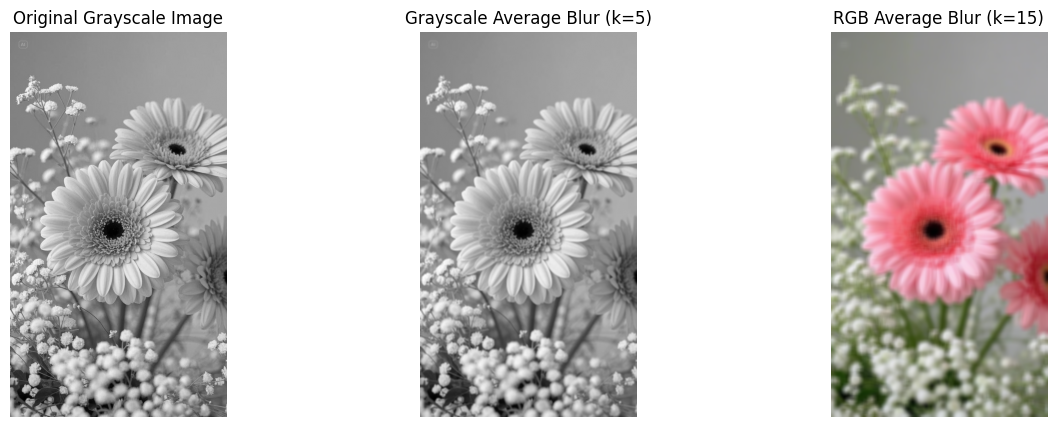

In [64]:
def average_blur_gray(img, ksize):
    box_kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)

    # Convolution
    blurred_img = convolve(img, box_kernel)

    return blurred_img

img_as_np = np.array(img)

if img_as_np.ndim == 3 and img_as_np.shape[2] == 3:
    if hasattr(img, 'convert') and callable(img.convert):
        gray_img_demo = np.array(img.convert('L'))
    else:
        gray_img_demo = np.dot(img_as_np[...,:3], [0.2989, 0.5870, 0.1140])
elif img_as_np.ndim == 2: # Already a grayscale NumPy array
    gray_img_demo = img_as_np
else:
    # RGBA types images
    gray_img_demo = img_as_np[:,:,0] if img_as_np.ndim == 3 else img_as_np

ksize_gray = 5
blurred_gray_img = average_blur_gray(gray_img_demo, ksize_gray)

ksize_rgb = 15
blurred_rgb_img = average_blur_gray(img_as_np, ksize_rgb)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img_demo, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_gray_img, cmap='gray')
plt.title(f'Grayscale Average Blur (k={ksize_gray})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blurred_rgb_img.astype(np.uint8))
plt.title(f'RGB Average Blur (k={ksize_rgb})')
plt.axis('off')

plt.show()

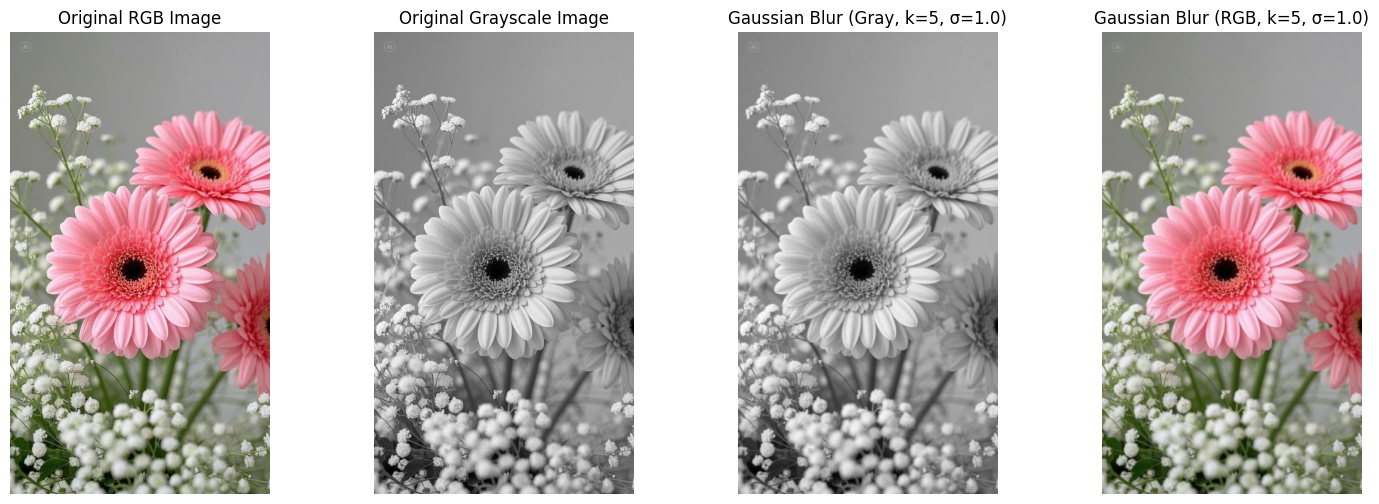

In [65]:
def gaussian_kernel(ksize, sigma):
    # Ensure ksize is odd for a central pixel
    if ksize % 2 == 0:
        raise ValueError("Kernel size (ksize) must be an odd number.")

    # Create a 2D grid for x and y coordinates relative to the center of the kernel
    center = ksize // 2
    x, y = np.mgrid[-center:center+1, -center:center+1]

    # Calculate the 2D Gaussian distribution
    # G(x, y) = (1 / (2 * pi * sigma^2)) * exp(-(x^2 + y^2) / (2 * sigma^2))
    gaussian_filter = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the kernel so that its sum is 1
    kernel = gaussian_filter / np.sum(gaussian_filter)
    return kernel

ksize_gaussian = 5
sigma_gaussian = 1.0

# Generate Gaussian kernel
gauss_kernel = gaussian_kernel(ksize_gaussian, sigma_gaussian)

# Apply Gaussian blur to grayscale image
blurred_gray_gaussian = convolve(gray_img_demo, gauss_kernel)

# Apply Gaussian blur to RGB image
blurred_rgb_gaussian = convolve(img_as_np, gauss_kernel)

# --- Display Results ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_as_np)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_img_demo, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blurred_gray_gaussian, cmap='gray')
plt.title(f'Gaussian Blur (Gray, k={ksize_gaussian}, σ={sigma_gaussian})')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blurred_rgb_gaussian.astype(np.uint8))
plt.title(f'Gaussian Blur (RGB, k={ksize_gaussian}, σ={sigma_gaussian})')
plt.axis('off')

plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [66]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

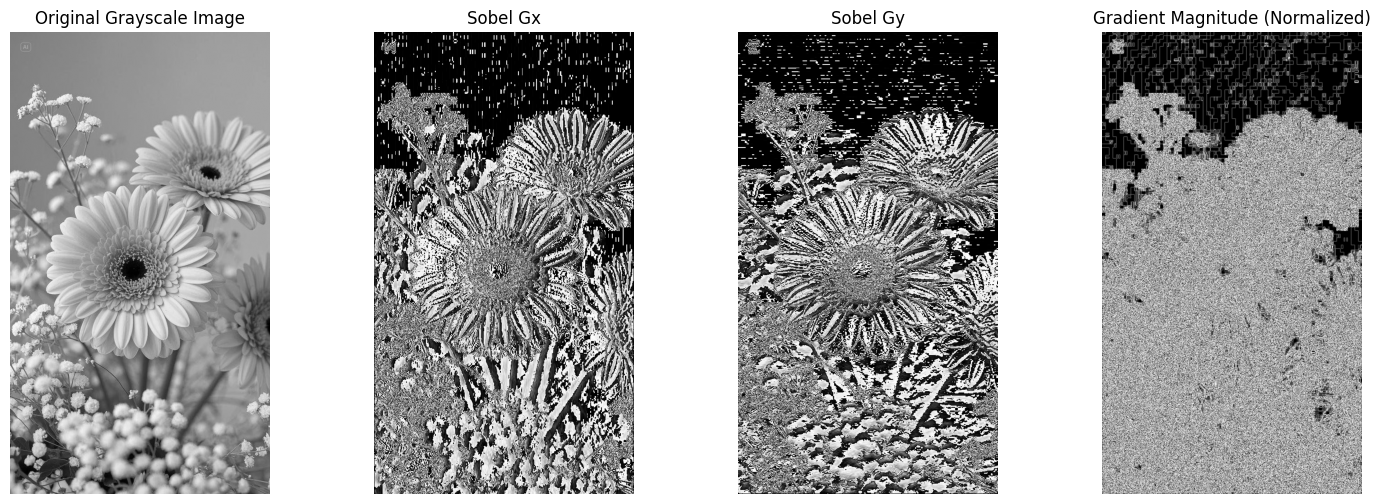

In [67]:
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]], dtype=np.float32)

G_x = convolve(gray_img_demo, sobel_x_kernel)

G_y = convolve(gray_img_demo, sobel_y_kernel)

gradient_magnitude = np.sqrt(G_x**2 + G_y**2)

gradient_magnitude_normalized = gradient_magnitude / np.max(gradient_magnitude)
gradient_magnitude_normalized = (gradient_magnitude_normalized * 255).astype(np.uint8)

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(gray_img_demo, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(G_x, cmap='gray')
plt.title('Sobel Gx')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(G_y, cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gradient_magnitude_normalized, cmap='gray')
plt.title('Gradient Magnitude (Normalized)')
plt.axis('off')

plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [68]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

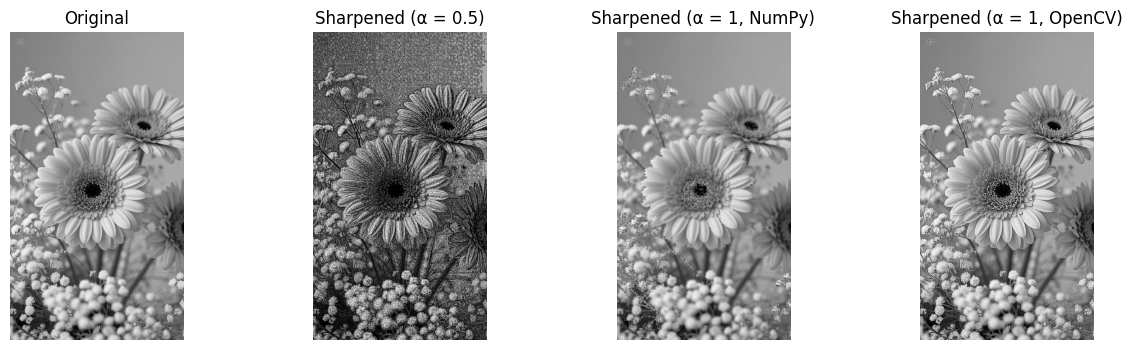

In [69]:
import cv2

img_np = np.array(img)

if img_np.ndim == 3:
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img_np.copy()

img_gray = img_gray.astype(np.uint8)

laplacian_kernel = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

lap = convolve(img_gray, laplacian_kernel)

# Sharpening
alpha = 0.5
sharp_alpha = img_gray - alpha * lap
sharp_alpha = np.clip(sharp_alpha, 0, 255).astype(np.uint8)

# Sharpening with alpha = 1
sharp_numpy = img_gray - lap
sharp_numpy = np.clip(sharp_numpy, 0, 255).astype(np.uint8)

# opencv
lap_cv = cv2.Laplacian(img_gray, cv2.CV_32F, ksize=1)
sharp_cv = img_gray.astype(np.float32) - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sharp_alpha, cmap='gray')
plt.title("Sharpened (α = 0.5)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharp_numpy, cmap='gray')
plt.title("Sharpened (α = 1, NumPy)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharp_cv, cmap='gray')
plt.title("Sharpened (α = 1, OpenCV)")
plt.axis('off')

plt.show()


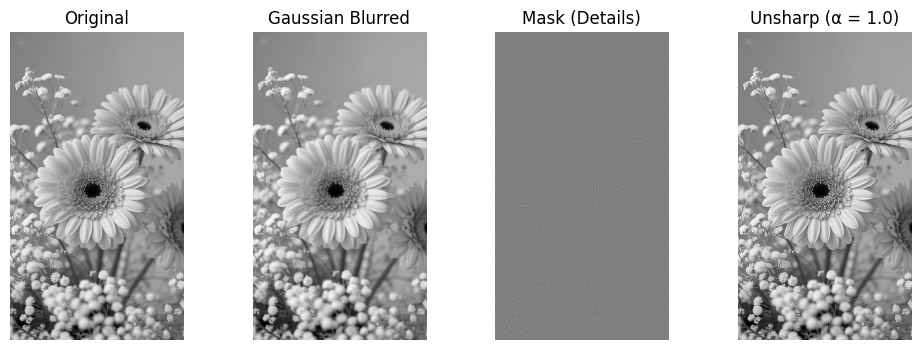

In [70]:
img_np = np.array(img)

if img_np.ndim == 3:
    img_gray = np.dot(img_np[..., :3], [0.299, 0.587, 0.114])
else:
    img_gray = img_np.copy()

img_gray = img_gray.astype(np.float32)

ksize = 5
sigma = 1.0
gauss_kernel = gaussian_kernel(ksize, sigma)

blurred = convolve(img_gray, gauss_kernel).astype(np.float32)

mask = img_gray - blurred

alpha = 1.0
sharp = img_gray + alpha * mask

sharp = np.clip(sharp, 0, 255).astype(np.uint8)
blurred = np.clip(blurred, 0, 255).astype(np.uint8)
img_gray_u8 = img_gray.astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img_gray_u8, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title("Mask (Details)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharp, cmap='gray')
plt.title(f"Unsharp (α = {alpha})")
plt.axis('off')

plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [71]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

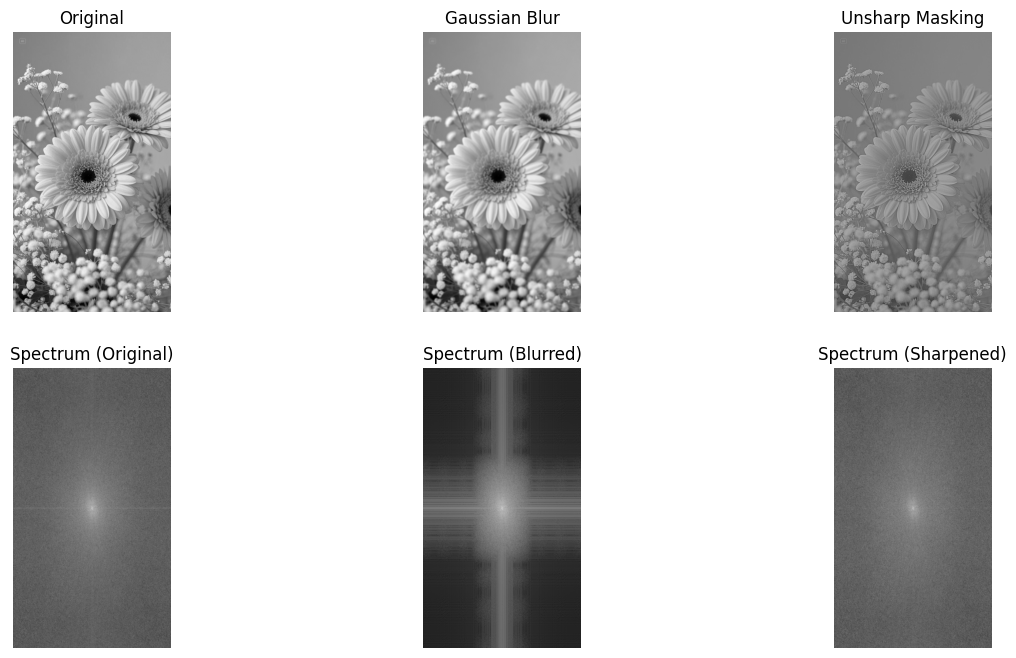

In [72]:
img_np = np.array(img)
if img_np.ndim == 3:
    img_gray = np.dot(img_np[..., :3], [0.299, 0.587, 0.114])
else:
    img_gray = img_np.copy()
img_gray = img_gray.astype(np.float32)

# Gaussian Blur (Low Pass Filter)
ksize = 7
sigma = 2.0
gauss_kernel = gaussian_kernel(ksize, sigma)
blurred = convolve(img_gray, gauss_kernel)

# Unsharp Masking (High Frequency Boost)
alpha = 1.5
mask = img_gray - blurred
sharp = img_gray + alpha * mask

# Magnitude Spectrum function
def magnitude_spectrum(image):
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)
    return np.log(1 + np.abs(fft_shift))

# Compute spectra
mag_original = magnitude_spectrum(img_gray)
mag_blurred = magnitude_spectrum(blurred)
mag_sharp = magnitude_spectrum(sharp)

# Display
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sharp, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mag_original, cmap='gray')
plt.title("Spectrum (Original)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(mag_blurred, cmap='gray')
plt.title("Spectrum (Blurred)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(mag_sharp, cmap='gray')
plt.title("Spectrum (Sharpened)")
plt.axis('off')

plt.show()

# Observations:
# Center bright region = low frequencies
# Gaussian blur darkens outer regions → high frequencies removed
# Unsharp masking brightens outer regions → high frequencies enhanced
# Increasing sigma strengthens low-pass behavior
# Increasing alpha strengthens high-pass behavior


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

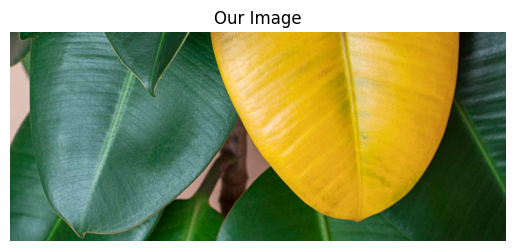

In [73]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [74]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

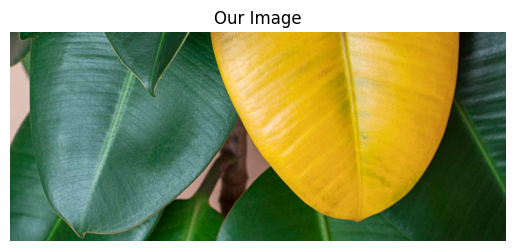

In [75]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

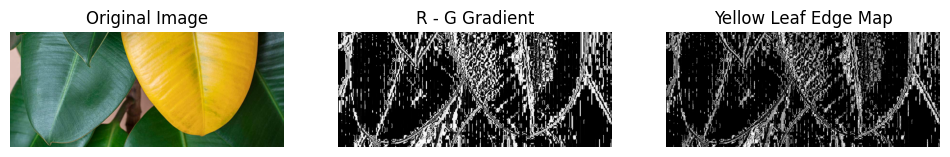

In [76]:
img_part5 = np.array(img)
img_np = np.array(img_part5)

# Split RGB channels
R = img_np[:, :, 0]
G = img_np[:, :, 1]
B = img_np[:, :, 2]

#  Sobel like edge kernel (3×3)
edge_kernel = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float32)

# gradients
grad_R = convolve(R, edge_kernel)
grad_G = convolve(G, edge_kernel)

# Large positive (R - G) indicates green → yellow transition
RG_diff = grad_R - grad_G

#  Suppress blue (yellow has low B)
grad_B = convolve(B, edge_kernel)

#  Combine responses
edge_response = np.abs(RG_diff) - 0.5 * np.abs(grad_B)

#  Normalize
edge_response = np.clip(edge_response, 0, None)
edge_response = edge_response / np.max(edge_response)
edge_response = (edge_response * 255).astype(np.uint8)

#  Display
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_np.astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(RG_diff, cmap='gray')
plt.title("R - G Gradient")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_response, cmap='gray')
plt.title("Yellow Leaf Edge Map")
plt.axis('off')

plt.show()



### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
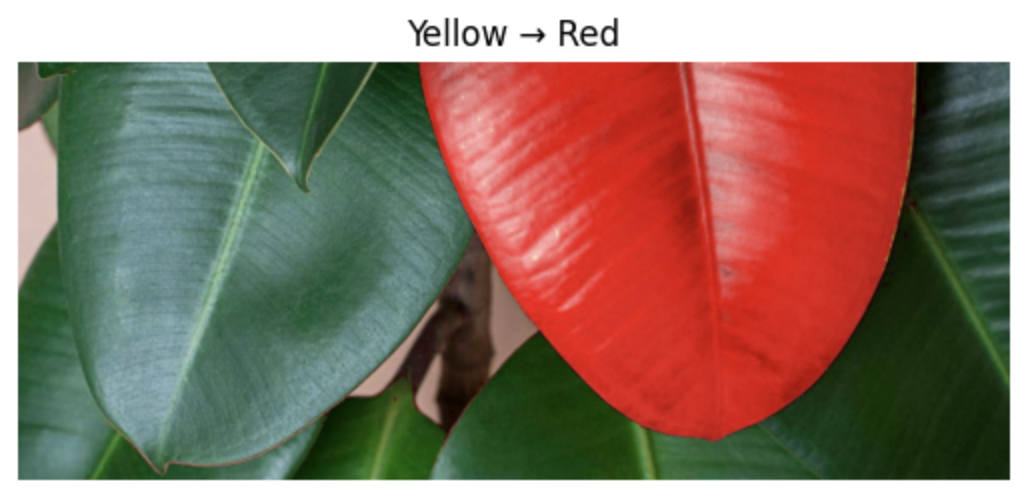

Also, we can change to a less brighter colour
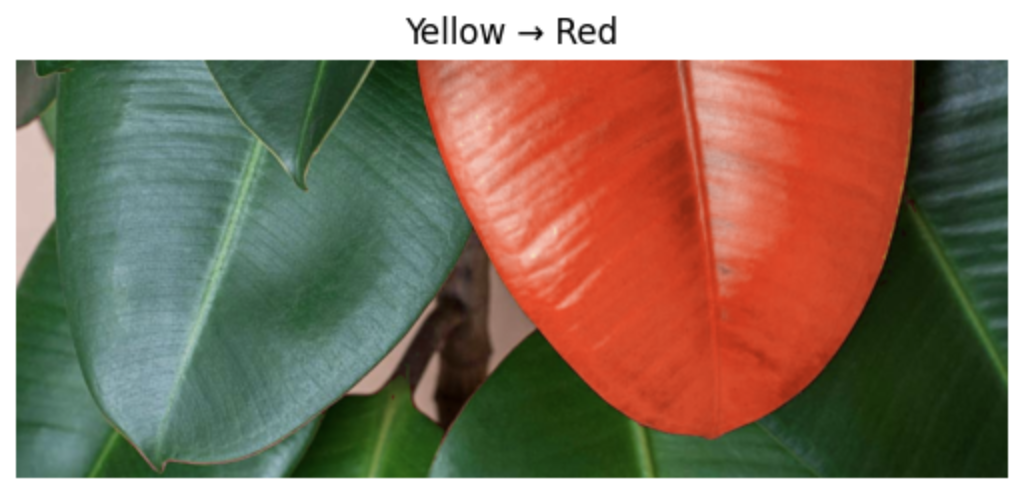

In [77]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.